In [6]:
from itertools import count
import numpy as np
import argparse
import cv2
from PIL import ImageGrab
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import csv
import time
import socket
from imutils.video import VideoStream
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import pandas
from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
import joblib
import pandas as pd
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.load_weights('C:/Users/User/Desktop/ERS/model.h5')

In [7]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
#     objects = ('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [8]:
# import cv2
# import os
# import numpy as np
# import torch

# input folder
folder='C:/Users/User/Desktop/test/happy'

images = []
# for filename in os.listdir(folder):
#     img = cv2.imread(os.path.join(folder,filename))

#     if img is not None:
#         images.append(img)
        
# print(images)
def facecrop(image):  
    facedata = 'C:/Users/User/Desktop/ERS/haar cascade files/haarcascade_frontalface_default.xml'
    cascade = cv2.CascadeClassifier(facedata)
    img_num = 0
    
    for filename in os.listdir(folder):
        img_num += 1
        img = cv2.imread(os.path.join(folder,filename))
        
        if img is not None:
            images.append(img)

        try:

            minisize = (img.shape[1],img.shape[0])
            miniframe = cv2.resize(img, minisize)

            faces = cascade.detectMultiScale(miniframe)

            for f in faces:
                x, y, w, h = [ v for v in f ]
                cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

                sub_face = img[y:y+h, x:x+w]

                # images output folder
                cv2.imwrite('C:/Users/User/Desktop/test/happy_valid/capture{0}.jpg'.format(img_num), sub_face)
                #print ("Writing: " + image)

        except Exception as e:
            print (e)

   

if __name__ == '__main__':
    # first image to start looping 
    facecrop('C:/Users/User/Desktop/test/happy/im0.png')
#Testing a file.


# Redo comment below
# ------------------------------------------------------------------------------------------


1


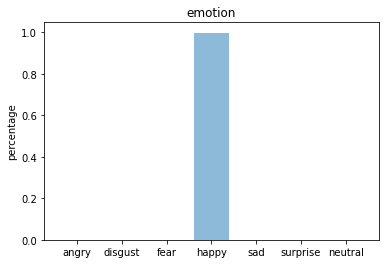

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


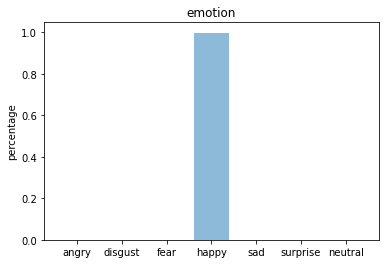

None


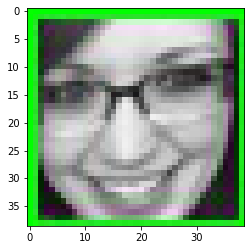

2


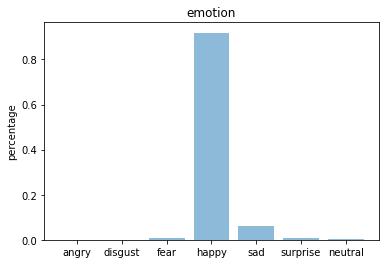

[[3.0199073e-05 1.6463568e-04 8.4197978e-03 9.1839689e-01 6.0664680e-02
  8.7399306e-03 3.5838699e-03]]
0.9183969


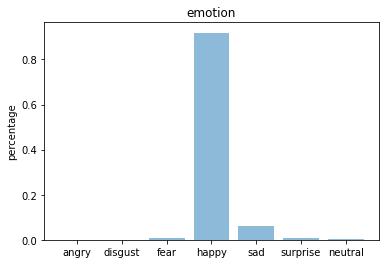

None


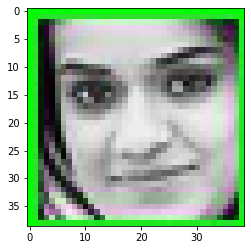

3


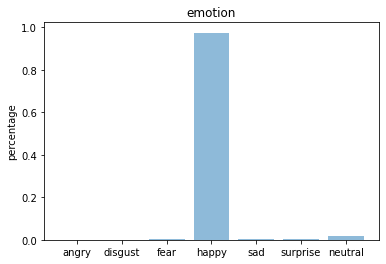

[[1.3914928e-03 5.6183680e-06 1.7245682e-03 9.7461730e-01 2.8407834e-03
  3.6082959e-03 1.5812011e-02]]
0.9746173


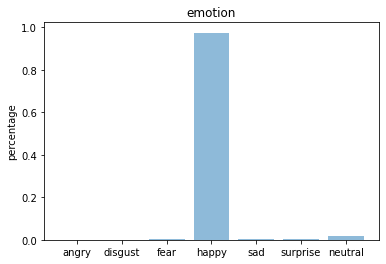

None


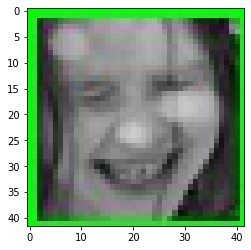

4


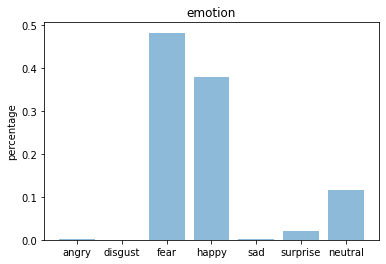

[[1.51582004e-03 3.43346910e-04 4.81410235e-01 3.79037291e-01
  1.14817929e-03 2.09541004e-02 1.15591064e-01]]
0.48141024


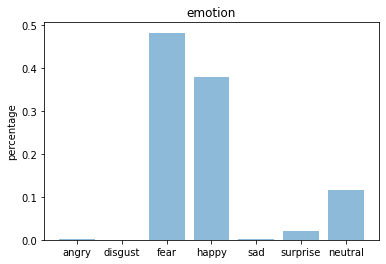

None


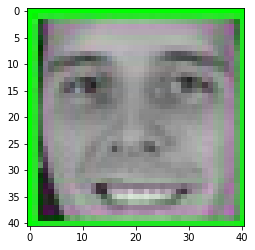

5
Image doesn't exist
6
Image doesn't exist
7


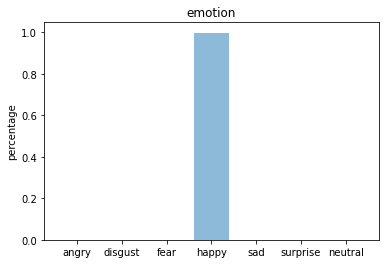

[[1.1743697e-05 3.2259319e-05 9.3583483e-04 9.9888664e-01 8.7429660e-05
  1.6066171e-05 2.9982517e-05]]
0.99888664


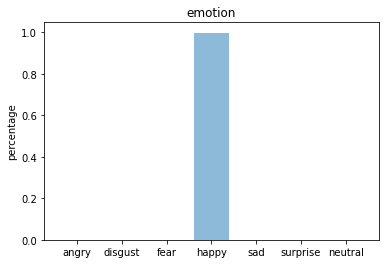

None


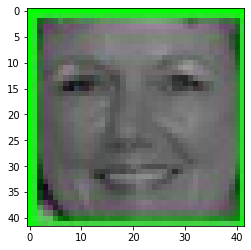

8
Image doesn't exist
9
Image doesn't exist
10
Image doesn't exist
11
Image doesn't exist
12
Image doesn't exist
13
Image doesn't exist
14
Image doesn't exist
15
Image doesn't exist
16
Image doesn't exist
17


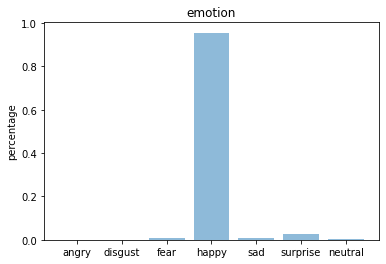

[[9.7868219e-04 3.2626771e-04 7.4275220e-03 9.5509803e-01 7.1697719e-03
  2.5776694e-02 3.2229763e-03]]
0.95509803


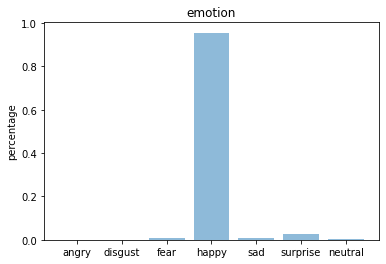

None


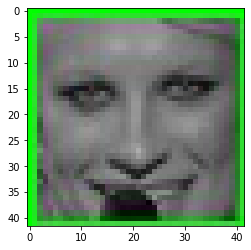

18
Image doesn't exist
19
Image doesn't exist
20
Image doesn't exist
21


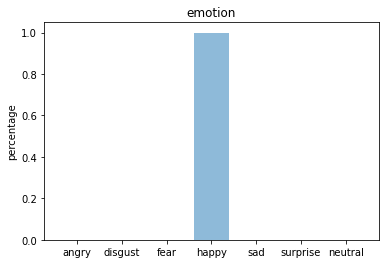

[[9.0914895e-05 2.8122020e-06 6.9349131e-05 9.9900013e-01 5.7145639e-04
  9.5572294e-05 1.6980083e-04]]
0.99900013


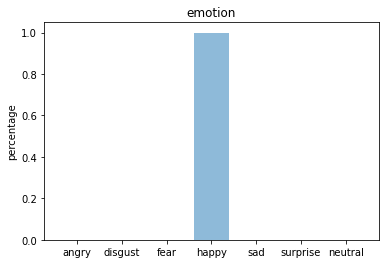

None


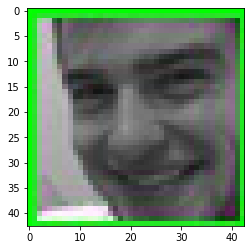

22


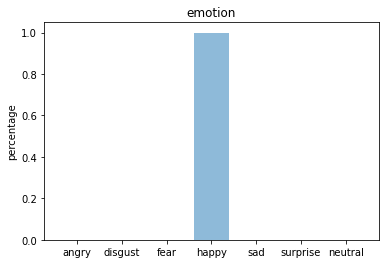

[[3.7756784e-09 2.6624200e-10 2.3127294e-08 9.9958056e-01 4.1670282e-04
  3.0500249e-09 2.7829508e-06]]
0.99958056


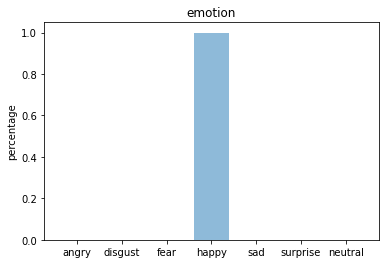

None


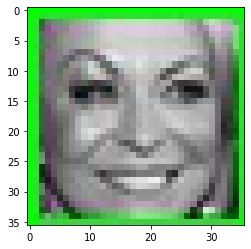

23


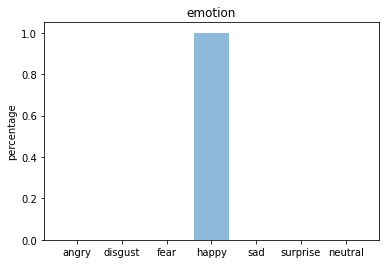

[[1.5428351e-09 1.6902927e-09 8.7255574e-07 9.9998677e-01 6.0054267e-06
  2.2013954e-07 6.2009185e-06]]
0.99998677


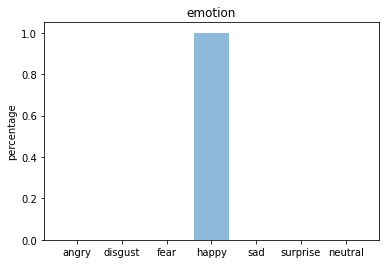

None


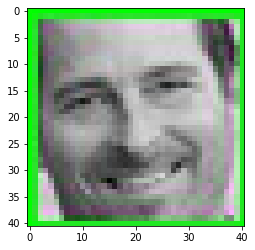

24
Image doesn't exist
25
Image doesn't exist
26
Image doesn't exist
27
Image doesn't exist
28


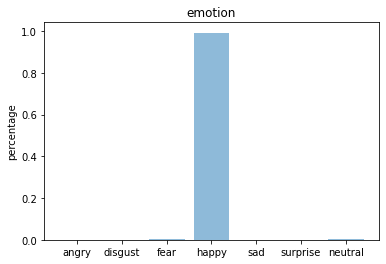

[[8.7218714e-06 2.9296312e-09 3.2645802e-03 9.9179077e-01 4.6599518e-05
  4.2617162e-06 4.8849853e-03]]
0.9917908


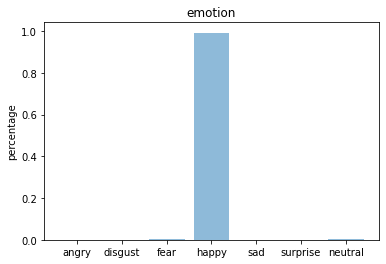

None


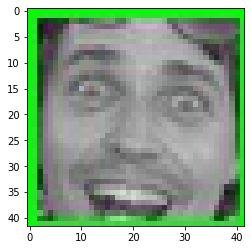

29
Image doesn't exist
30
Image doesn't exist
31


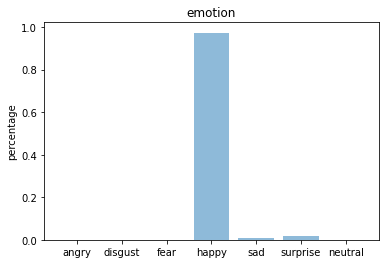

[[1.2046562e-03 7.9376230e-09 6.7881960e-04 9.7296113e-01 8.6241839e-03
  1.6492462e-02 3.8725750e-05]]
0.9729611


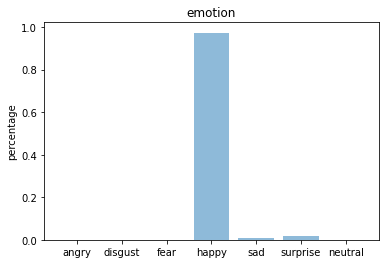

None


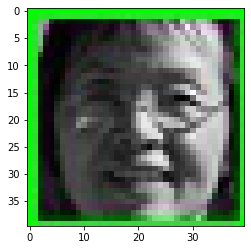

32


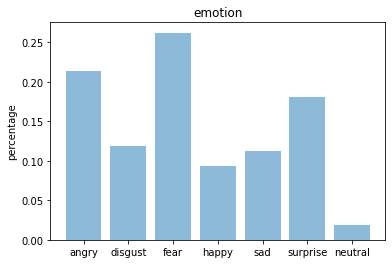

[[0.21323071 0.11908357 0.26220465 0.09381524 0.1122783  0.18114482
  0.01824276]]
0.26220465


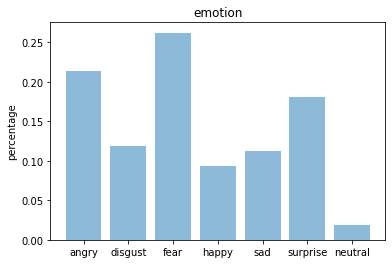

None


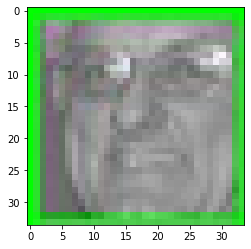

33
Image doesn't exist
34
Image doesn't exist
35


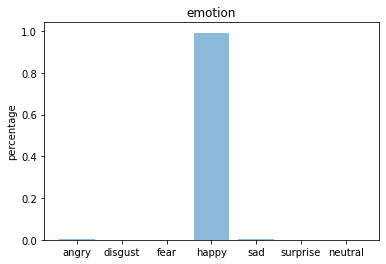

[[4.1110911e-03 1.2041778e-05 9.0456038e-04 9.9248189e-01 1.7573966e-03
  7.3283579e-04 2.8077574e-07]]
0.9924819


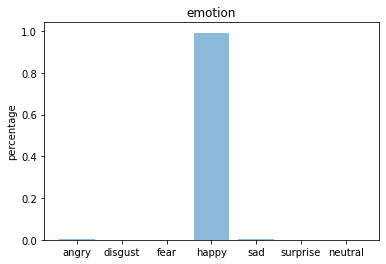

None


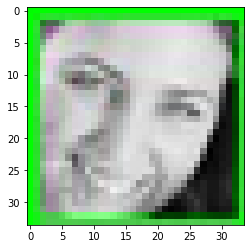

36
Image doesn't exist
37


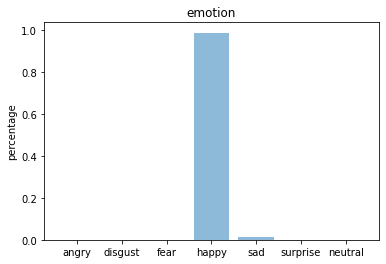

[[9.9054865e-05 2.6991383e-08 1.8780360e-04 9.8667473e-01 1.2948066e-02
  1.7621848e-06 8.8513036e-05]]
0.9866747


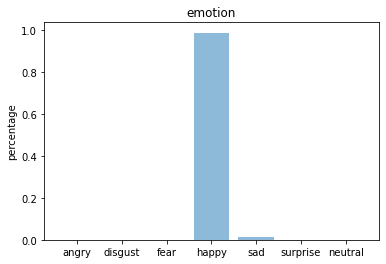

None


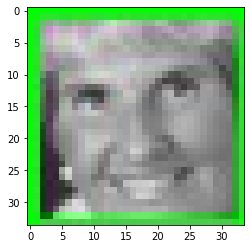

38
Image doesn't exist
39


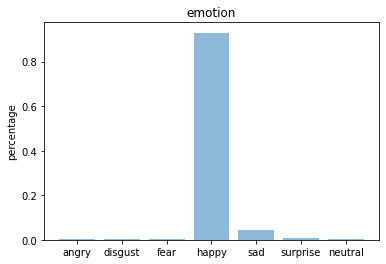

[[0.00402606 0.00333215 0.00509124 0.9295429  0.04379629 0.0095165
  0.00469482]]
0.9295429


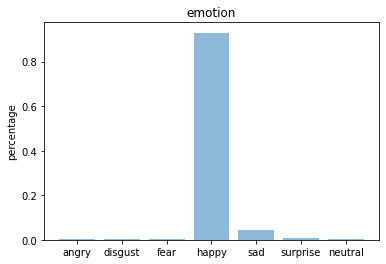

None


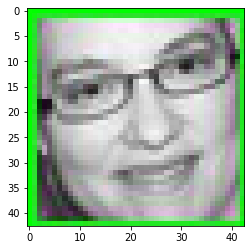

40
Image doesn't exist
41


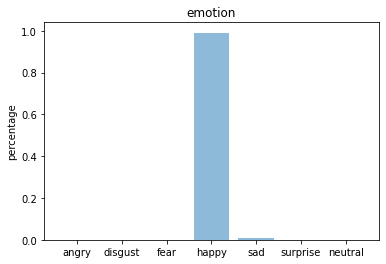

[[7.6435217e-06 8.3537524e-09 8.4028688e-05 9.9114394e-01 7.6497905e-03
  6.6551484e-06 1.1079655e-03]]
0.99114394


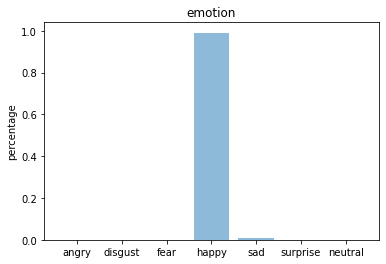

None


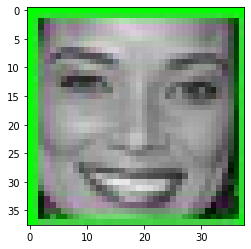

42
Image doesn't exist
43


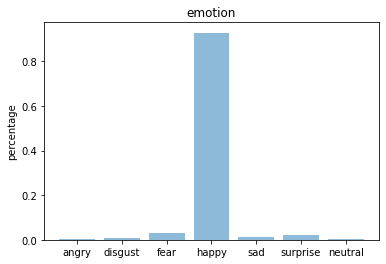

[[0.00359548 0.00783192 0.02834012 0.9283276  0.01031299 0.01967596
  0.00191583]]
0.9283276


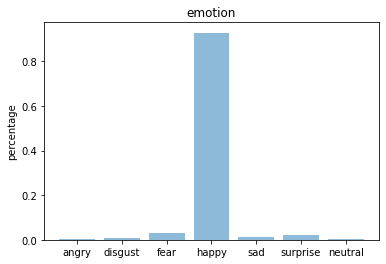

None


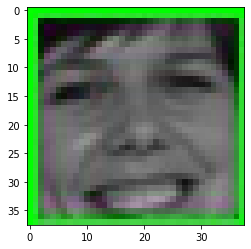

44
Image doesn't exist
45


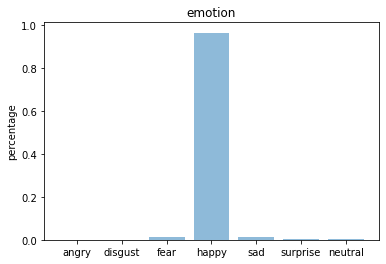

[[8.0242223e-04 3.7163736e-06 1.3836689e-02 9.6330953e-01 1.3517749e-02
  5.2215853e-03 3.3083698e-03]]
0.9633095


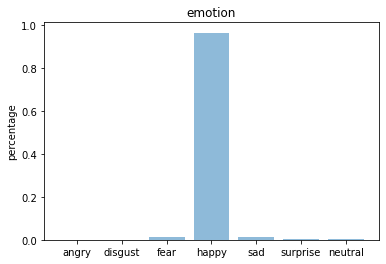

None


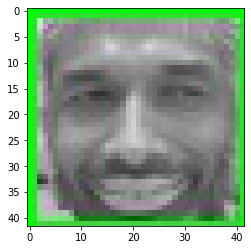

46


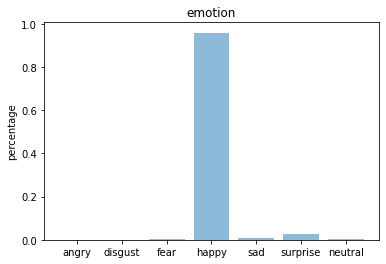

[[1.0515662e-03 1.4259577e-04 3.9959685e-03 9.5837057e-01 8.9754397e-03
  2.5007388e-02 2.4565491e-03]]
0.95837057


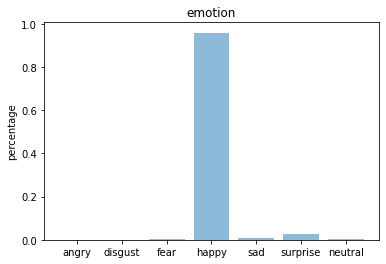

None


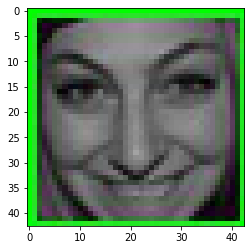

47
Image doesn't exist
48


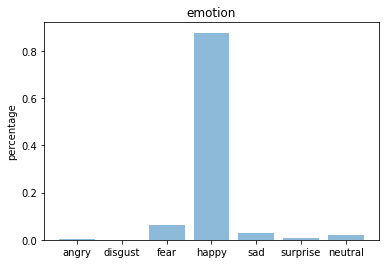

[[5.4065040e-03 1.5653268e-04 6.1089743e-02 8.7674928e-01 2.7264856e-02
  9.1873147e-03 2.0145822e-02]]
0.8767493


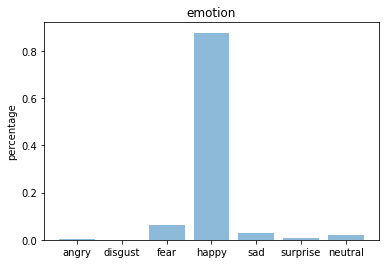

None


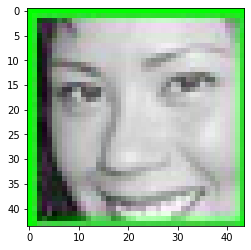

49
Image doesn't exist
50
Image doesn't exist
51


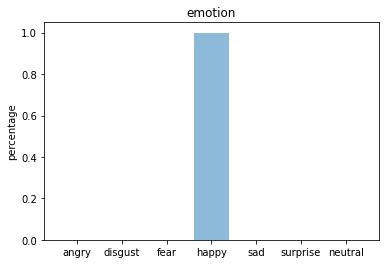

[[2.2614788e-09 1.9962723e-10 3.6276415e-07 9.9969745e-01 4.5350348e-06
  1.5681668e-07 2.9751158e-04]]
0.99969745


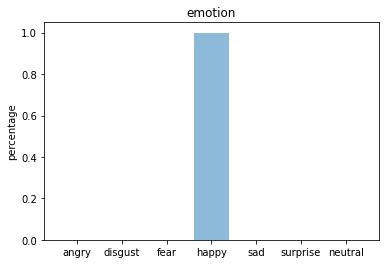

None


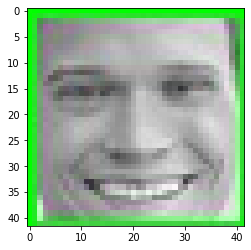

52


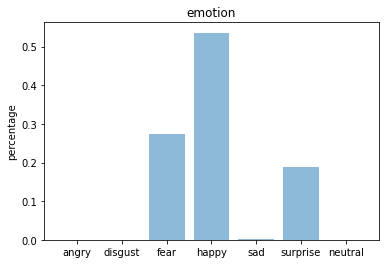

[[2.8684872e-04 1.8763309e-04 2.7267972e-01 5.3587466e-01 1.6027032e-03
  1.8931253e-01 5.5846205e-05]]
0.53587466


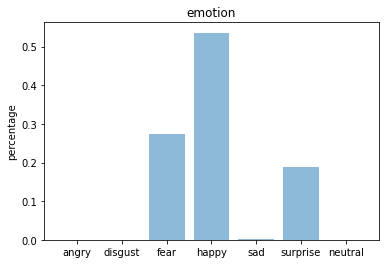

None


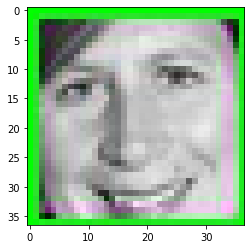

53
Image doesn't exist
54
Image doesn't exist
55
Image doesn't exist
56


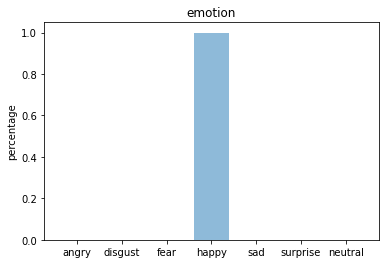

[[1.8712510e-05 1.9910665e-05 3.3118442e-05 9.9958986e-01 3.0399204e-04
  3.4278815e-05 9.0046065e-08]]
0.99958986


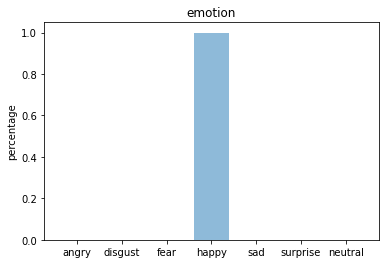

None


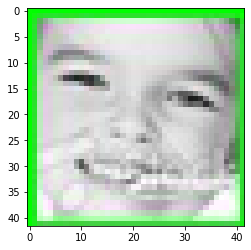

57


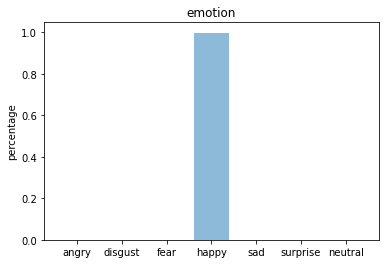

[[9.1054273e-05 4.3961718e-06 7.5323616e-05 9.9848050e-01 1.0394254e-03
  2.3775149e-04 7.1585418e-05]]
0.9984805


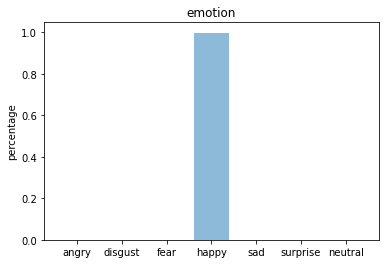

None


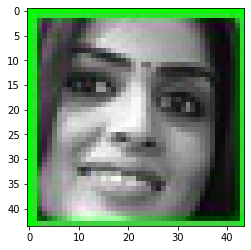

58


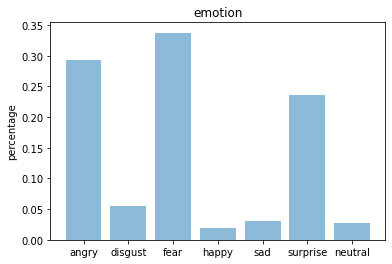

[[0.293583   0.05527791 0.33767074 0.01997106 0.02987639 0.23600887
  0.02761205]]
0.33767074


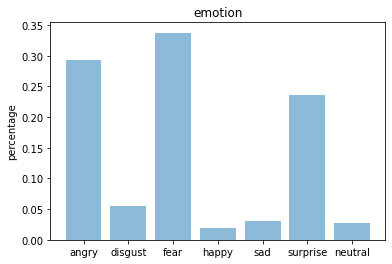

None


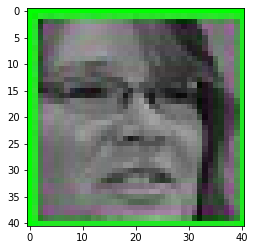

59


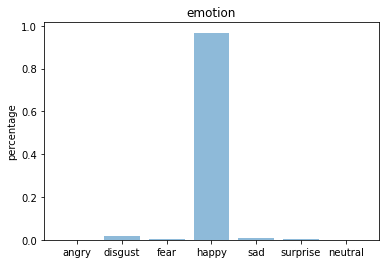

[[3.4509104e-04 1.6808301e-02 4.0915054e-03 9.6796811e-01 6.4785187e-03
  3.6830448e-03 6.2543398e-04]]
0.9679681


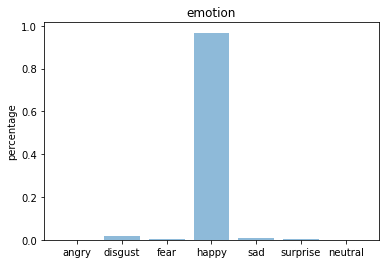

None


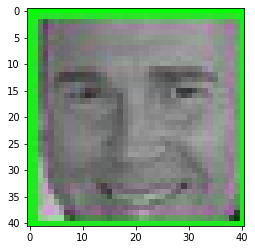

60
Image doesn't exist
61
Image doesn't exist
62
Image doesn't exist
63
Image doesn't exist
64
Image doesn't exist
65
Image doesn't exist
66
Image doesn't exist
67
Image doesn't exist
68
Image doesn't exist
69
Image doesn't exist
70


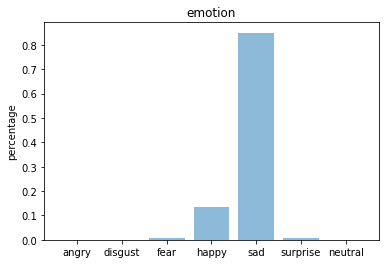

[[7.3259025e-06 3.9903124e-08 6.3540326e-03 1.3638230e-01 8.4999841e-01
  7.2578685e-03 5.2206008e-09]]
0.8499984


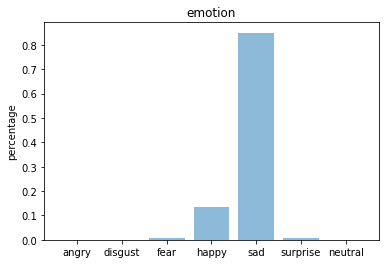

None


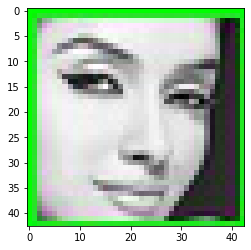

71


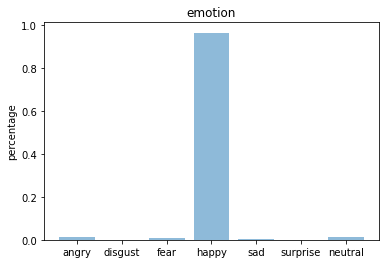

[[1.1708851e-02 8.9334470e-05 6.7459862e-03 9.6507972e-01 1.7016750e-03
  2.3969763e-04 1.4434776e-02]]
0.9650797


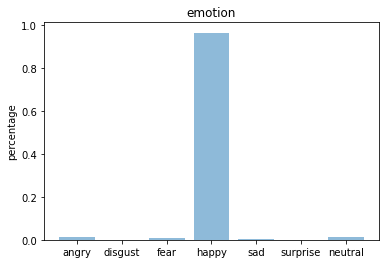

None


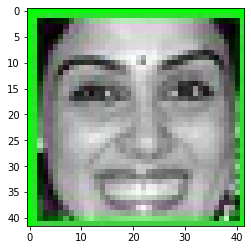

72
Image doesn't exist
73


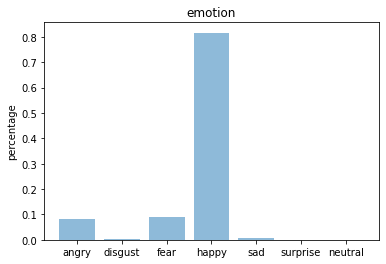

[[8.1948429e-02 2.4132414e-03 9.1067091e-02 8.1634778e-01 7.6860944e-03
  2.1918405e-04 3.1813572e-04]]
0.8163478


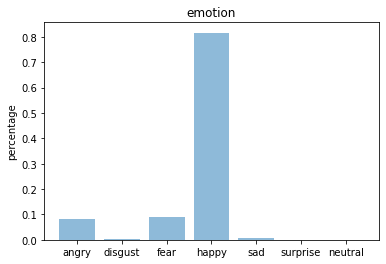

None


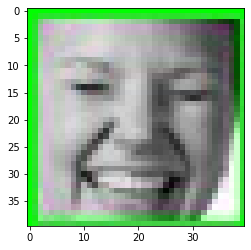

74


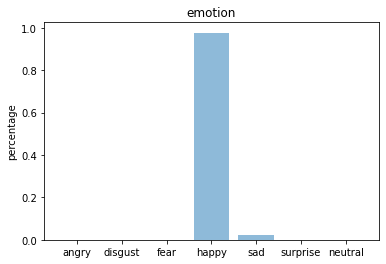

[[2.6375070e-04 1.3757480e-07 2.9998523e-04 9.7680420e-01 2.2359554e-02
  2.2773015e-04 4.4645923e-05]]
0.9768042


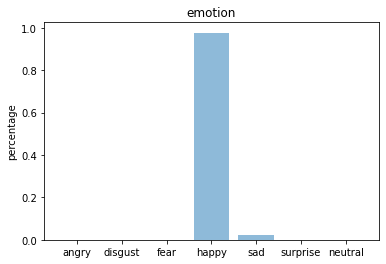

None


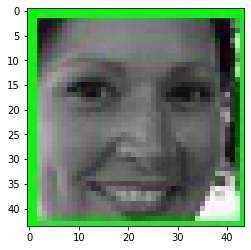

75
Image doesn't exist
76


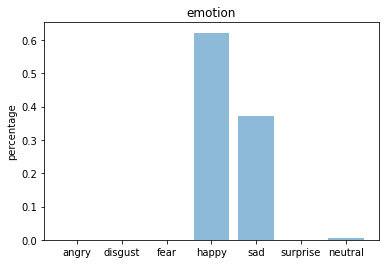

[[6.3416182e-06 6.1300950e-11 2.5319841e-04 6.2192905e-01 3.7097013e-01
  3.8952741e-05 6.8022376e-03]]
0.62192905


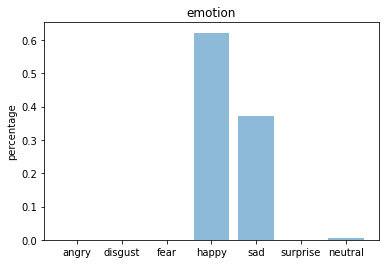

None


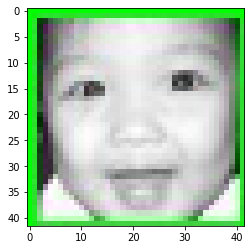

77


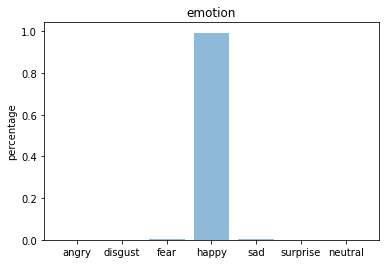

[[1.3974168e-05 1.9331068e-05 2.2755049e-03 9.9408084e-01 3.4173420e-03
  8.1964790e-05 1.1108517e-04]]
0.99408084


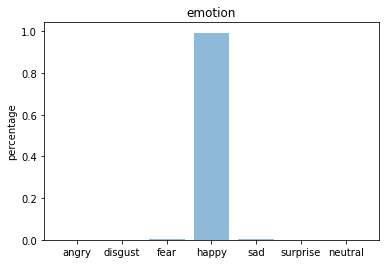

None


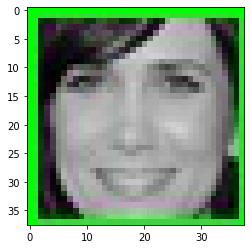

78
Image doesn't exist
79
Image doesn't exist
80
Image doesn't exist
81


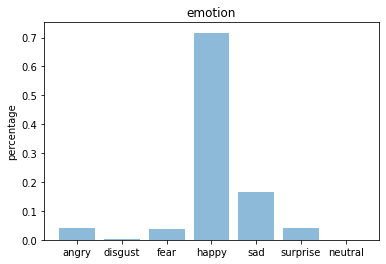

[[3.9910056e-02 1.6350762e-03 3.6269370e-02 7.1658438e-01 1.6436756e-01
  4.1024130e-02 2.0942012e-04]]
0.7165844


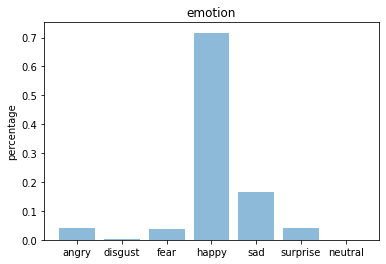

None


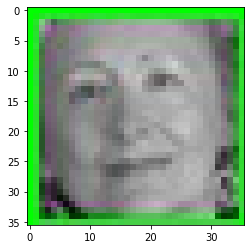

82
Image doesn't exist
83


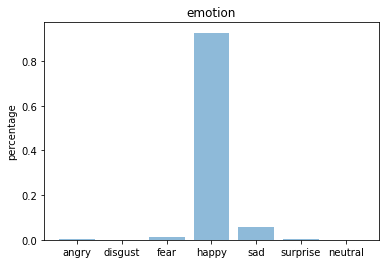

[[1.3874368e-03 2.2896405e-04 1.2487116e-02 9.2756158e-01 5.5705357e-02
  2.5924959e-03 3.7090656e-05]]
0.9275616


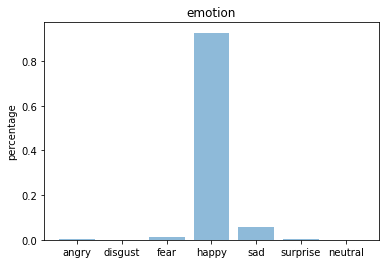

None


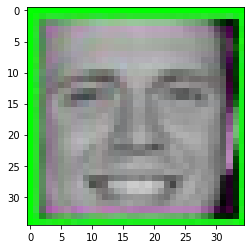

84


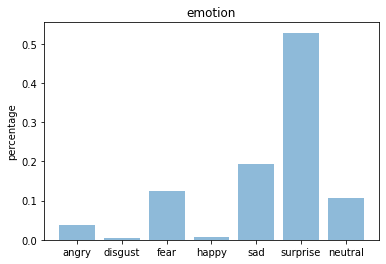

[[0.03661629 0.00352927 0.12344998 0.007965   0.19235149 0.5285347
  0.10755323]]
0.5285347


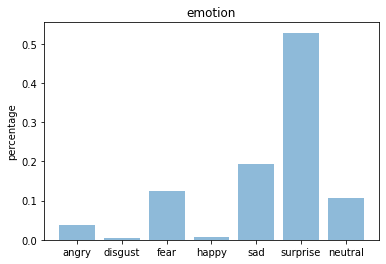

None


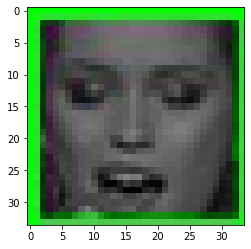

85


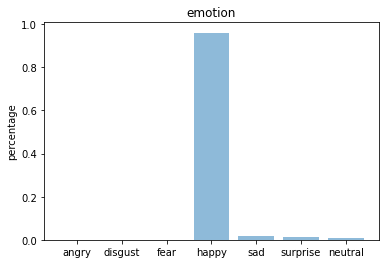

[[4.1519813e-04 3.2212054e-05 6.7269802e-04 9.6093005e-01 1.8080864e-02
  1.1686613e-02 8.1824008e-03]]
0.96093005


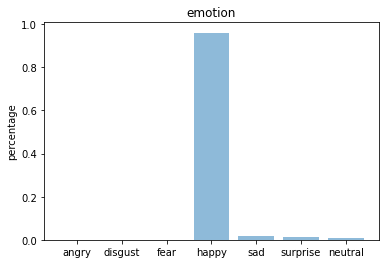

None


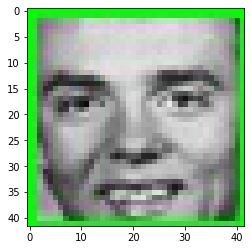

86
Image doesn't exist
87
Image doesn't exist
88
Image doesn't exist
89
Image doesn't exist
90


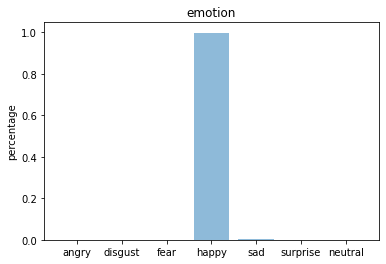

[[1.4973652e-06 9.2248719e-08 2.9006676e-06 9.9755079e-01 2.2258565e-03
  8.0807195e-06 2.1087256e-04]]
0.9975508


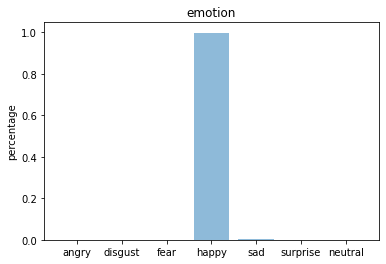

None


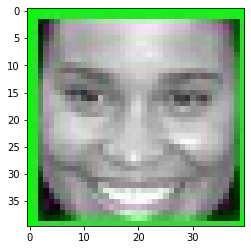

91
Image doesn't exist
92
Image doesn't exist
93
Image doesn't exist
94
Image doesn't exist
95
Image doesn't exist
96


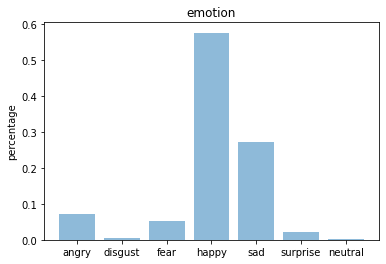

[[0.07241551 0.003891   0.05219183 0.5754007  0.27219683 0.02242634
  0.00147772]]
0.5754007


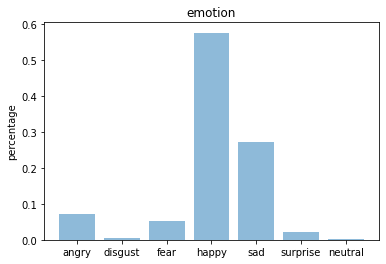

None


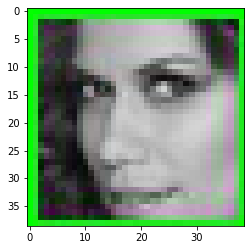

97
Image doesn't exist
98


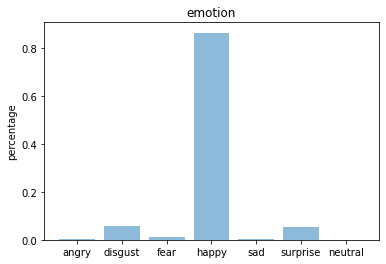

[[3.2733832e-03 5.9234750e-02 1.2932833e-02 8.6477590e-01 4.8150318e-03
  5.4892737e-02 7.5325443e-05]]
0.8647759


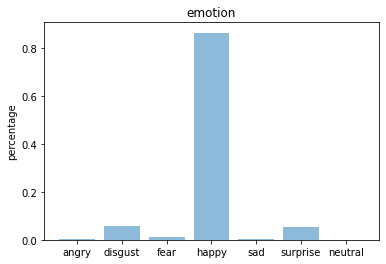

None


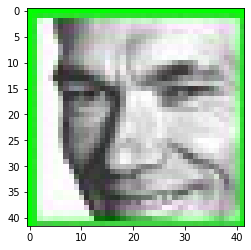

99


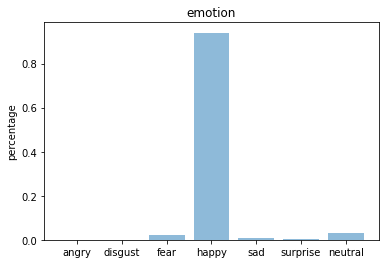

[[7.9728619e-05 2.6348828e-06 2.2249134e-02 9.3982720e-01 7.4707502e-03
  1.4136881e-03 2.8956866e-02]]
0.9398272


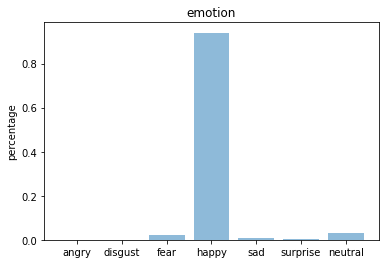

None


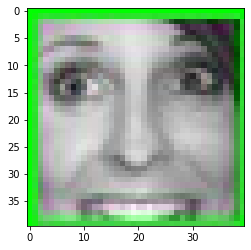

100
Image doesn't exist
101
Image doesn't exist
102
Image doesn't exist
103
Image doesn't exist
104
Image doesn't exist
105


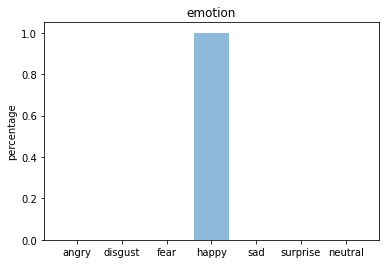

[[8.0196651e-06 4.6483878e-05 1.4241881e-05 9.9982846e-01 1.2880353e-05
  9.9811678e-06 7.9947298e-05]]
0.99982846


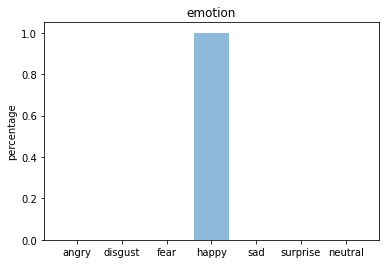

None


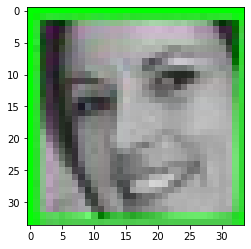

106
Image doesn't exist
107


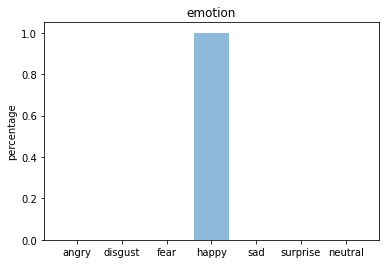

[[2.56430432e-10 1.30926337e-11 1.20982211e-08 9.99984741e-01
  1.50330725e-05 1.46758566e-07 7.07613452e-08]]
0.99998474


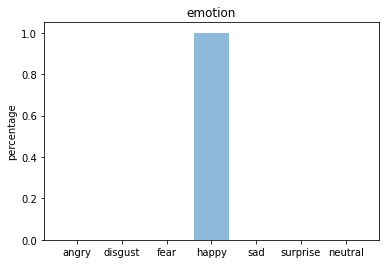

None


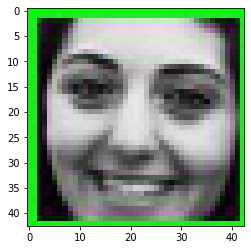

108
Image doesn't exist
109
Image doesn't exist
110
Image doesn't exist
111


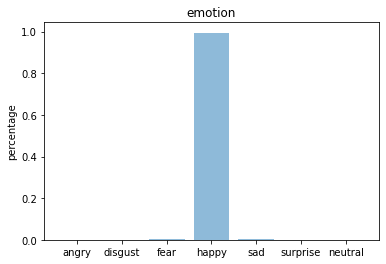

[[8.3334635e-05 5.5651763e-05 2.7364939e-03 9.9469686e-01 2.2008822e-03
  6.1000178e-06 2.2059371e-04]]
0.99469686


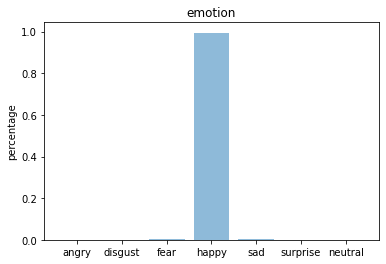

None


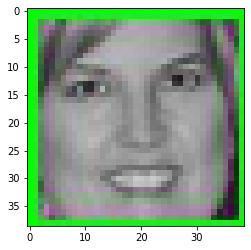

112
Image doesn't exist
113
Image doesn't exist
114


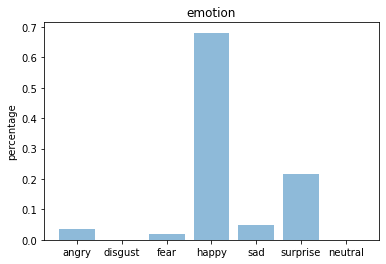

[[3.5907090e-02 3.4402884e-04 1.8487450e-02 6.8089956e-01 4.7638033e-02
  2.1639718e-01 3.2665432e-04]]
0.68089956


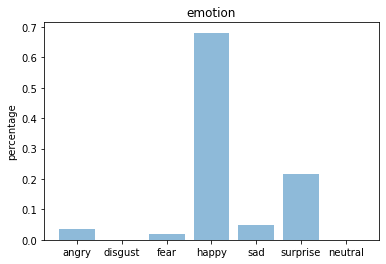

None


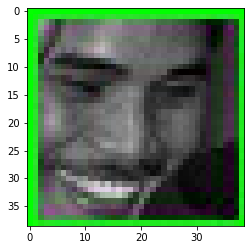

115


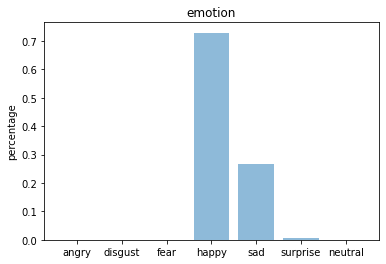

[[5.8778870e-04 8.0838407e-05 2.4342086e-04 7.2915620e-01 2.6530027e-01
  4.5959791e-03 3.5531892e-05]]
0.7291562


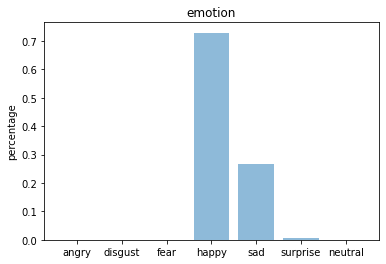

None


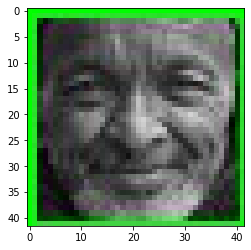

116
Image doesn't exist
117


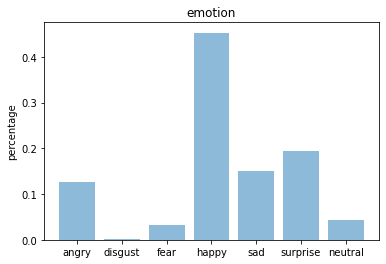

[[0.12570836 0.00198219 0.03251531 0.45280558 0.15042101 0.19380915
  0.04275838]]
0.45280558


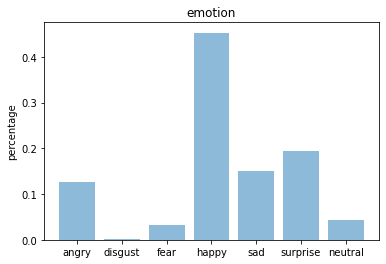

None


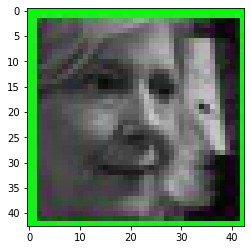

118
Image doesn't exist
119
Image doesn't exist
120


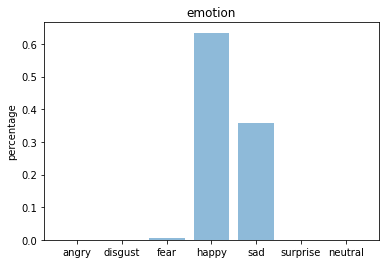

[[2.6714306e-05 3.1422979e-07 6.0485154e-03 6.3430178e-01 3.5903662e-01
  2.4076445e-04 3.4537420e-04]]
0.6343018


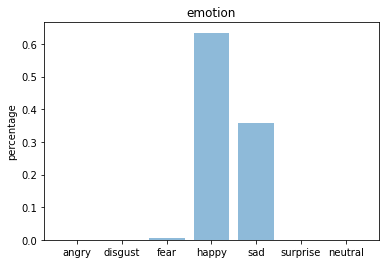

None


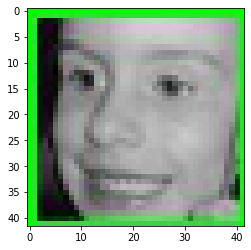

121
Image doesn't exist
122
Image doesn't exist
123


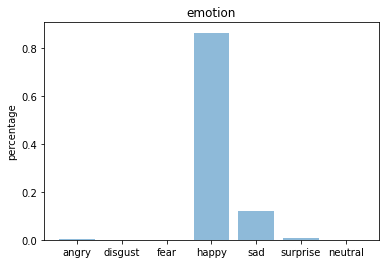

[[4.65574721e-03 4.72059526e-07 6.88750413e-04 8.65358055e-01
  1.21503435e-01 6.73031667e-03 1.06325687e-03]]
0.86535805


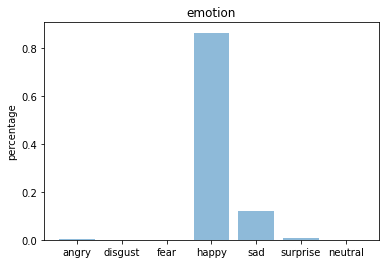

None


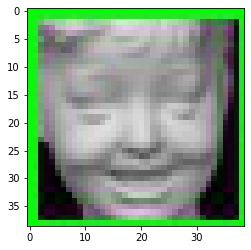

124
Image doesn't exist
125


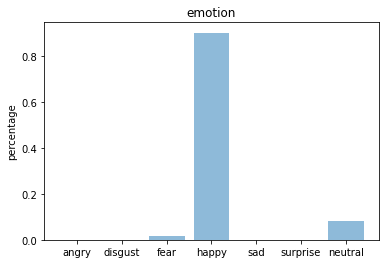

[[1.0871223e-04 4.5981938e-07 1.8131807e-02 9.0024763e-01 7.5023278e-04
  6.6439461e-06 8.0754645e-02]]
0.90024763


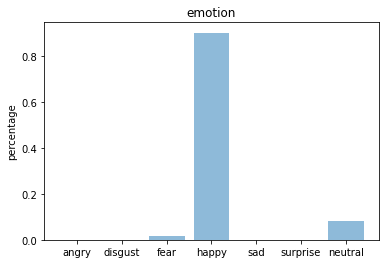

None


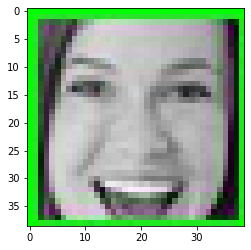

126
Image doesn't exist
127
Image doesn't exist
128


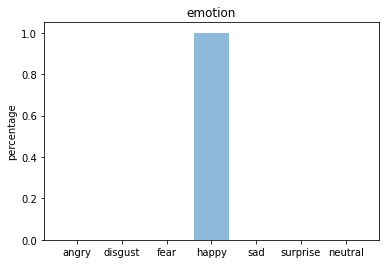

[[2.3484806e-07 2.0837083e-09 2.9908580e-07 9.9999809e-01 9.4827806e-07
  3.0179228e-07 9.9401007e-08]]
0.9999981


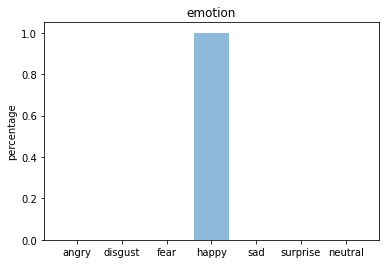

None


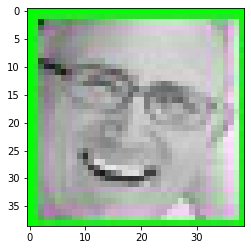

129


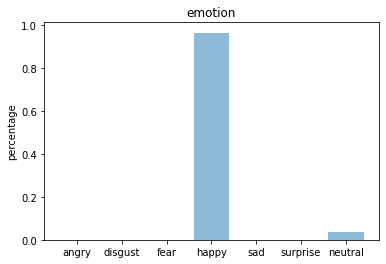

[[5.9925625e-08 1.2055653e-11 3.3647486e-04 9.6383512e-01 6.0370781e-05
  2.0338895e-04 3.5564560e-02]]
0.9638351


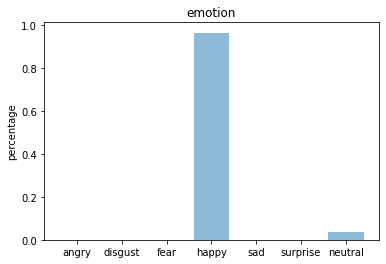

None


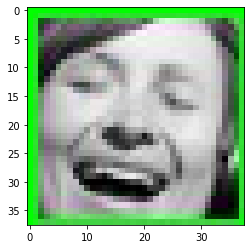

130


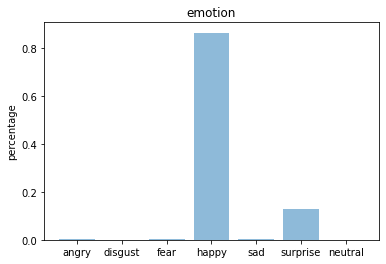

[[1.8262115e-03 1.2529702e-06 4.7023953e-03 8.6453515e-01 2.0584331e-03
  1.2686636e-01 1.0230810e-05]]
0.86453515


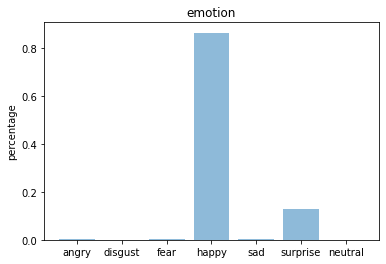

None


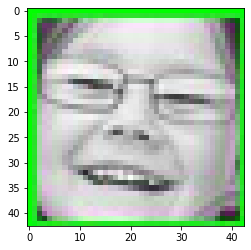

131


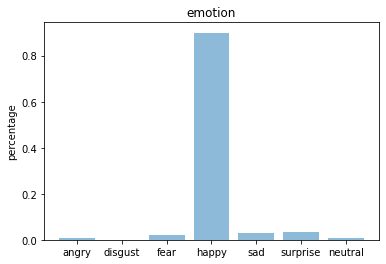

[[6.0464721e-03 2.7831603e-04 2.2281729e-02 8.9953959e-01 3.0277496e-02
  3.3299204e-02 8.2771806e-03]]
0.8995396


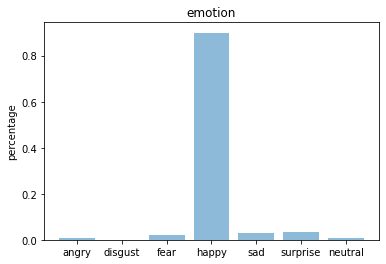

None


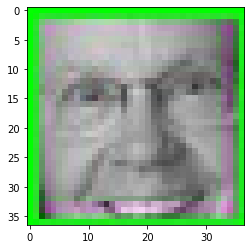

132


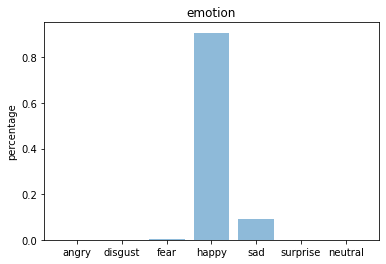

[[6.0451803e-05 1.2832330e-06 1.3334792e-03 9.0736192e-01 9.1206364e-02
  2.4093742e-05 1.2367128e-05]]
0.9073619


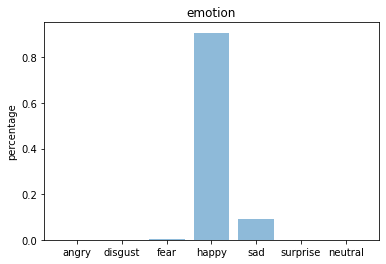

None


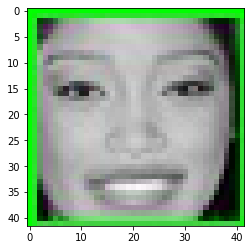

133


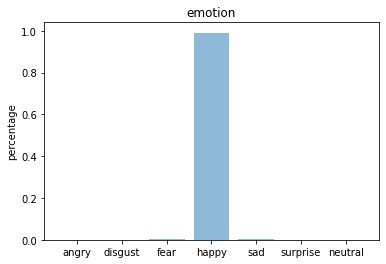

[[4.6074078e-05 7.5662638e-06 5.4308204e-03 9.9063689e-01 3.2460841e-03
  4.1381118e-04 2.1878400e-04]]
0.9906369


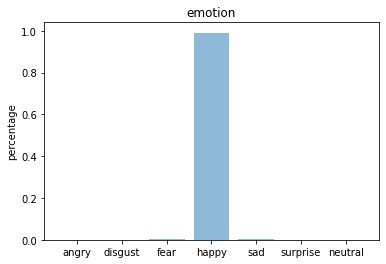

None


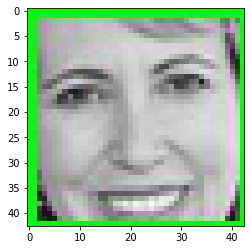

134
Image doesn't exist
135
Image doesn't exist
136
Image doesn't exist
137
Image doesn't exist
138


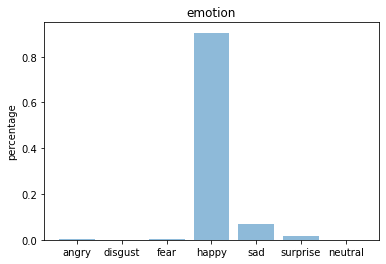

[[4.99998219e-03 3.87771397e-05 2.69883708e-03 9.04637635e-01
  7.07295835e-02 1.67858712e-02 1.09291024e-04]]
0.90463763


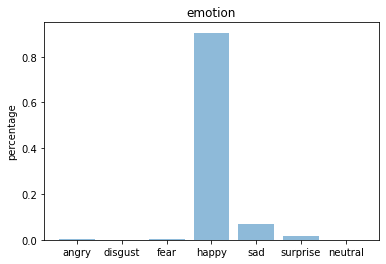

None


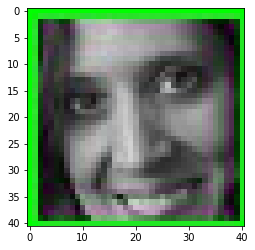

139


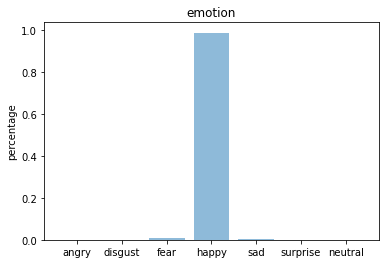

[[1.8097686e-05 2.1907924e-08 9.8676356e-03 9.8737925e-01 2.5123996e-03
  1.6543454e-04 5.7109377e-05]]
0.98737925


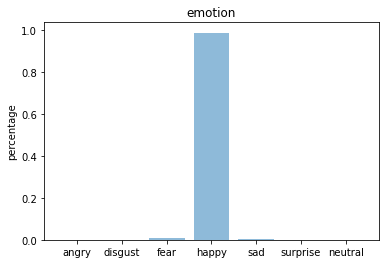

None


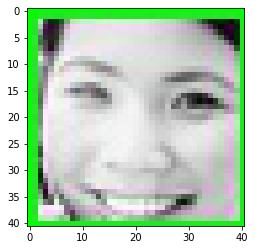

140
Image doesn't exist
141


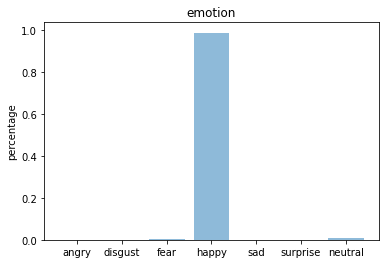

[[1.2447558e-04 5.8074681e-07 3.0058383e-03 9.8812032e-01 1.3903283e-04
  2.2296060e-06 8.6074984e-03]]
0.9881203


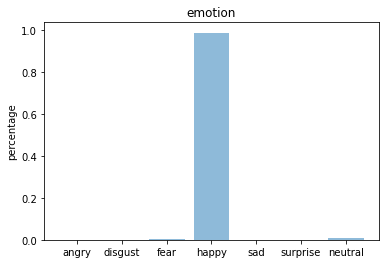

None


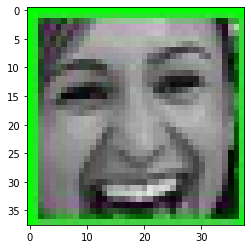

142


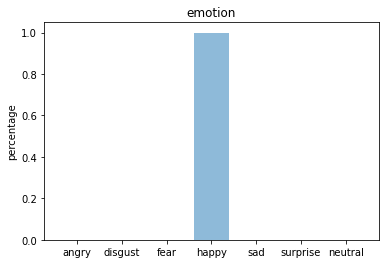

[[8.3456609e-07 3.6482747e-06 2.5898453e-06 9.9919659e-01 7.6971104e-04
  2.3097627e-06 2.4239385e-05]]
0.9991966


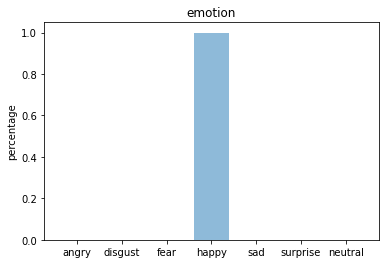

None


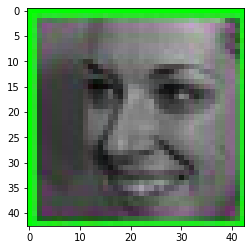

143


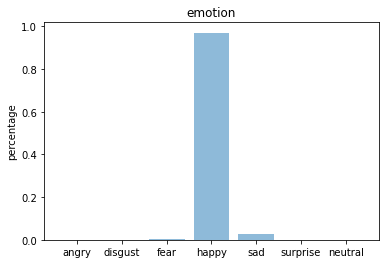

[[1.4363653e-04 3.8991022e-08 2.3936252e-03 9.6994352e-01 2.7099166e-02
  1.5413096e-04 2.6590988e-04]]
0.9699435


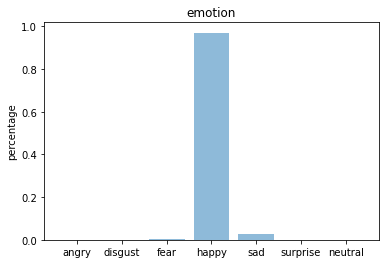

None


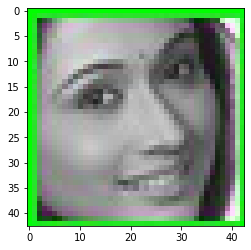

144


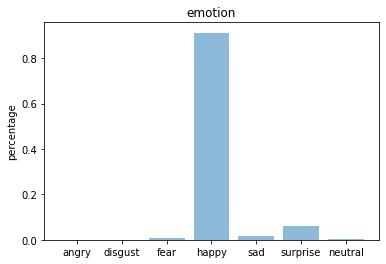

[[7.2591769e-04 2.9408682e-06 8.5343150e-03 9.1221839e-01 1.5892779e-02
  5.9062302e-02 3.5634176e-03]]
0.9122184


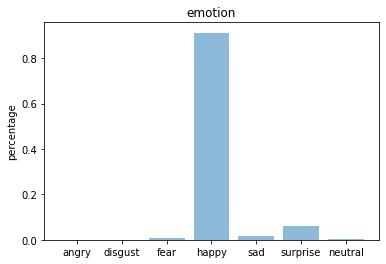

None


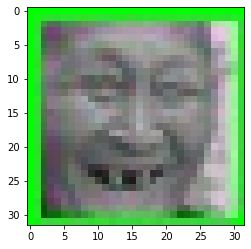

145


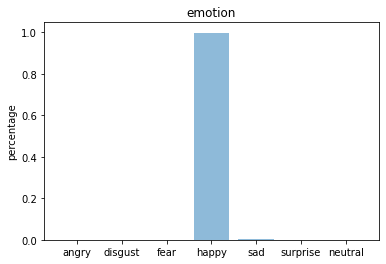

[[1.0413570e-06 7.4400776e-07 1.1790009e-04 9.9720049e-01 1.4894383e-03
  1.1475753e-03 4.2822026e-05]]
0.9972005


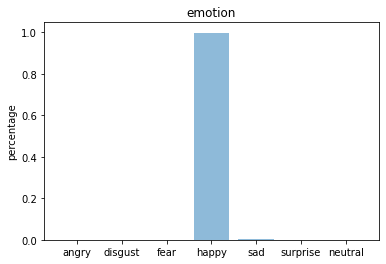

None


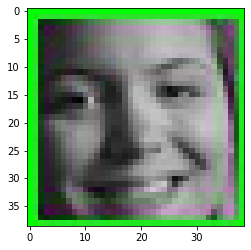

146
Image doesn't exist
147
Image doesn't exist
148


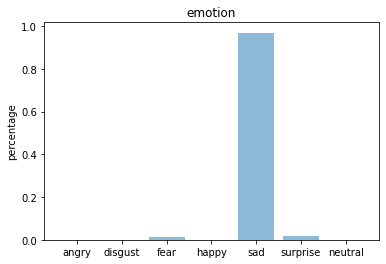

[[1.1938629e-03 7.6807645e-09 1.0960916e-02 2.1568383e-05 9.6856302e-01
  1.9259749e-02 9.0174922e-07]]
0.968563


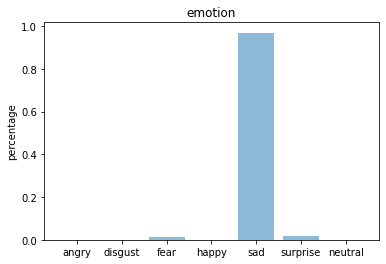

None


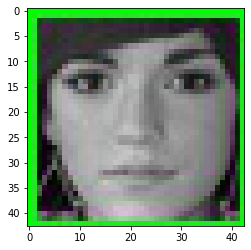

149


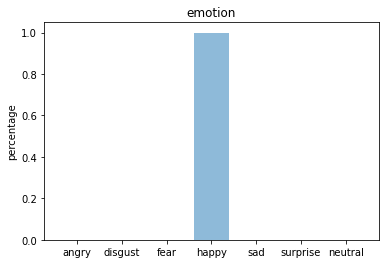

[[1.1196132e-06 3.9236059e-09 8.7186017e-05 9.9938202e-01 5.2550022e-04
  1.4002750e-06 2.7441638e-06]]
0.999382


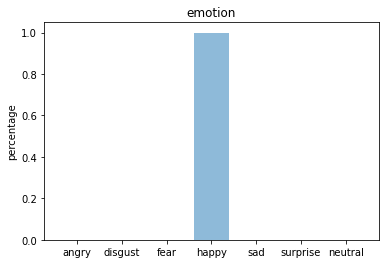

None


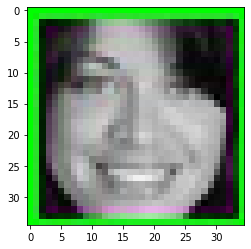

150


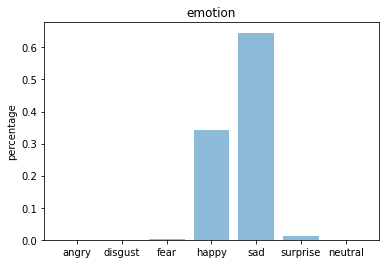

[[2.8290468e-05 2.8790878e-06 1.5411287e-03 3.4167513e-01 6.4566362e-01
  1.1073584e-02 1.5368532e-05]]
0.6456636


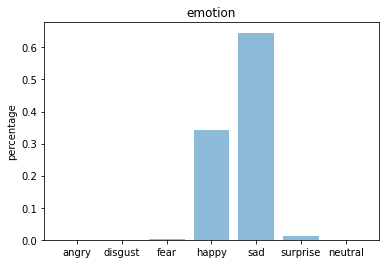

None


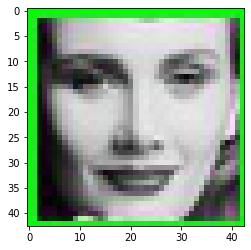

151
Image doesn't exist
152
Image doesn't exist
153
Image doesn't exist
154


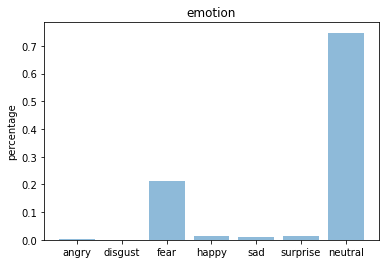

[[1.4113492e-03 1.4801004e-06 2.1131675e-01 1.5064785e-02 1.1739873e-02
  1.3053437e-02 7.4741226e-01]]
0.74741226


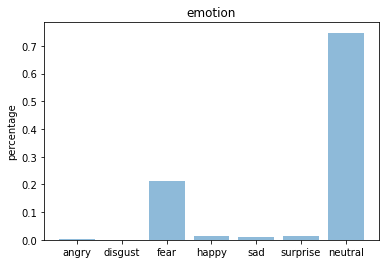

None


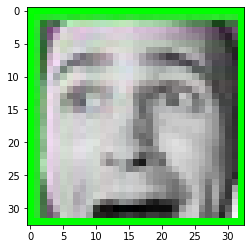

155


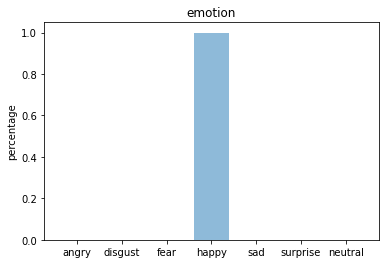

[[1.3080947e-05 4.5724917e-09 1.6192622e-05 9.9923110e-01 4.8811169e-04
  6.0229763e-07 2.5083151e-04]]
0.9992311


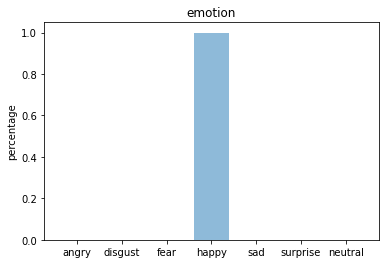

None


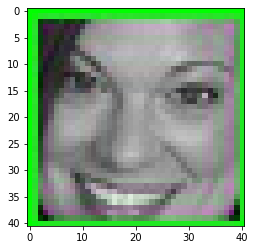

156
Image doesn't exist
157
Image doesn't exist
158
Image doesn't exist
159


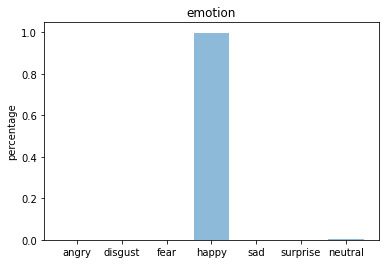

[[1.6860213e-06 1.0955466e-10 5.6021952e-05 9.9760664e-01 2.6611304e-05
  7.8687219e-05 2.2303639e-03]]
0.99760664


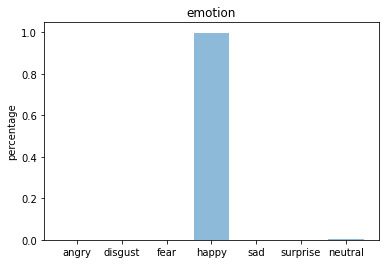

None


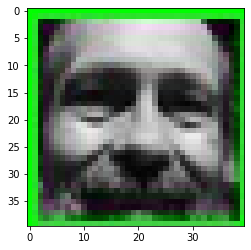

160


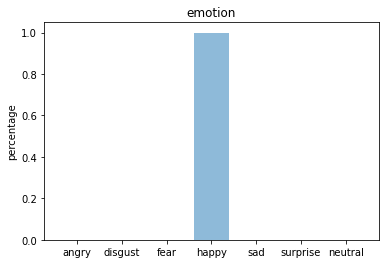

[[3.4189177e-06 9.9434988e-07 1.0557631e-04 9.9931347e-01 3.2312542e-04
  2.1406267e-04 3.9438342e-05]]
0.9993135


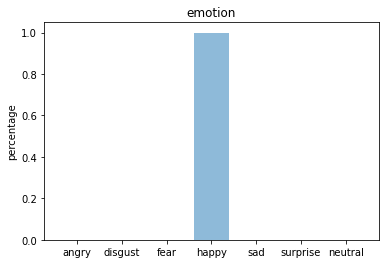

None


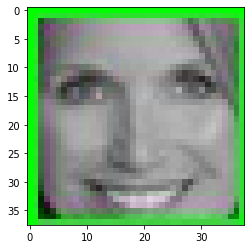

161


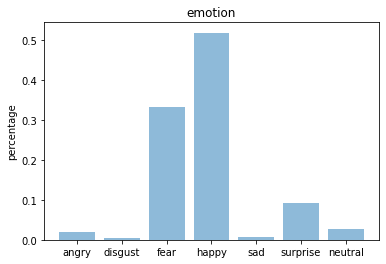

[[0.02051668 0.00461762 0.33185652 0.5188574  0.00614288 0.09186234
  0.02614652]]
0.5188574


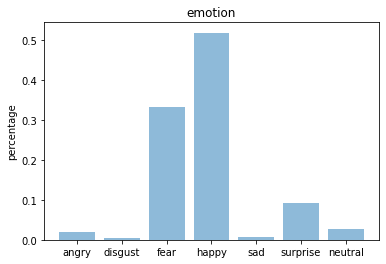

None


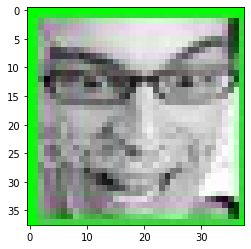

162


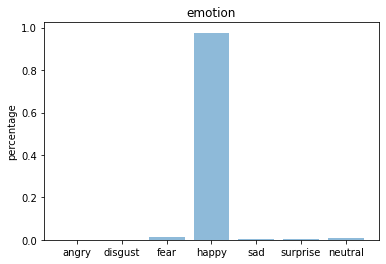

[[1.1025531e-03 4.2149352e-04 1.1578462e-02 9.7612214e-01 2.3149436e-03
  2.1020642e-03 6.3584354e-03]]
0.97612214


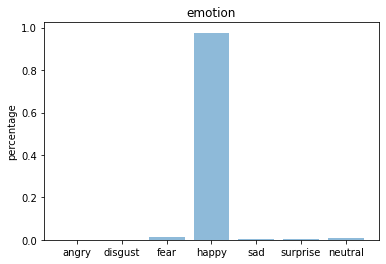

None


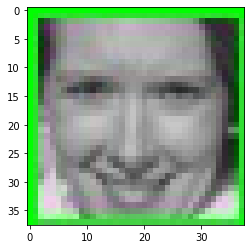

163


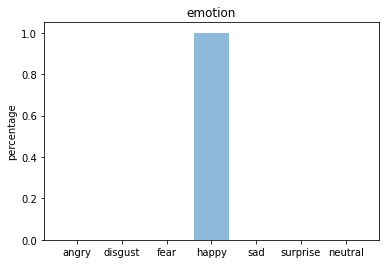

[[5.1650812e-08 6.8341846e-11 1.7540787e-08 9.9978548e-01 2.1451536e-04
  4.4068695e-08 2.7467610e-08]]
0.9997855


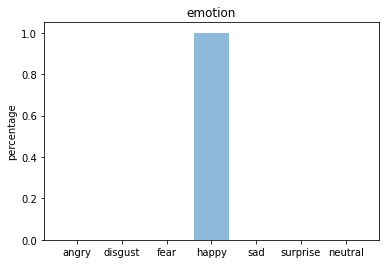

None


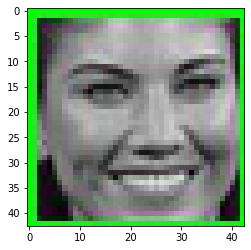

164


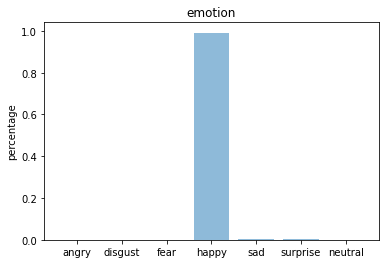

[[1.7940056e-05 5.2678948e-05 2.1839773e-04 9.9131739e-01 2.8272218e-03
  5.4476457e-03 1.1869425e-04]]
0.9913174


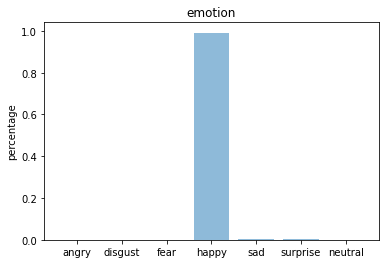

None


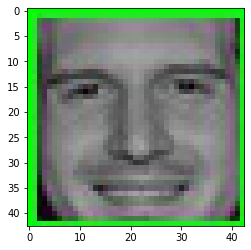

165


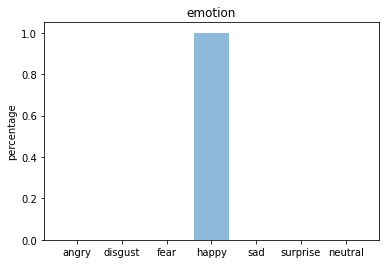

[[4.5388084e-09 8.8710722e-10 2.4945754e-07 9.9999285e-01 5.8701635e-06
  5.9795320e-07 4.3657039e-07]]
0.99999285


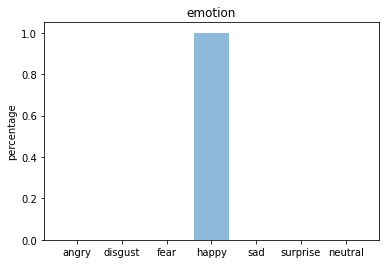

None


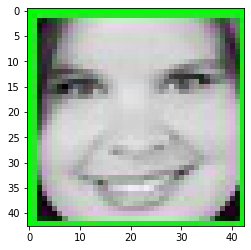

166
Image doesn't exist
167


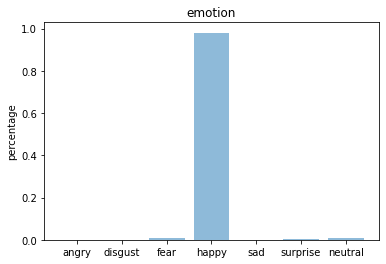

[[1.4095315e-04 1.0125144e-05 8.6987047e-03 9.8017913e-01 2.9505543e-05
  2.1346651e-03 8.8068387e-03]]
0.98017913


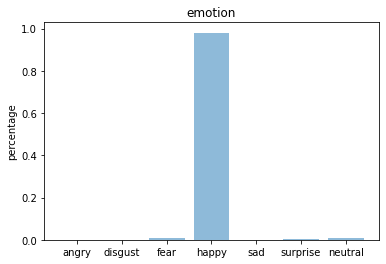

None


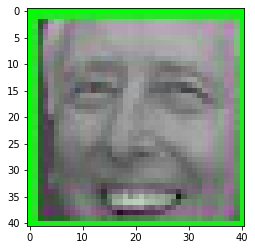

168


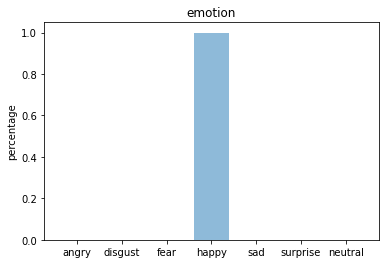

[[8.0193267e-06 1.4138441e-06 3.7360136e-04 9.9926203e-01 2.2814120e-04
  1.2397175e-04 2.8432921e-06]]
0.99926203


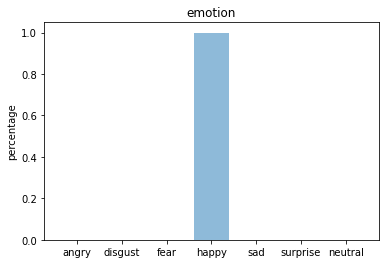

None


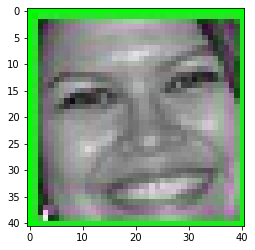

169
Image doesn't exist
170
Image doesn't exist
171


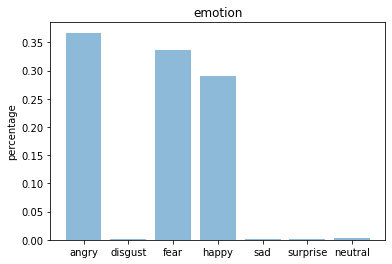

[[0.36697182 0.00078121 0.3358752  0.28976974 0.00131716 0.00217489
  0.00310989]]
0.36697182


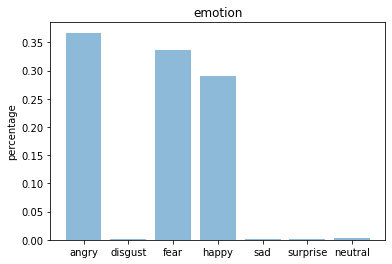

None


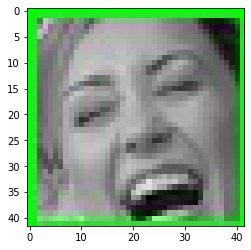

172
Image doesn't exist
173


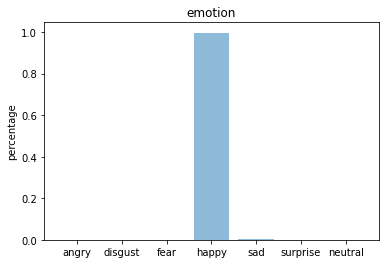

[[3.15569681e-09 1.43997759e-12 1.19415545e-05 9.96734381e-01
  3.18664289e-03 9.91804427e-07 6.59555444e-05]]
0.9967344


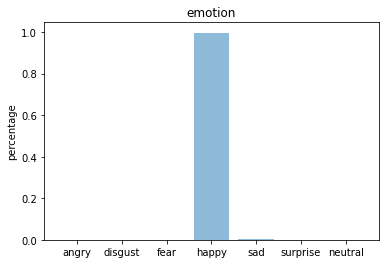

None


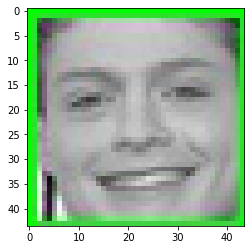

174


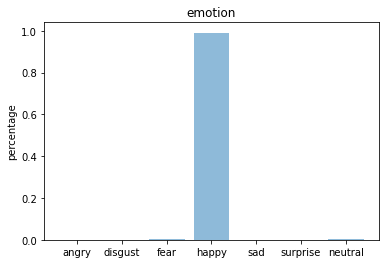

[[1.9480417e-06 1.6643378e-08 4.4960557e-03 9.9089932e-01 2.0615776e-07
  3.3815707e-06 4.5990637e-03]]
0.9908993


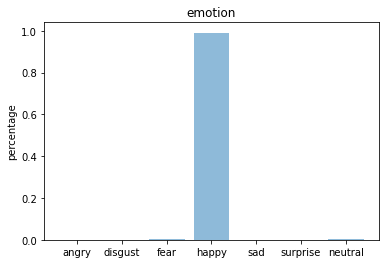

None


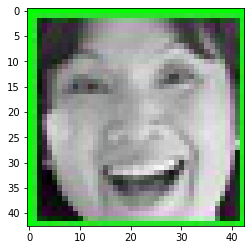

175
Image doesn't exist
176


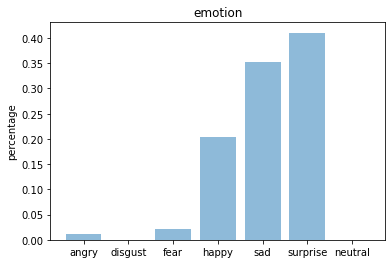

[[1.0550443e-02 6.1340797e-05 2.0806106e-02 2.0462286e-01 3.5338628e-01
  4.1048479e-01 8.8212211e-05]]
0.4104848


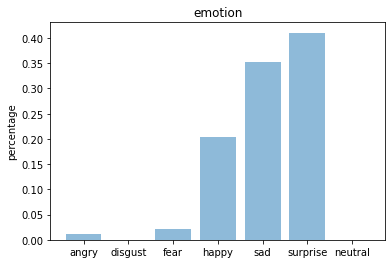

None


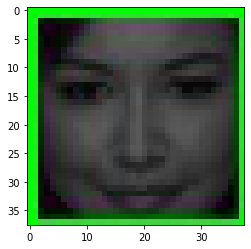

177


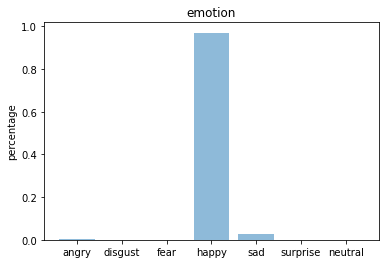

[[2.5451069e-03 1.4511679e-06 1.4658982e-04 9.7078192e-01 2.5740398e-02
  3.8272294e-04 4.0176971e-04]]
0.9707819


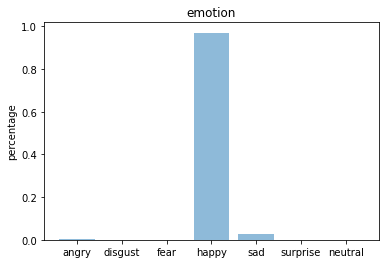

None


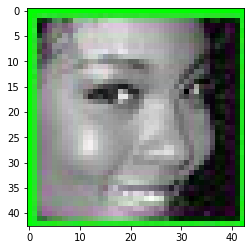

178
Image doesn't exist
179


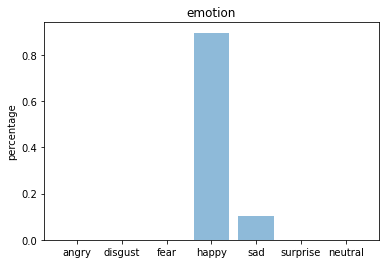

[[2.70004151e-04 6.43817799e-08 6.04509609e-04 8.97073448e-01
  1.01907104e-01 1.20850222e-04 2.40906247e-05]]
0.89707345


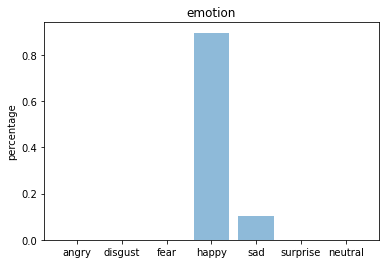

None


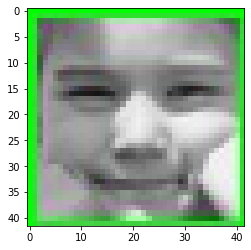

180
Image doesn't exist
181
Image doesn't exist
182
Image doesn't exist
183


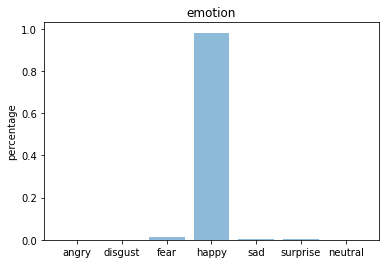

[[7.1767753e-04 3.0204679e-05 1.2005222e-02 9.8158157e-01 2.1280788e-03
  2.9201487e-03 6.1705126e-04]]
0.98158157


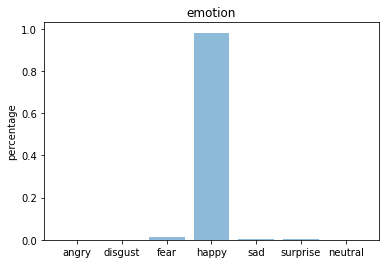

None


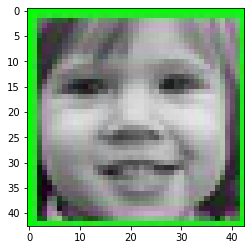

184


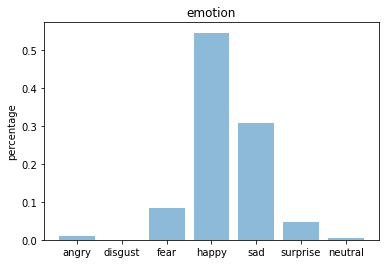

[[9.0691419e-03 1.9852644e-04 8.4596910e-02 5.4695493e-01 3.0849221e-01
  4.6964556e-02 3.7236742e-03]]
0.54695493


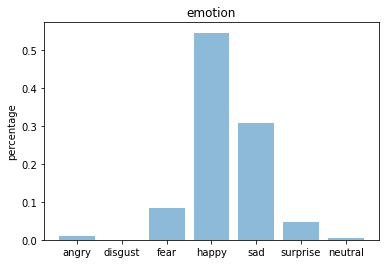

None


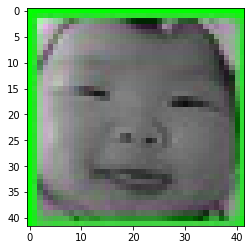

185
Image doesn't exist
186


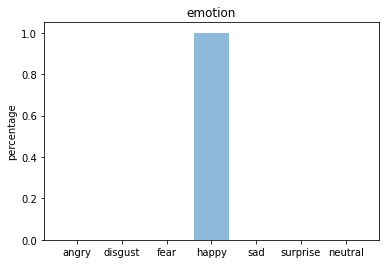

[[1.0335831e-06 2.1613239e-07 8.9146624e-08 9.9997640e-01 2.2141638e-05
  9.0533042e-08 8.2087354e-08]]
0.9999764


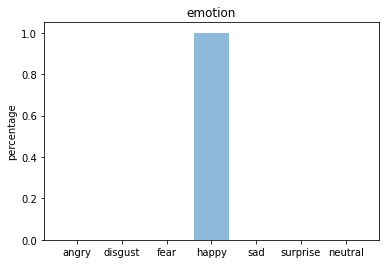

None


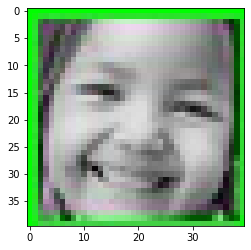

187


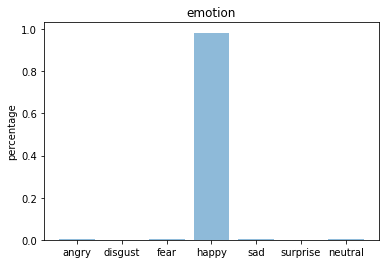

[[1.4609955e-03 9.5085561e-04 3.1591784e-03 9.8361397e-01 5.6403507e-03
  7.7650329e-04 4.3981001e-03]]
0.98361397


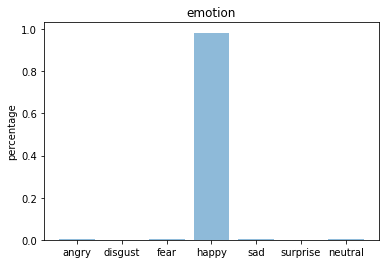

None


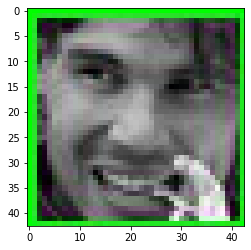

188
Image doesn't exist
189


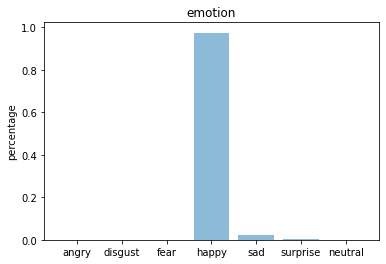

[[3.5287027e-05 7.6747623e-05 1.8232244e-04 9.7379148e-01 2.3847792e-02
  1.9150099e-03 1.5128042e-04]]
0.9737915


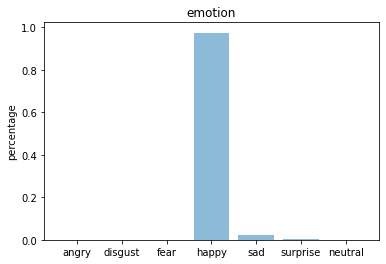

None


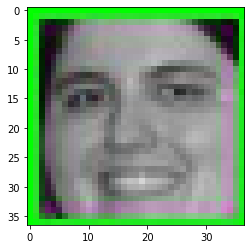

190


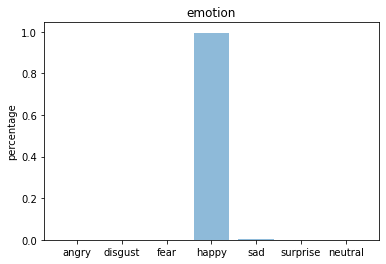

[[2.8227125e-06 4.9205884e-08 4.5081615e-06 9.9500632e-01 4.9819229e-03
  2.6447854e-06 1.7640159e-06]]
0.9950063


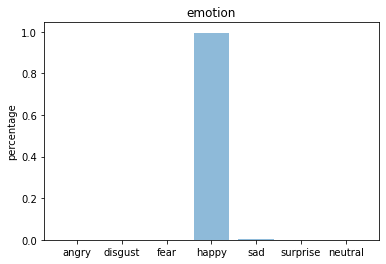

None


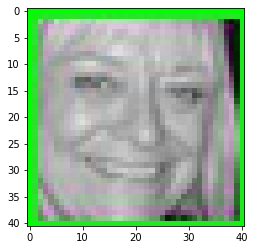

191
Image doesn't exist
192
Image doesn't exist
193
Image doesn't exist
194
Image doesn't exist
195
Image doesn't exist
196
Image doesn't exist
197
Image doesn't exist
198


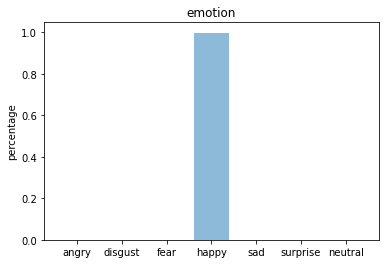

[[1.06019565e-04 5.86558053e-05 2.65233102e-04 9.98924792e-01
  5.01619244e-04 3.23431777e-05 1.11341331e-04]]
0.9989248


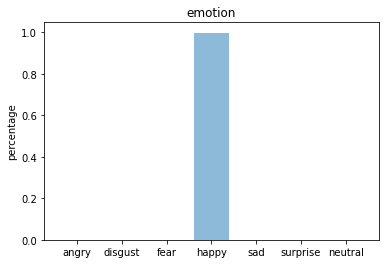

None


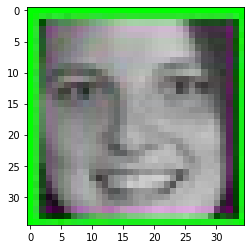

199


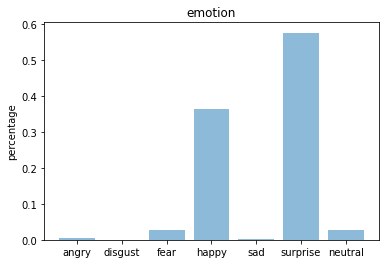

[[4.2004487e-03 3.2158999e-04 2.6804177e-02 3.6319691e-01 3.0153608e-03
  5.7602733e-01 2.6434144e-02]]
0.57602733


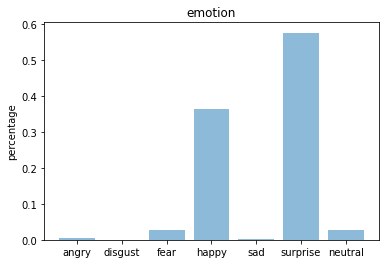

None


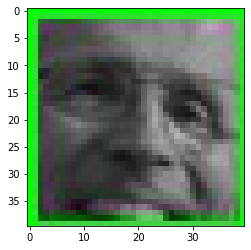

200
Image doesn't exist
201
Image doesn't exist
202


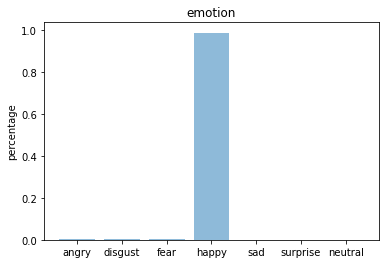

[[1.8403216e-03 2.3756870e-03 4.6066851e-03 9.8834103e-01 1.1263106e-03
  1.1737108e-03 5.3618505e-04]]
0.98834103


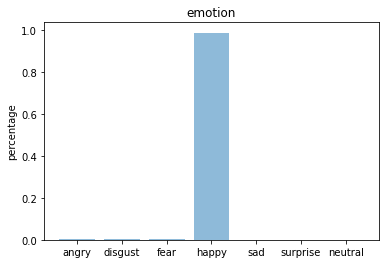

None


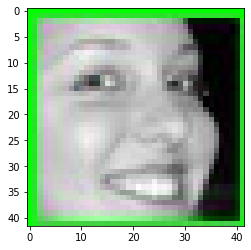

203
Image doesn't exist
204
Image doesn't exist
205


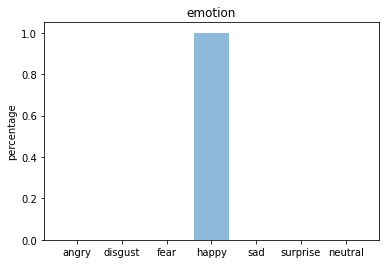

[[5.3681703e-08 1.4015527e-07 2.0559472e-05 9.9995112e-01 2.1496880e-05
  8.4607512e-07 5.7706034e-06]]
0.9999511


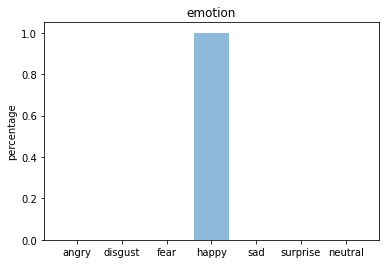

None


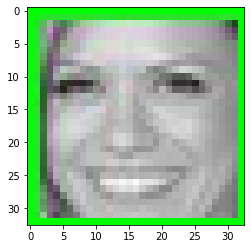

206


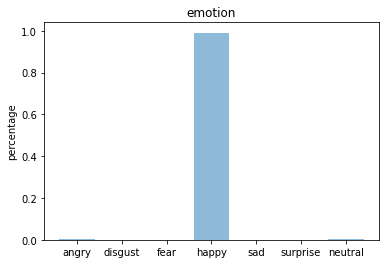

[[4.1573262e-03 7.1217350e-08 4.1344232e-04 9.9030054e-01 1.7793188e-04
  8.9961824e-05 4.8607495e-03]]
0.99030054


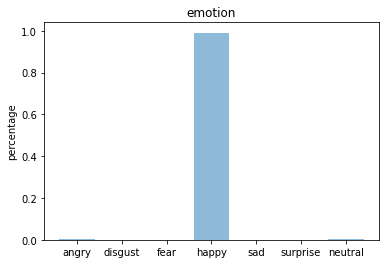

None


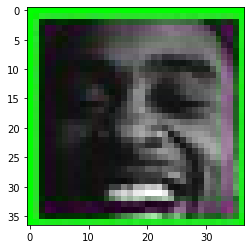

207


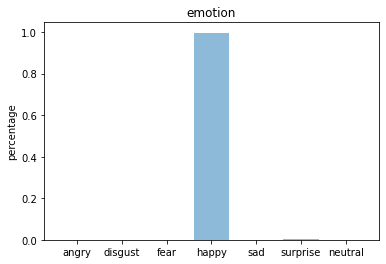

[[1.6131367e-05 2.8571114e-05 3.5256027e-05 9.9677736e-01 3.3781002e-04
  2.6232833e-03 1.8162280e-04]]
0.99677736


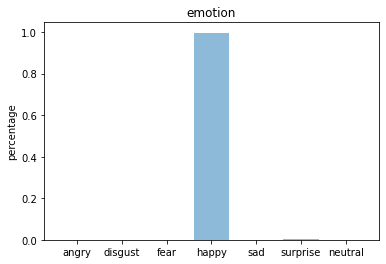

None


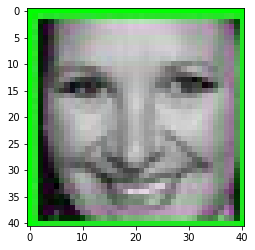

208
Image doesn't exist
209


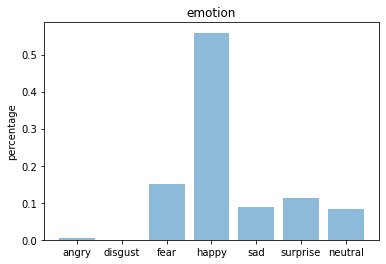

[[0.00566409 0.00056241 0.14984842 0.5589333  0.08980675 0.11189166
  0.08329332]]
0.5589333


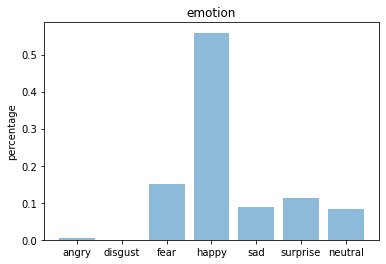

None


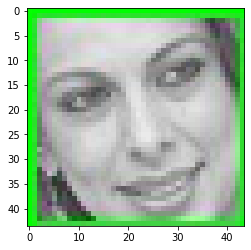

210
Image doesn't exist
211
Image doesn't exist
212


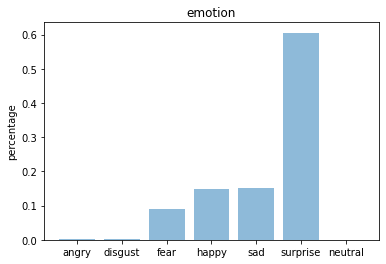

[[2.3251080e-03 1.9279966e-03 9.0134285e-02 1.4772497e-01 1.5216812e-01
  6.0541433e-01 3.0514706e-04]]
0.60541433


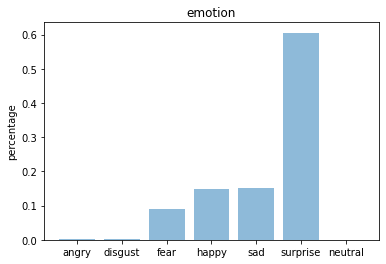

None


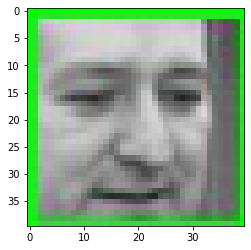

213
Image doesn't exist
214
Image doesn't exist
215


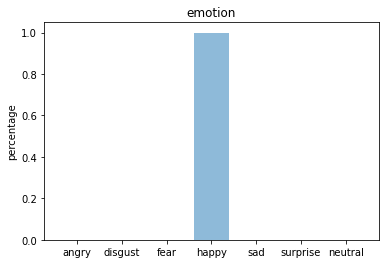

[[3.3289766e-06 5.1276641e-07 7.2360228e-05 9.9953544e-01 5.2557305e-05
  1.0833717e-05 3.2500600e-04]]
0.99953544


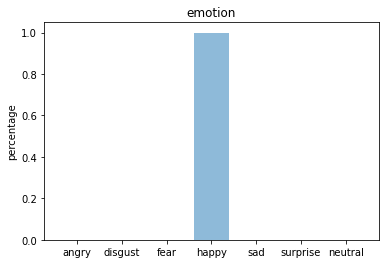

None


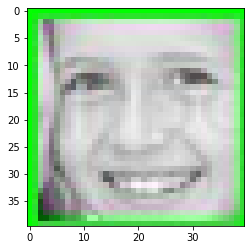

216
Image doesn't exist
217


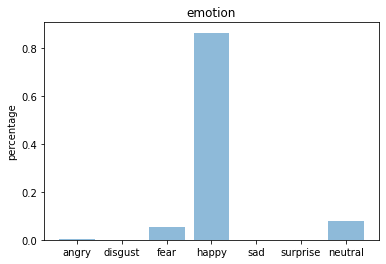

[[1.5650849e-03 2.1086554e-07 5.4775480e-02 8.6366206e-01 3.1332311e-05
  6.1255014e-05 7.9904675e-02]]
0.86366206


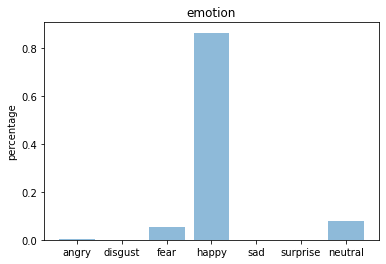

None


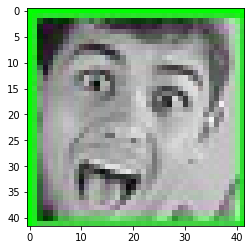

218
Image doesn't exist
219
Image doesn't exist
220


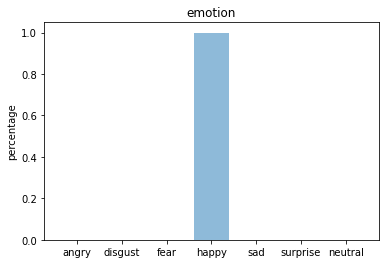

[[1.7555647e-06 2.1849480e-06 3.3517746e-05 9.9897707e-01 6.3642039e-04
  2.8741080e-05 3.2045646e-04]]
0.99897707


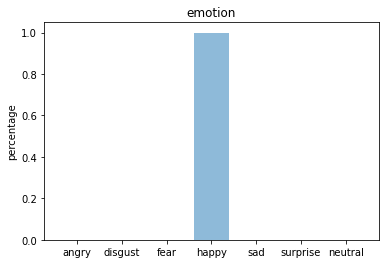

None


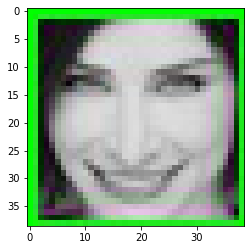

221
Image doesn't exist
222
Image doesn't exist
223


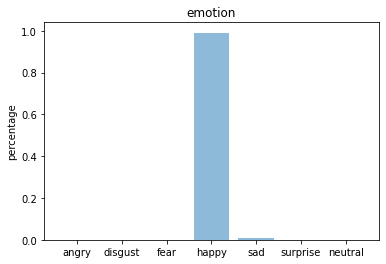

[[8.1101418e-05 1.2691775e-06 1.5247540e-04 9.9057204e-01 8.6337943e-03
  6.5144413e-06 5.5270822e-04]]
0.99057204


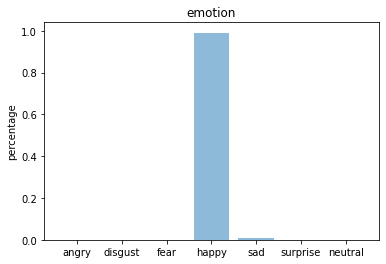

None


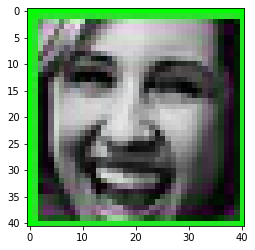

224
Image doesn't exist
225


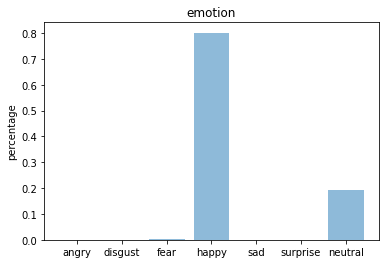

[[9.1675401e-04 2.1870933e-07 4.1918154e-03 8.0127394e-01 3.3735545e-05
  3.2117456e-05 1.9355145e-01]]
0.80127394


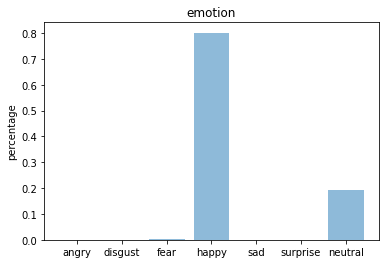

None


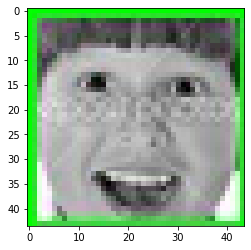

226
Image doesn't exist
227


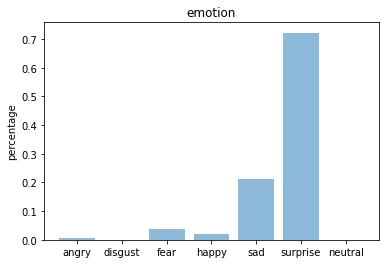

[[6.0170805e-03 1.2142217e-05 3.8033687e-02 2.0356344e-02 2.1342535e-01
  7.2215539e-01 4.6330024e-09]]
0.7221554


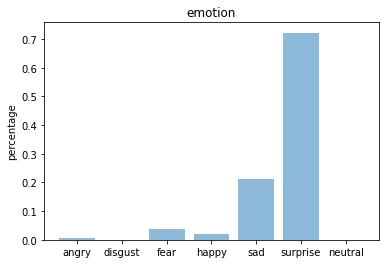

None


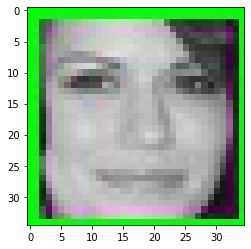

228
Image doesn't exist
229
Image doesn't exist
230
Image doesn't exist
231


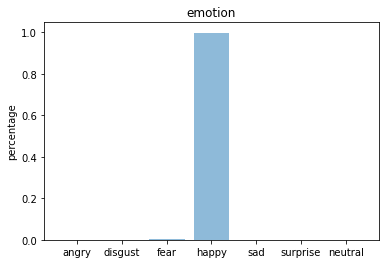

[[8.9547079e-04 1.4729910e-05 1.5455618e-03 9.9736267e-01 5.6109484e-06
  1.3785527e-04 3.8059265e-05]]
0.9973627


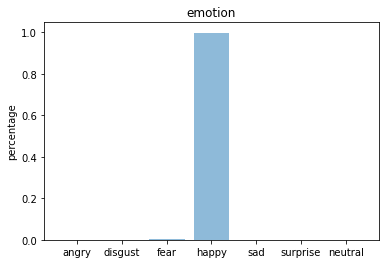

None


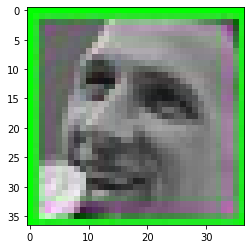

232


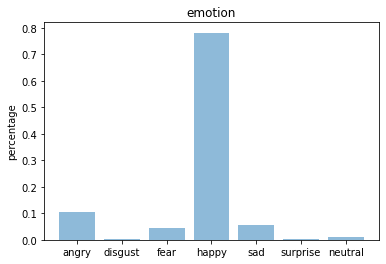

[[0.1046596  0.00264683 0.04294623 0.7815308  0.05554224 0.00334813
  0.00932611]]
0.7815308


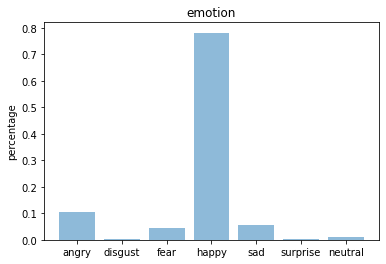

None


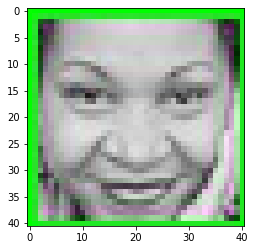

233


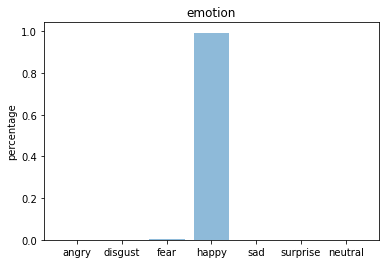

[[1.1467739e-05 3.4370557e-06 4.7339881e-03 9.9400043e-01 7.7203661e-04
  4.6304706e-04 1.5588899e-05]]
0.99400043


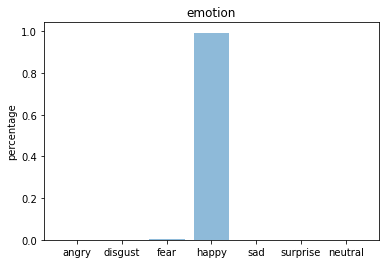

None


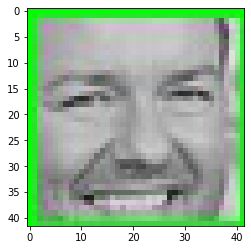

234
Image doesn't exist
235
Image doesn't exist
236
Image doesn't exist
237
Image doesn't exist
238


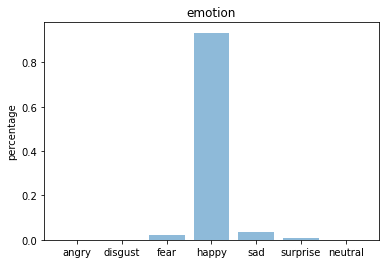

[[7.2567776e-04 3.4304347e-05 2.2279378e-02 9.3409276e-01 3.6235206e-02
  6.2819822e-03 3.5061815e-04]]
0.93409276


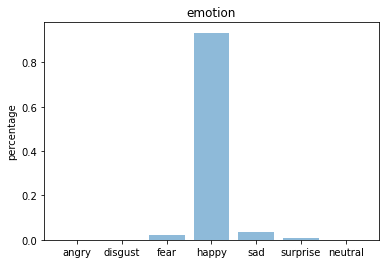

None


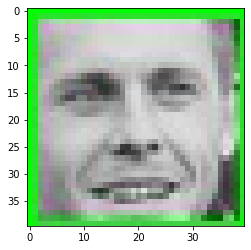

239
Image doesn't exist
240
Image doesn't exist
241
Image doesn't exist
242


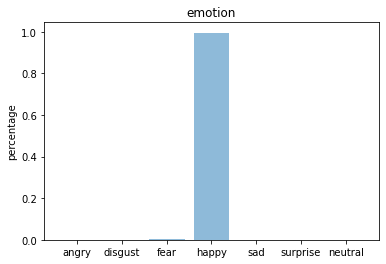

[[3.1446034e-06 6.5612547e-09 3.9372263e-03 9.9603194e-01 7.8786243e-06
  1.6912688e-06 1.8052093e-05]]
0.99603194


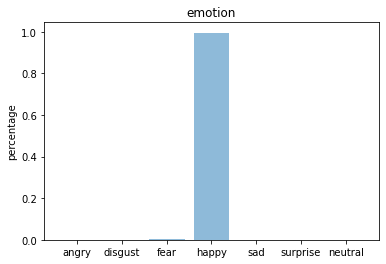

None


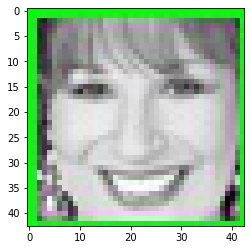

243
Image doesn't exist
244


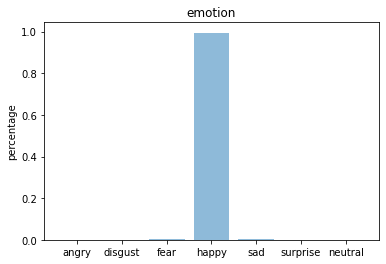

[[1.8840887e-04 1.2173874e-08 1.8298391e-03 9.9454331e-01 2.2311357e-03
  8.9964342e-06 1.1982663e-03]]
0.9945433


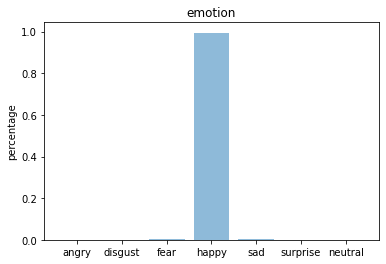

None


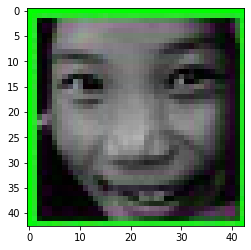

245
Image doesn't exist
246
Image doesn't exist
247


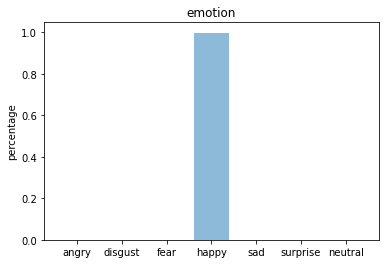

[[1.1711912e-05 1.5849282e-07 1.8881061e-04 9.9843150e-01 9.2141490e-06
  2.4392023e-06 1.3561615e-03]]
0.9984315


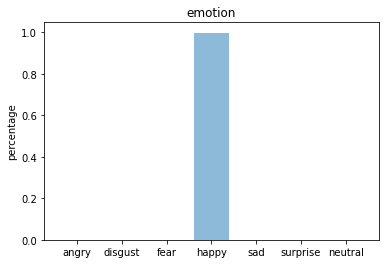

None


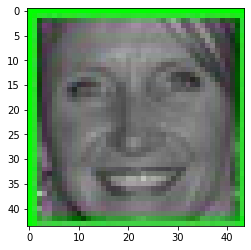

248
Image doesn't exist
249
Image doesn't exist
250


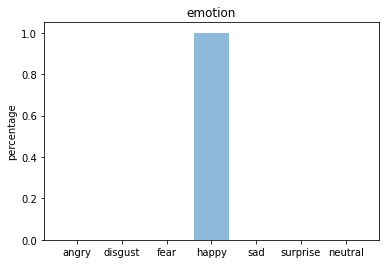

[[1.6091477e-09 1.3643939e-11 6.3273532e-08 9.9999738e-01 3.7465952e-08
  1.8490717e-07 2.2929187e-06]]
0.9999974


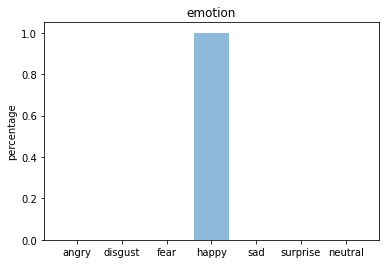

None


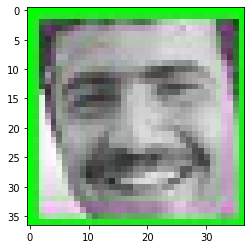

251


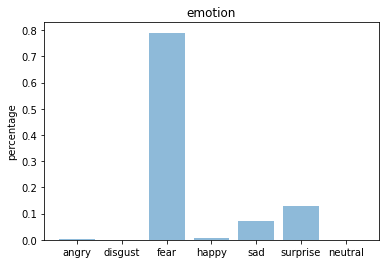

[[1.2654804e-03 1.1365003e-04 7.8995860e-01 7.4990178e-03 7.2323926e-02
  1.2769654e-01 1.1428733e-03]]
0.7899586


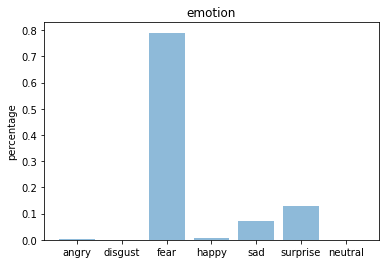

None


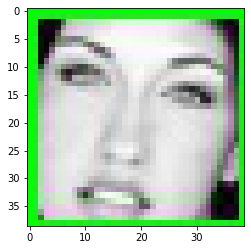

252
Image doesn't exist
253
Image doesn't exist
254
Image doesn't exist
255
Image doesn't exist
256


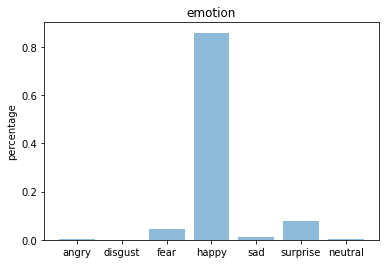

[[2.9975253e-03 3.2678727e-05 4.4560038e-02 8.5971463e-01 1.2930780e-02
  7.7784210e-02 1.9800477e-03]]
0.8597146


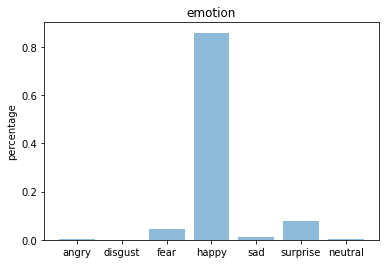

None


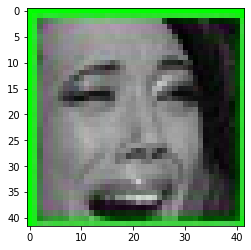

257
Image doesn't exist
258


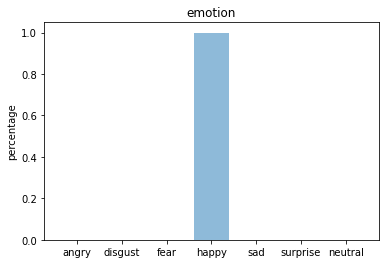

[[8.5601732e-06 2.5159844e-07 8.8954825e-05 9.9959308e-01 2.1861661e-04
  2.5329648e-05 6.5108674e-05]]
0.9995931


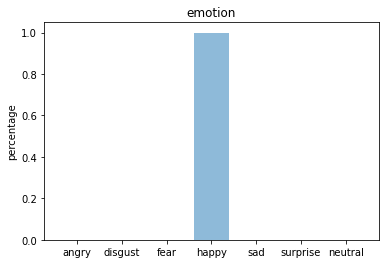

None


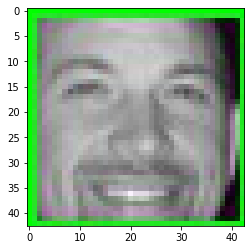

259


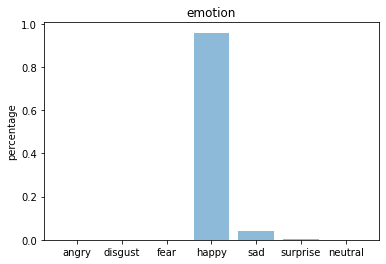

[[1.5252989e-05 2.2583768e-05 2.2228794e-04 9.5896626e-01 3.9049689e-02
  1.6725927e-03 5.1396670e-05]]
0.95896626


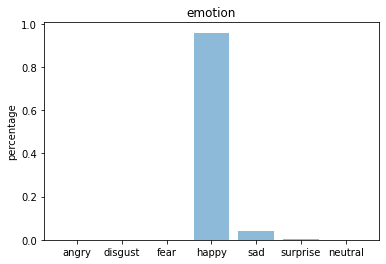

None


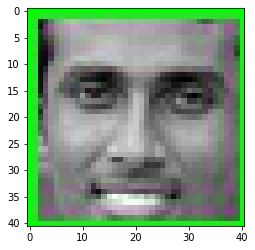

260
Image doesn't exist
261
Image doesn't exist
262
Image doesn't exist
263
Image doesn't exist
264
Image doesn't exist
265


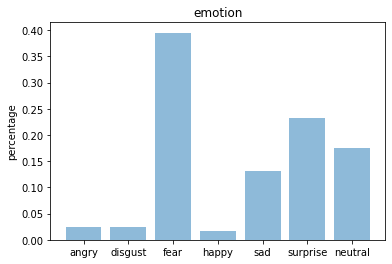

[[0.02399303 0.02374362 0.3953124  0.01757914 0.13128902 0.23288856
  0.1751942 ]]
0.3953124


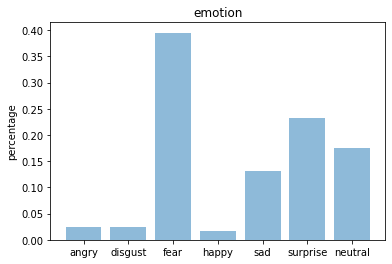

None


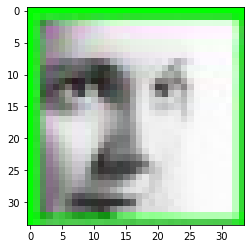

266


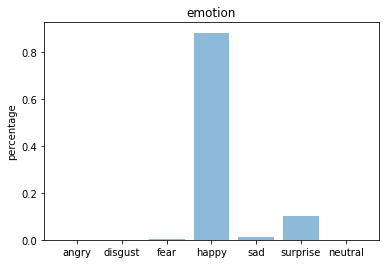

[[1.3830716e-04 4.9575203e-08 1.9250490e-03 8.8419479e-01 1.3152520e-02
  1.0055336e-01 3.5944264e-05]]
0.8841948


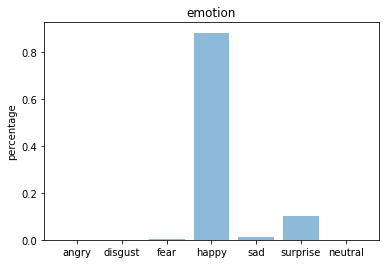

None


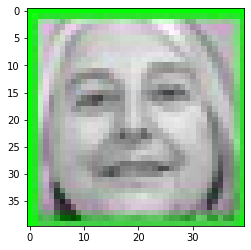

267


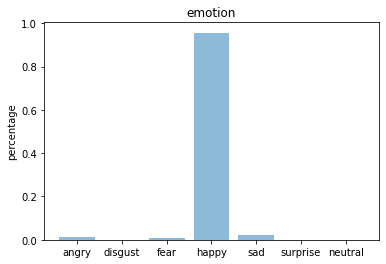

[[1.1565154e-02 2.6888351e-04 8.4331809e-03 9.5630121e-01 2.2016538e-02
  9.9680468e-04 4.1829090e-04]]
0.9563012


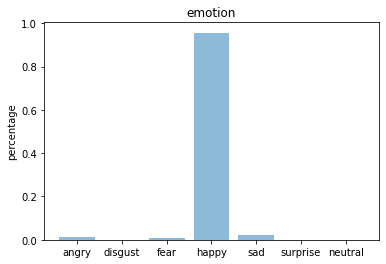

None


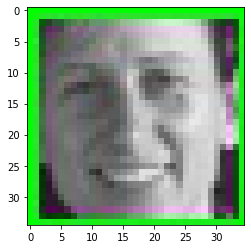

268
Image doesn't exist
269
Image doesn't exist
270


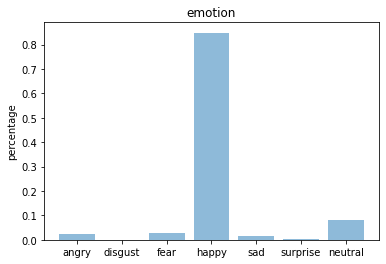

[[2.2917626e-02 8.4486161e-04 2.8279439e-02 8.4829420e-01 1.6973024e-02
  2.2329811e-03 8.0457889e-02]]
0.8482942


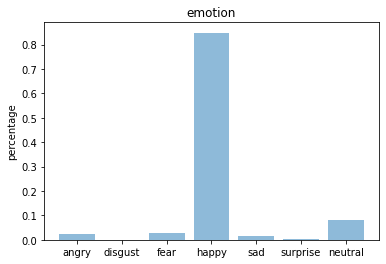

None


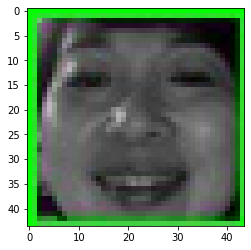

271
Image doesn't exist
272


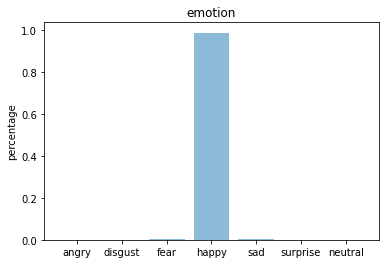

[[3.1885962e-04 7.0832489e-06 4.6218154e-03 9.8929518e-01 5.4183602e-03
  1.8904098e-04 1.4959165e-04]]
0.9892952


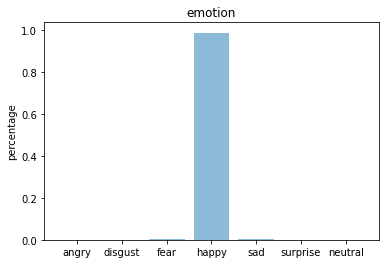

None


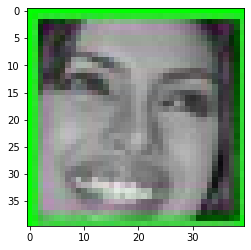

273
Image doesn't exist
274


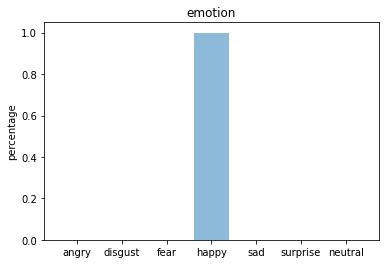

[[4.0249910e-09 5.3681187e-12 4.5588969e-08 9.9966693e-01 8.4112645e-07
  1.2649642e-10 3.3227852e-04]]
0.9996669


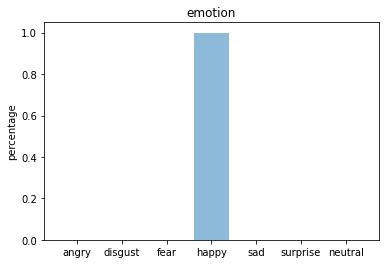

None


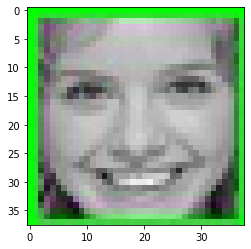

275


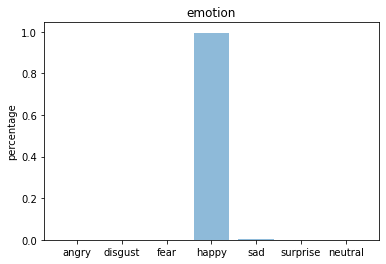

[[8.1421706e-05 7.2539825e-07 5.2067990e-06 9.9571407e-01 4.1280705e-03
  6.9579684e-05 9.5700534e-07]]
0.99571407


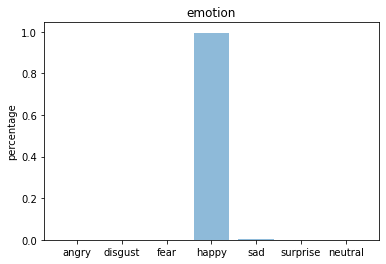

None


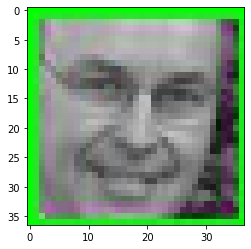

276


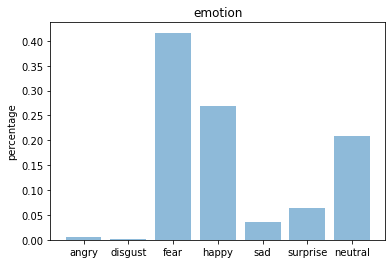

[[0.00658845 0.00086338 0.41642076 0.26883477 0.03536321 0.0635134
  0.20841604]]
0.41642076


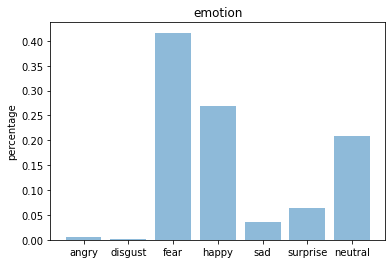

None


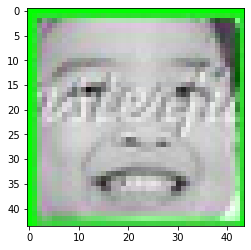

277
Image doesn't exist
278
Image doesn't exist
279


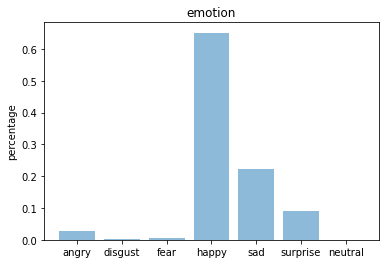

[[2.8434180e-02 1.1012530e-03 5.5830283e-03 6.5139151e-01 2.2323707e-01
  9.0190440e-02 6.2486717e-05]]
0.6513915


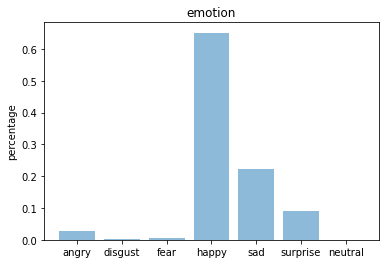

None


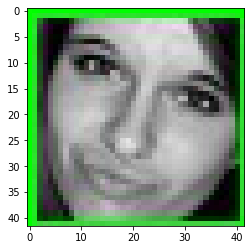

280
Image doesn't exist
281


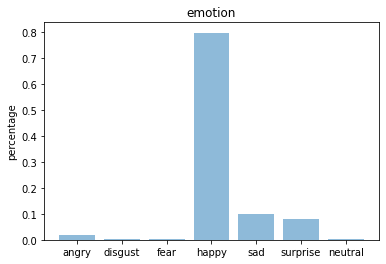

[[0.01674559 0.00467002 0.0032213  0.796214   0.09829007 0.07916147
  0.0016976 ]]
0.796214


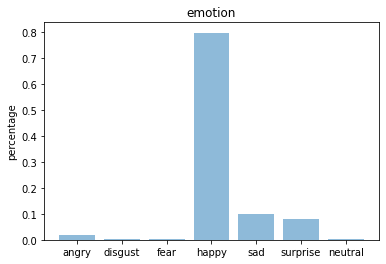

None


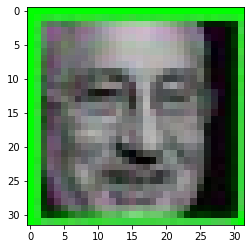

282
Image doesn't exist
283


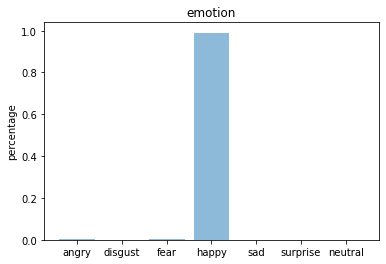

[[1.6319609e-03 9.5378223e-04 6.1866329e-03 9.9018425e-01 4.7794374e-06
  1.3287227e-04 9.0569869e-04]]
0.99018425


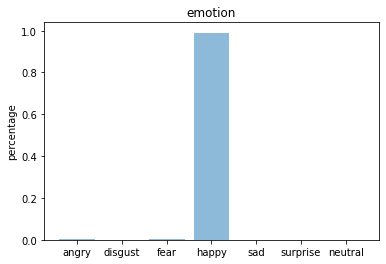

None


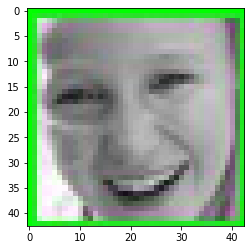

284
Image doesn't exist
285
Image doesn't exist
286
Image doesn't exist
287


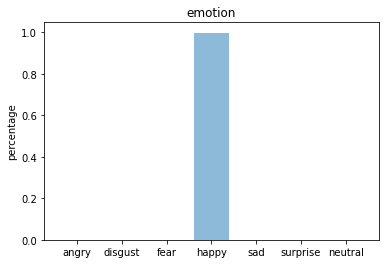

[[3.5329525e-05 2.8160763e-05 8.8632609e-05 9.9826592e-01 1.4368852e-03
  1.2652641e-04 1.8495635e-05]]
0.9982659


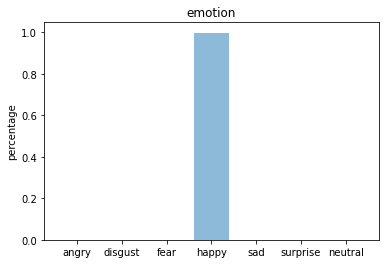

None


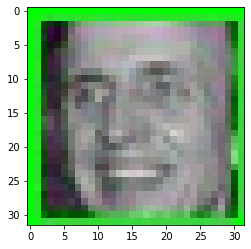

288
Image doesn't exist
289
Image doesn't exist
290
Image doesn't exist
291


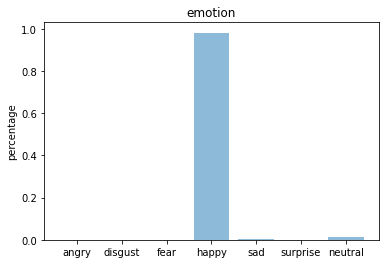

[[4.8929454e-08 3.9891090e-10 1.7183384e-05 9.8143047e-01 5.1947902e-03
  6.4306892e-07 1.3356907e-02]]
0.9814305


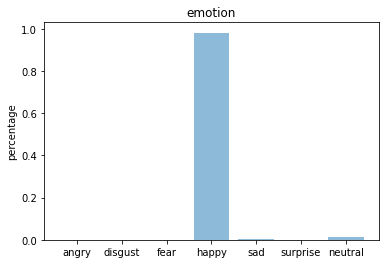

None


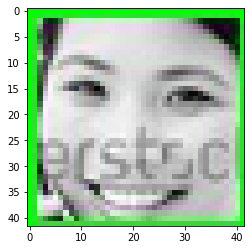

292
Image doesn't exist
293


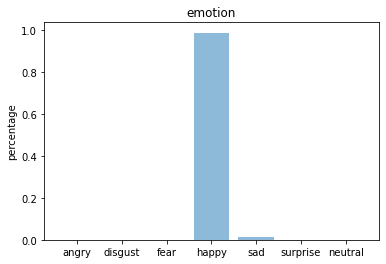

[[4.6111254e-06 7.6676855e-08 6.2380009e-04 9.8575079e-01 1.3155037e-02
  4.4980587e-04 1.5958185e-05]]
0.9857508


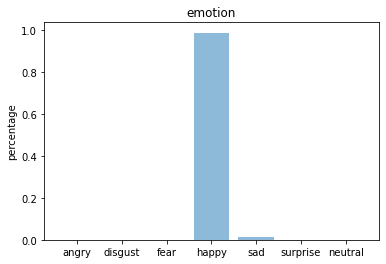

None


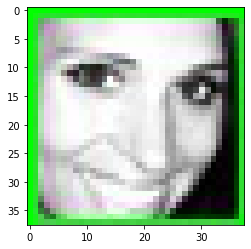

294
Image doesn't exist
295


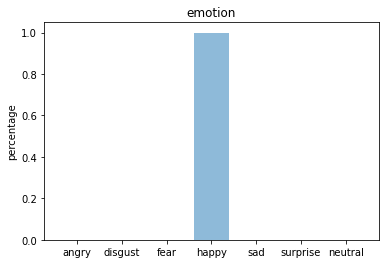

[[6.6153447e-08 6.8653103e-06 6.5080370e-05 9.9937385e-01 2.4859575e-04
  1.8905308e-05 2.8668670e-04]]
0.99937385


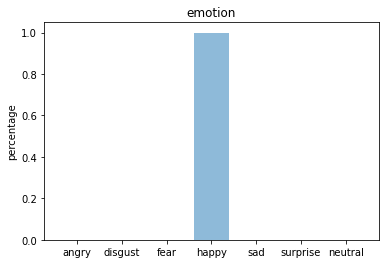

None


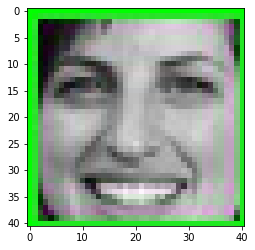

296
Image doesn't exist
297


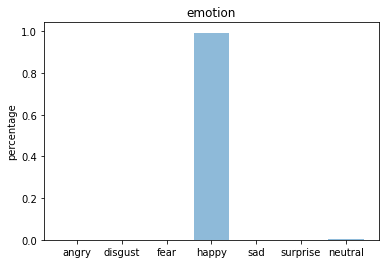

[[3.1499472e-05 8.9453908e-07 1.2866673e-03 9.9333972e-01 1.2450244e-03
  1.3738502e-04 3.9586830e-03]]
0.9933397


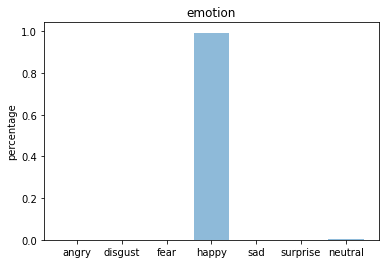

None


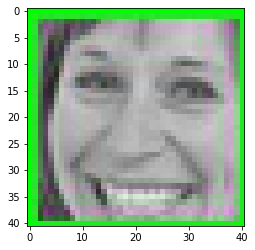

298
Image doesn't exist
299
Image doesn't exist
300


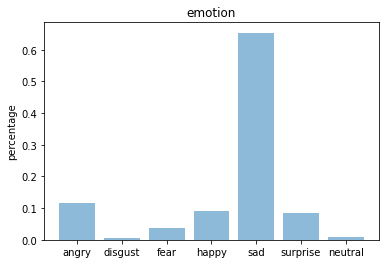

[[0.1156836  0.00722757 0.03731069 0.09229305 0.65393287 0.08495972
  0.00859243]]
0.65393287


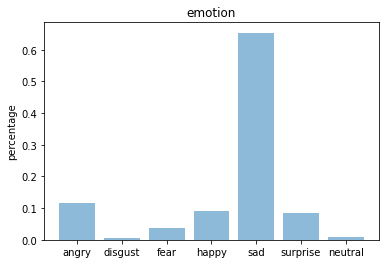

None


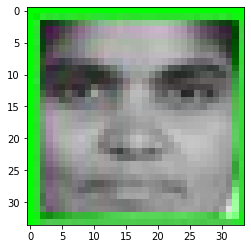

301
Image doesn't exist
302
Image doesn't exist
303


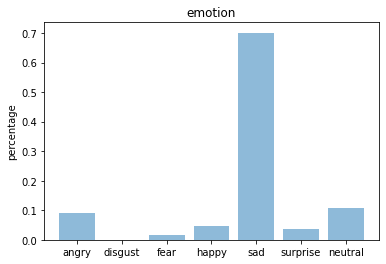

[[8.9321986e-02 8.2236955e-05 1.6424578e-02 4.7469001e-02 7.0107812e-01
  3.8157072e-02 1.0746695e-01]]
0.7010781


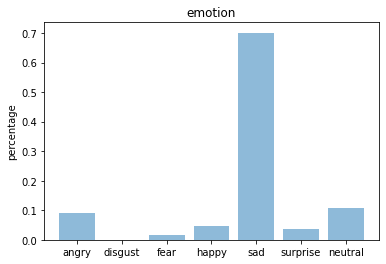

None


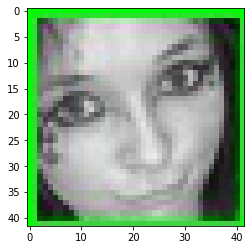

304


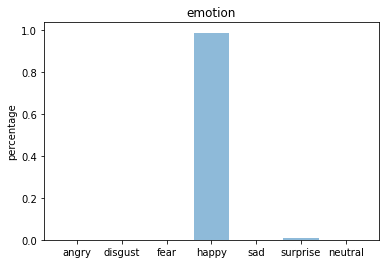

[[1.4877040e-06 2.7677990e-07 5.7736859e-05 9.8927492e-01 5.6846725e-04
  1.0093370e-02 3.7598568e-06]]
0.9892749


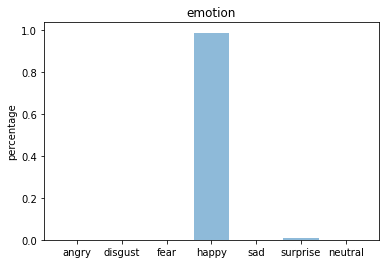

None


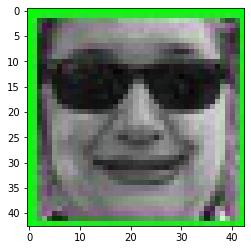

305
Image doesn't exist
306
Image doesn't exist
307


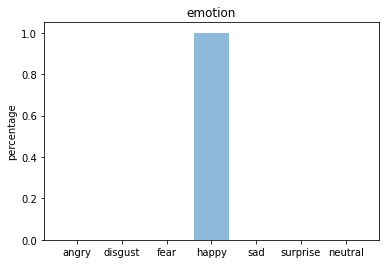

[[7.3681013e-11 2.2959050e-15 4.1303980e-10 1.0000000e+00 4.4199022e-09
  1.5111913e-09 3.4240273e-12]]
1.0


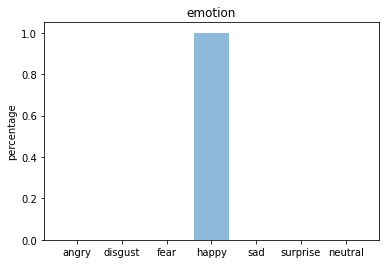

None


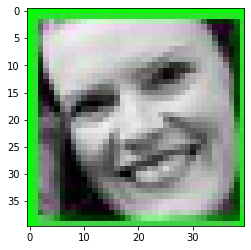

308
Image doesn't exist
309
Image doesn't exist
310


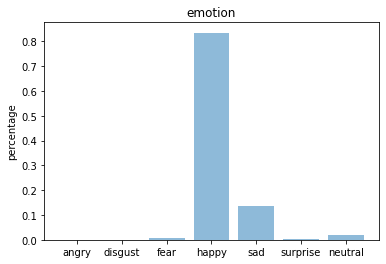

[[1.8370869e-04 2.8317179e-05 6.5957508e-03 8.3426225e-01 1.3757858e-01
  1.6868325e-03 1.9664584e-02]]
0.83426225


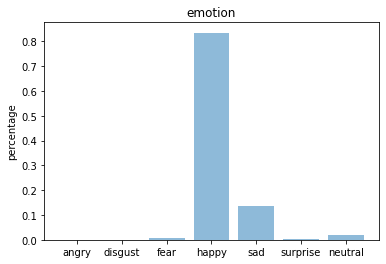

None


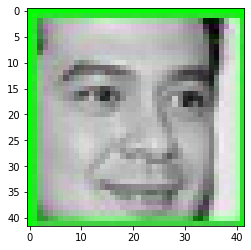

311
Image doesn't exist
312
Image doesn't exist
313
Image doesn't exist
314


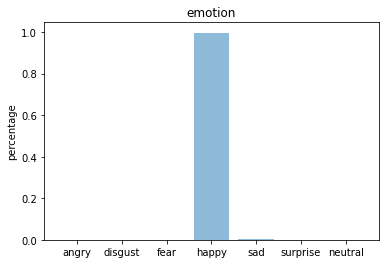

[[6.3755077e-05 3.1236832e-06 1.2507692e-05 9.9698299e-01 2.9323604e-03
  1.6475198e-06 3.6407998e-06]]
0.996983


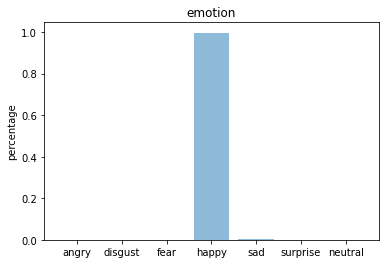

None


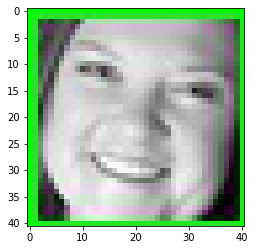

315
Image doesn't exist
316
Image doesn't exist
317


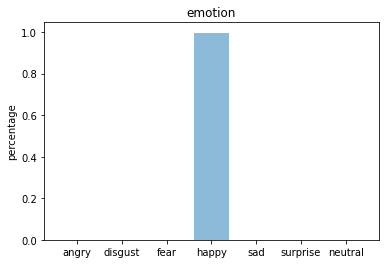

[[7.3943367e-05 1.2105306e-03 2.8641307e-04 9.9702305e-01 2.6107271e-04
  1.1211652e-03 2.3855637e-05]]
0.99702305


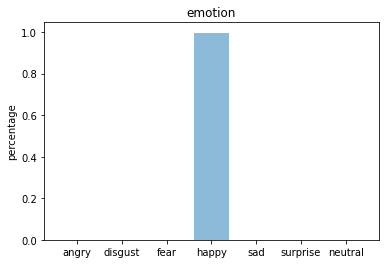

None


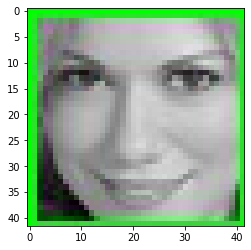

318


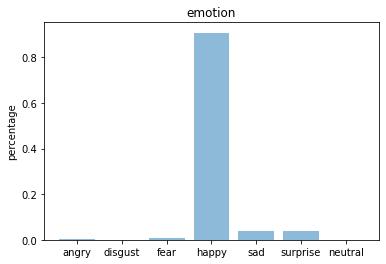

[[5.6366161e-03 6.8443813e-05 6.6325055e-03 9.0861517e-01 3.8139474e-02
  3.9694183e-02 1.2135636e-03]]
0.9086152


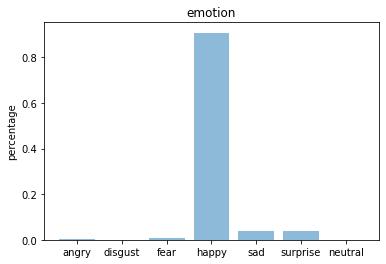

None


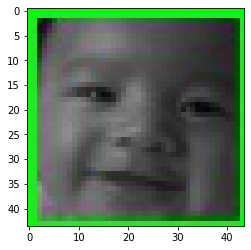

319
Image doesn't exist
320
Image doesn't exist
321
Image doesn't exist
322


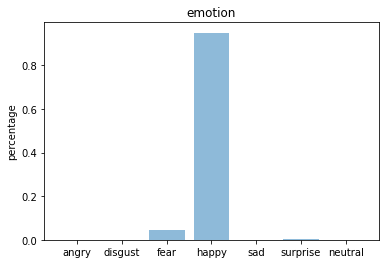

[[2.9518489e-05 4.5012530e-06 4.6391964e-02 9.4947243e-01 8.0157939e-04
  2.5316703e-03 7.6830032e-04]]
0.9494724


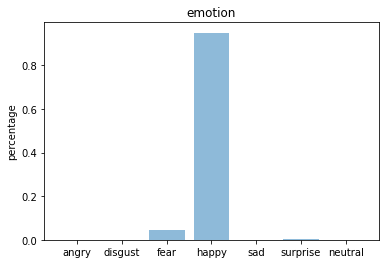

None


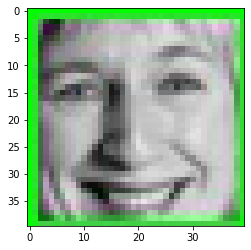

323
Image doesn't exist
324
Image doesn't exist
325
Image doesn't exist
326


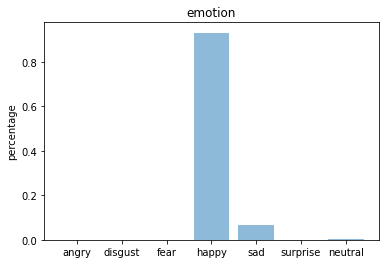

[[3.1016022e-08 3.0649177e-12 1.9531924e-06 9.3179607e-01 6.5586932e-02
  4.2549498e-08 2.6149093e-03]]
0.9317961


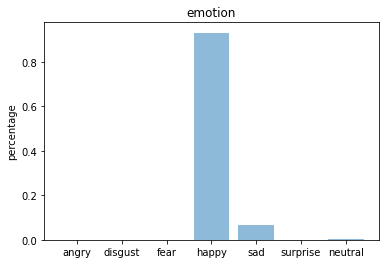

None


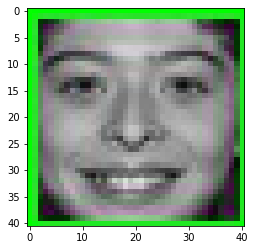

327
Image doesn't exist
328


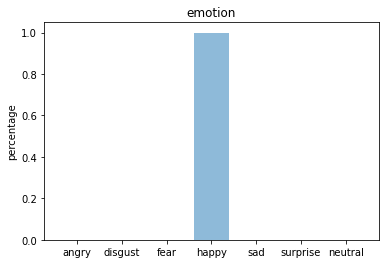

[[5.7376715e-06 1.6727682e-08 1.8366145e-04 9.9906164e-01 5.5492064e-04
  1.9209852e-04 1.9827992e-06]]
0.99906164


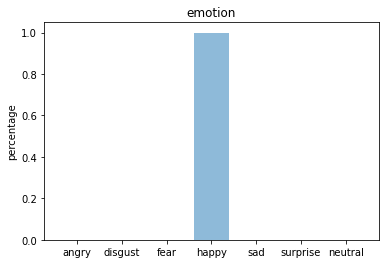

None


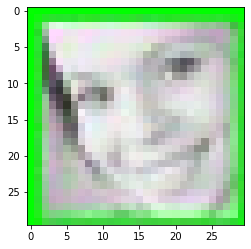

329


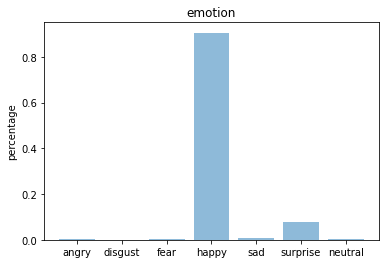

[[1.7142476e-03 3.1690937e-04 3.8232529e-03 9.0560460e-01 5.9073083e-03
  7.7784367e-02 4.8492197e-03]]
0.9056046


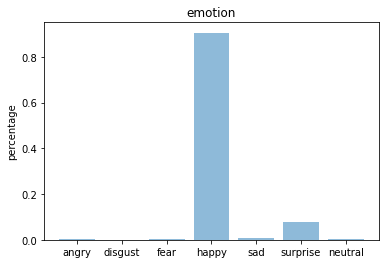

None


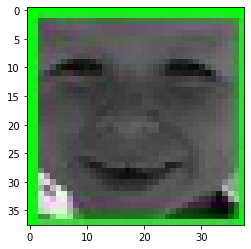

330
Image doesn't exist
331
Image doesn't exist
332
Image doesn't exist
333


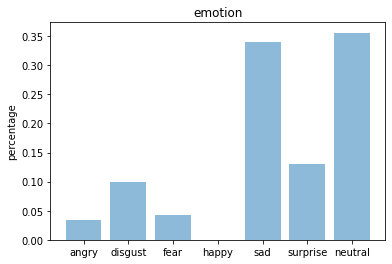

[[3.3175424e-02 9.8674141e-02 4.2152602e-02 3.3191169e-05 3.4017757e-01
  1.2986450e-01 3.5592261e-01]]
0.3559226


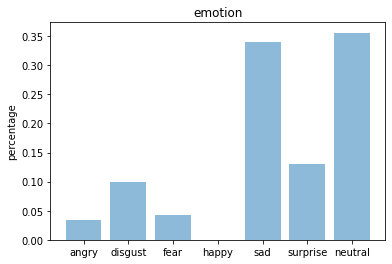

None


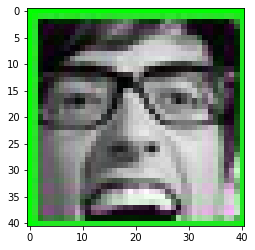

334
Image doesn't exist
335
Image doesn't exist
336


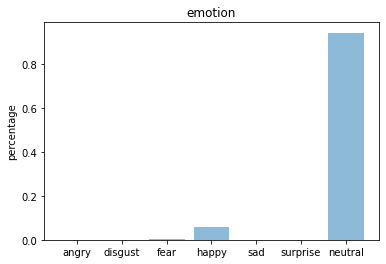

[[8.3611872e-07 1.8677525e-08 1.4330298e-03 5.6724284e-02 4.3792718e-07
  1.6256946e-06 9.4183975e-01]]
0.94183975


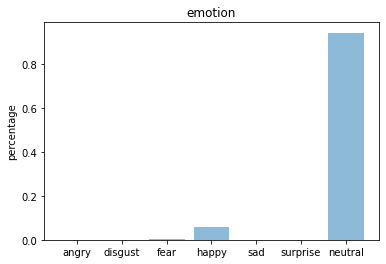

None


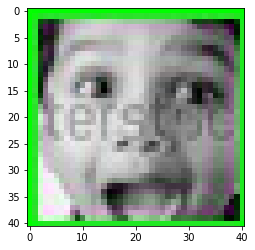

337
Image doesn't exist
338
Image doesn't exist
339


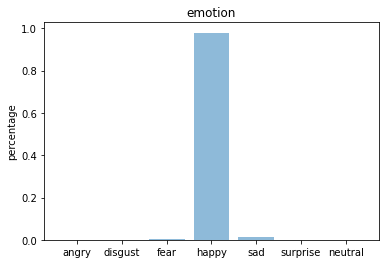

[[2.8355053e-04 1.3925550e-03 5.5062305e-03 9.7937703e-01 1.3279921e-02
  1.0551141e-04 5.5321132e-05]]
0.97937703


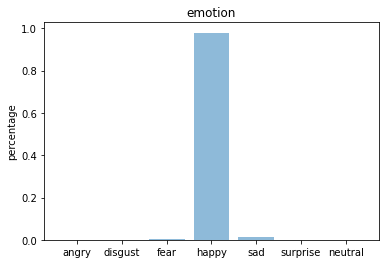

None


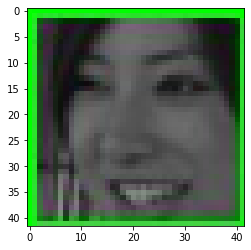

340


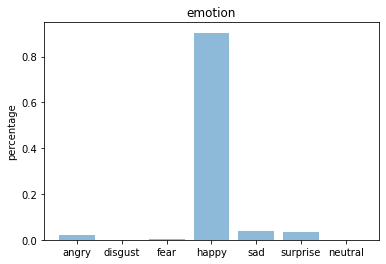

[[1.9324718e-02 5.1556493e-05 1.6430413e-03 9.0425467e-01 3.8314551e-02
  3.5421204e-02 9.9026901e-04]]
0.9042547


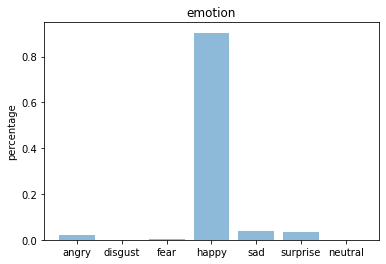

None


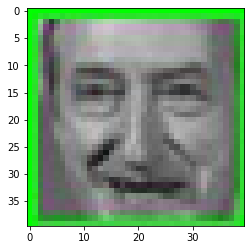

341
Image doesn't exist
342
Image doesn't exist
343
Image doesn't exist
344


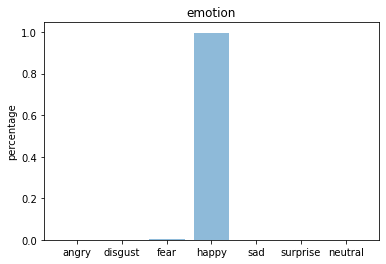

[[1.0186750e-04 4.6823698e-05 1.6057196e-03 9.9672073e-01 2.3226111e-04
  1.2147077e-03 7.8004487e-05]]
0.99672073


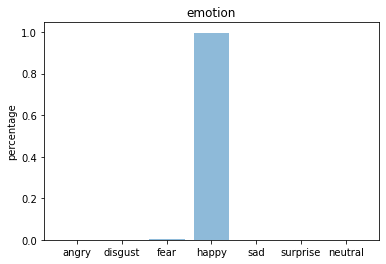

None


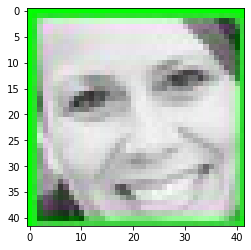

345


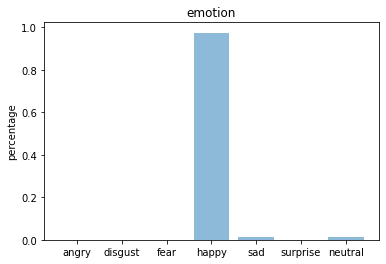

[[6.8969872e-05 2.1240323e-06 3.5274518e-04 9.7523743e-01 1.1619215e-02
  6.8261029e-06 1.2712678e-02]]
0.9752374


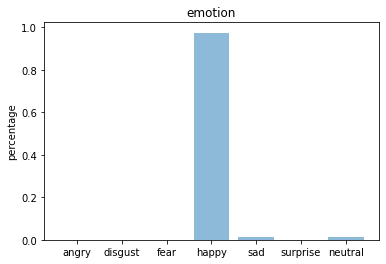

None


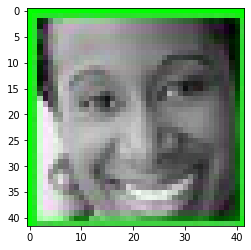

346
Image doesn't exist
347
Image doesn't exist
348


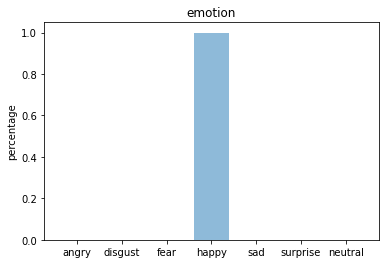

[[8.2583378e-05 9.0387111e-08 6.5559121e-05 9.9930954e-01 4.5346245e-04
  1.7033675e-05 7.1725117e-05]]
0.99930954


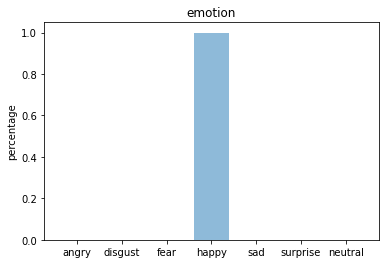

None


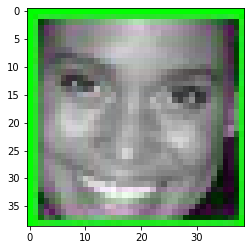

349
Image doesn't exist
350
Image doesn't exist
351
Image doesn't exist
352


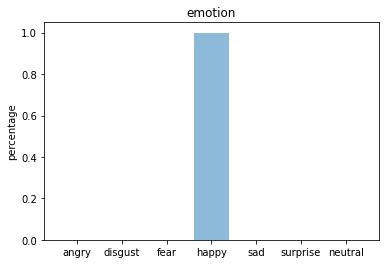

[[6.2811756e-07 7.0187946e-07 5.6513495e-06 9.9965870e-01 2.0399492e-04
  7.2336930e-05 5.8079084e-05]]
0.9996587


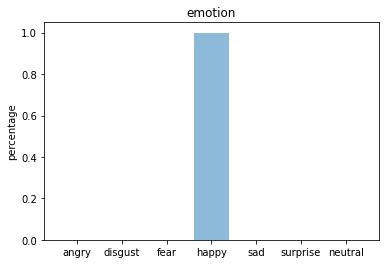

None


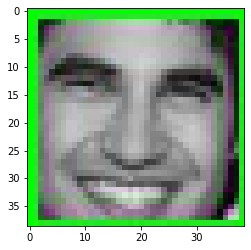

353
Image doesn't exist
354
Image doesn't exist
355
Image doesn't exist
356
Image doesn't exist
357


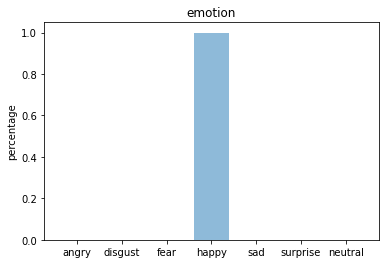

[[2.0619566e-06 5.0472624e-07 1.9303276e-04 9.9938583e-01 1.4810607e-05
  1.6724706e-06 4.0209157e-04]]
0.99938583


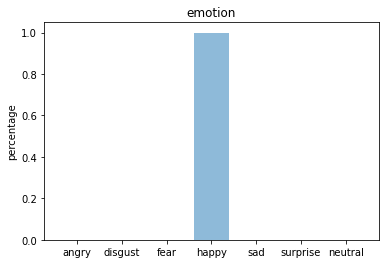

None


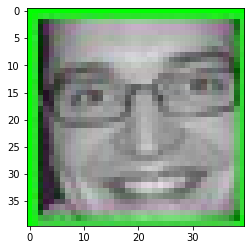

358


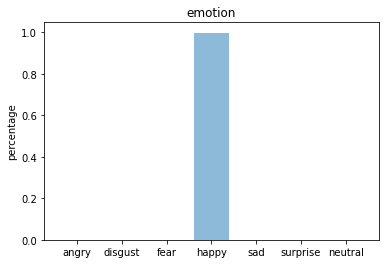

[[2.1288681e-06 1.8614014e-07 1.2286026e-04 9.9864501e-01 9.2976278e-04
  2.0882298e-04 9.1327332e-05]]
0.998645


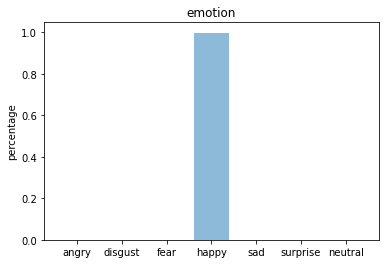

None


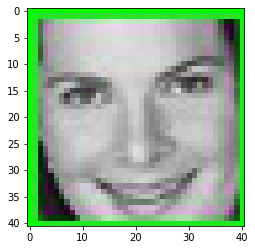

359
Image doesn't exist
360
Image doesn't exist
361
Image doesn't exist
362


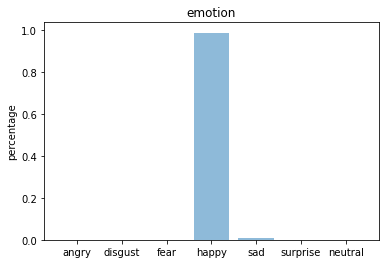

[[2.9737462e-04 1.7108176e-05 7.4961910e-04 9.8816293e-01 1.0383242e-02
  3.7853987e-04 1.1106796e-05]]
0.98816293


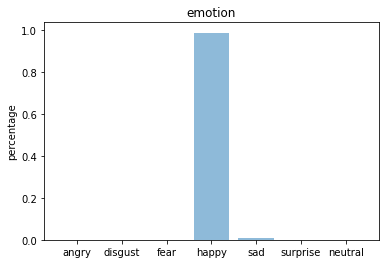

None


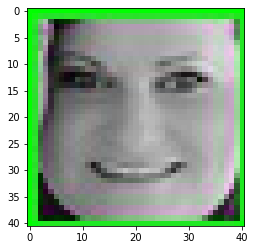

363


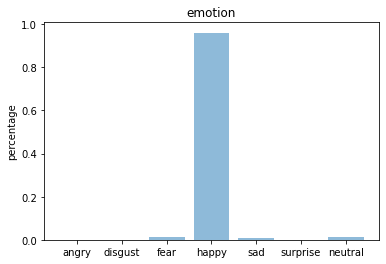

[[1.0546317e-05 2.6997770e-05 1.3029002e-02 9.6027929e-01 1.0546896e-02
  8.3971902e-04 1.5267547e-02]]
0.9602793


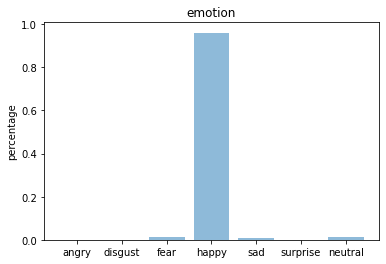

None


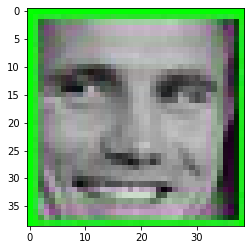

364
Image doesn't exist
365
Image doesn't exist
366


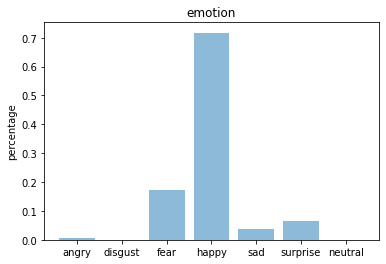

[[6.0054497e-03 4.5325267e-04 1.7159843e-01 7.1749032e-01 3.8964521e-02
  6.5417930e-02 7.0114569e-05]]
0.7174903


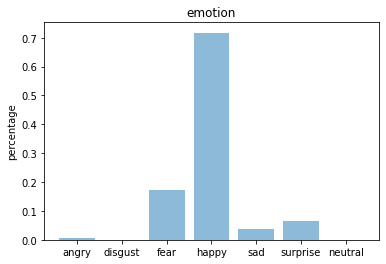

None


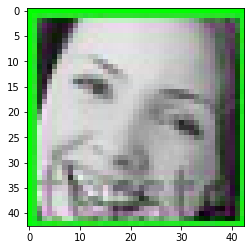

367


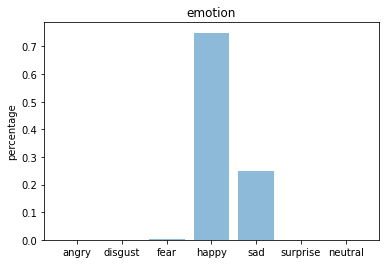

[[1.7904904e-04 1.4007896e-09 1.3669111e-03 7.4965191e-01 2.4853107e-01
  2.7020634e-04 7.6584928e-07]]
0.7496519


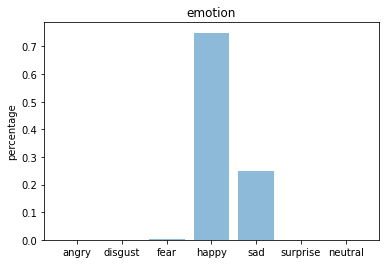

None


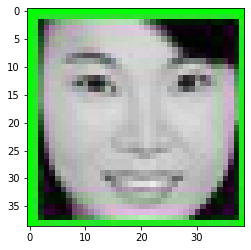

368


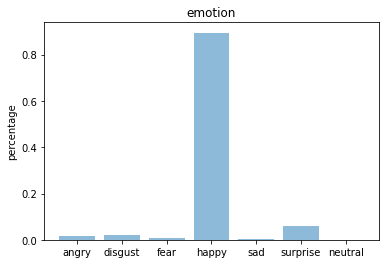

[[1.5383192e-02 2.1142170e-02 7.1111624e-03 8.9465934e-01 2.3540761e-03
  5.9349474e-02 6.7214052e-07]]
0.89465934


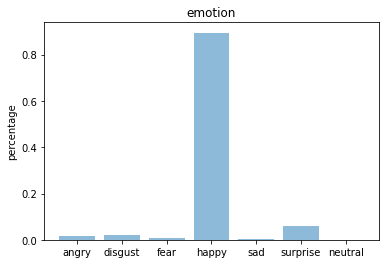

None


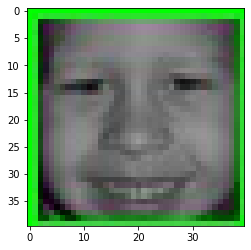

369


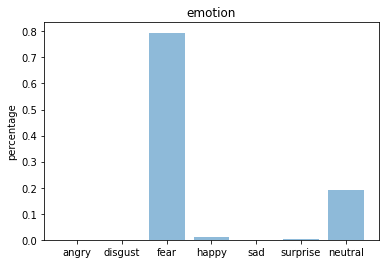

[[1.97350964e-04 6.05346941e-06 7.94817567e-01 1.03135295e-02
  8.44863767e-04 2.40173563e-03 1.91418871e-01]]
0.79481757


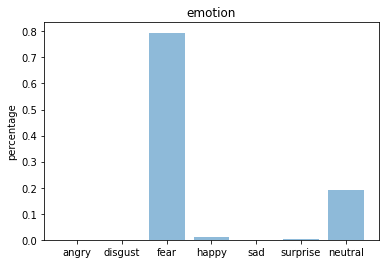

None


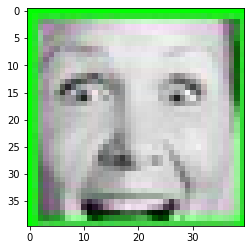

370


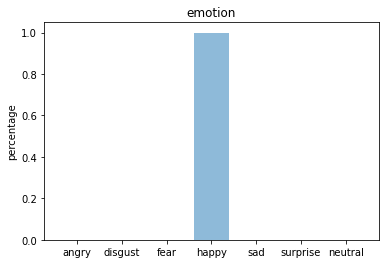

[[2.6061839e-08 7.0444879e-11 3.6658362e-06 9.9937421e-01 1.5941770e-04
  1.9623135e-06 4.6077010e-04]]
0.9993742


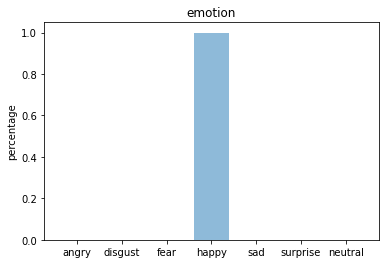

None


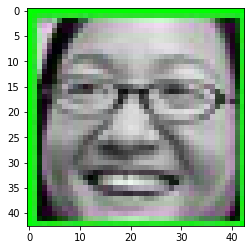

371


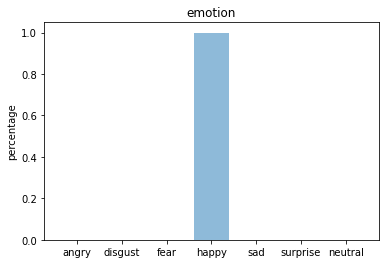

[[5.3834839e-07 3.1482006e-05 1.1646038e-04 9.9938142e-01 8.6392298e-05
  1.8015954e-06 3.8175040e-04]]
0.9993814


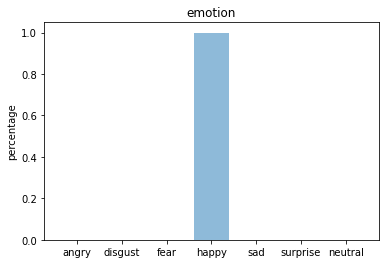

None


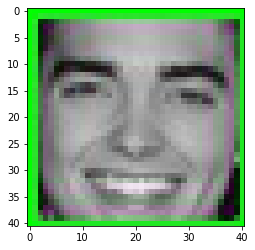

372
Image doesn't exist
373
Image doesn't exist
374
Image doesn't exist
375
Image doesn't exist
376


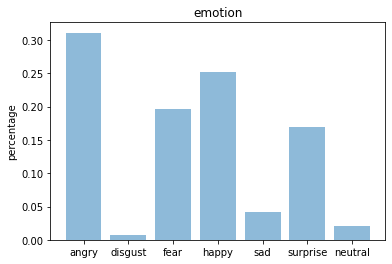

[[0.31094033 0.00745935 0.1961744  0.2523652  0.04224382 0.16993693
  0.02087998]]
0.31094033


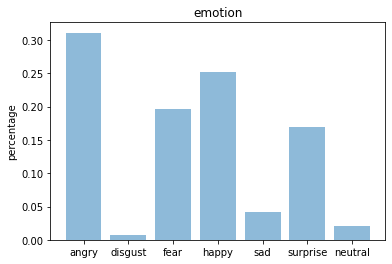

None


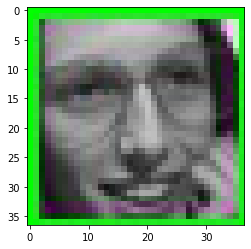

377
Image doesn't exist
378
Image doesn't exist
379


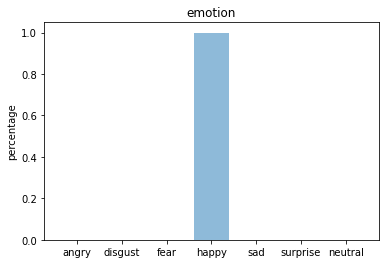

[[9.3106446e-06 5.9821934e-09 1.7586721e-06 9.9959213e-01 3.8709040e-04
  1.7311753e-06 8.0394539e-06]]
0.9995921


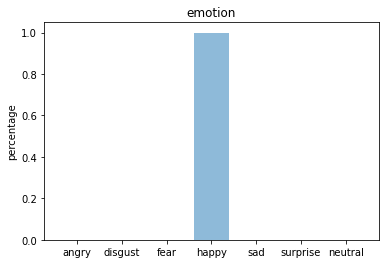

None


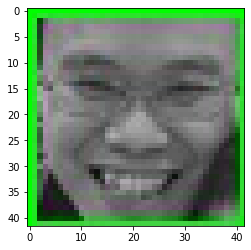

380
Image doesn't exist
381
Image doesn't exist
382
Image doesn't exist
383
Image doesn't exist
384


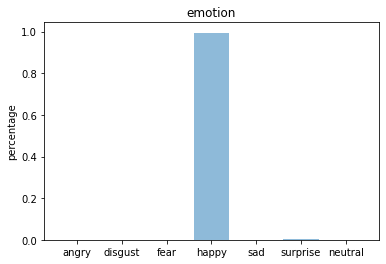

[[6.2955289e-05 8.4207895e-05 4.8068314e-04 9.9448520e-01 6.3584402e-04
  4.2400477e-03 1.1098934e-05]]
0.9944852


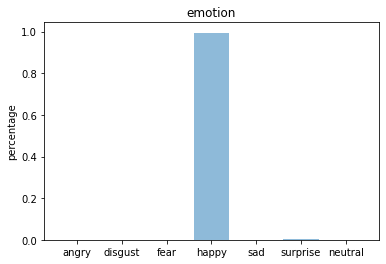

None


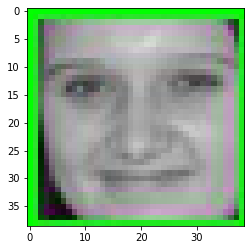

385
Image doesn't exist
386
Image doesn't exist
387


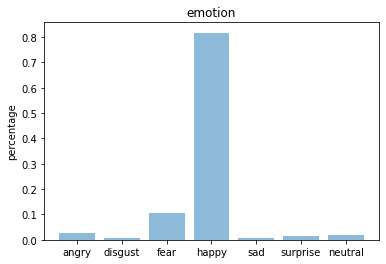

[[0.02774727 0.00634965 0.10754892 0.8169388  0.00692473 0.01563916
  0.01885146]]
0.8169388


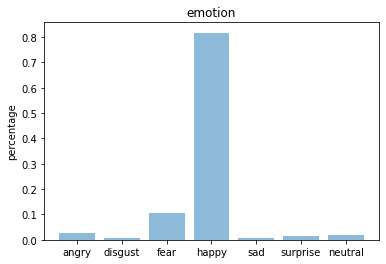

None


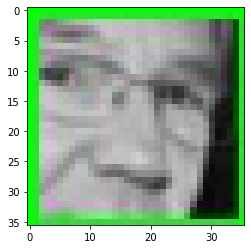

388


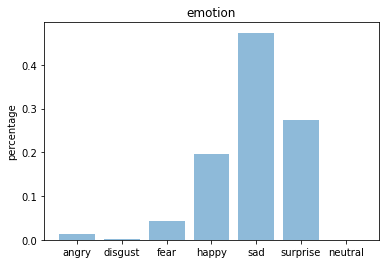

[[1.4360881e-02 7.0118613e-04 4.2108264e-02 1.9610941e-01 4.7370869e-01
  2.7300897e-01 2.4998510e-06]]
0.4737087


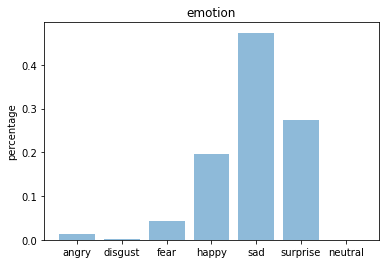

None


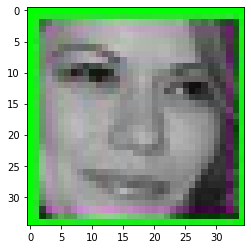

389


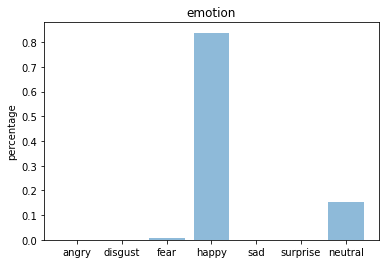

[[4.3595702e-07 2.7983026e-11 7.7155316e-03 8.3837616e-01 8.4628047e-09
  7.2895237e-09 1.5390794e-01]]
0.83837616


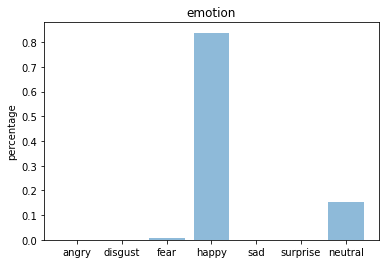

None


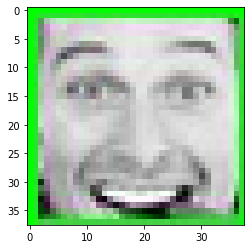

390


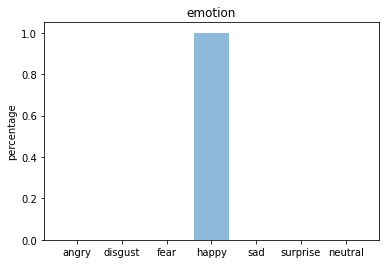

[[5.4587605e-07 6.6330856e-12 1.2709439e-06 9.9974793e-01 2.4707257e-04
  3.7992223e-08 3.0489757e-06]]
0.99974793


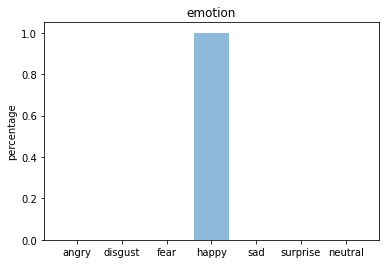

None


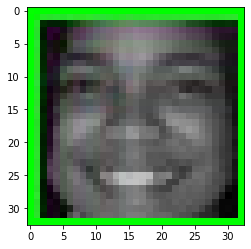

391


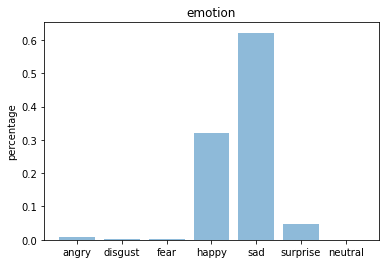

[[7.0339441e-03 1.0818577e-03 2.4151588e-03 3.1969225e-01 6.2177610e-01
  4.7991745e-02 8.9784699e-06]]
0.6217761


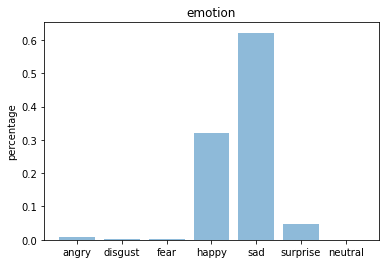

None


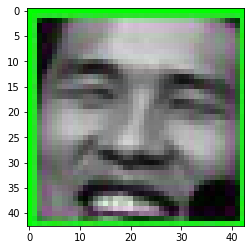

392


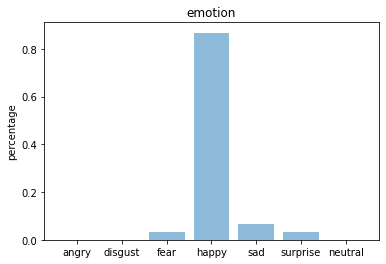

[[2.9314889e-04 3.6221481e-05 3.3072107e-02 8.6772740e-01 6.5205216e-02
  3.3622734e-02 4.3198324e-05]]
0.8677274


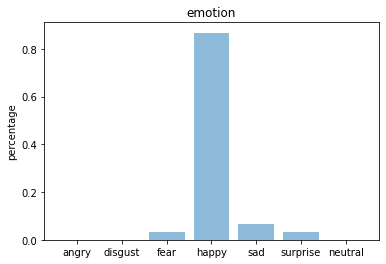

None


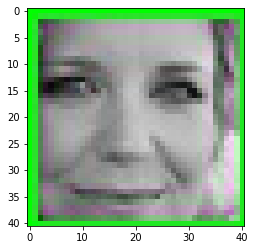

393
Image doesn't exist
394
Image doesn't exist
395
Image doesn't exist
396


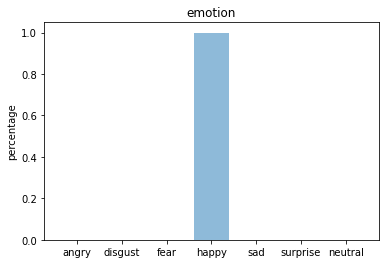

[[3.1820477e-05 1.0433661e-06 1.2363470e-05 9.9919504e-01 6.5846572e-04
  1.0100249e-04 1.9518234e-07]]
0.99919504


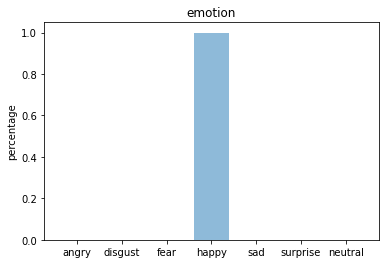

None


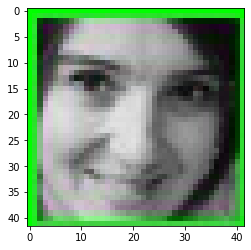

397
Image doesn't exist
398
Image doesn't exist
399
Image doesn't exist
400


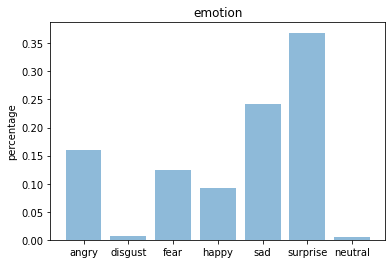

[[0.16019955 0.00676202 0.12373815 0.09285644 0.24172977 0.36888465
  0.00582943]]
0.36888465


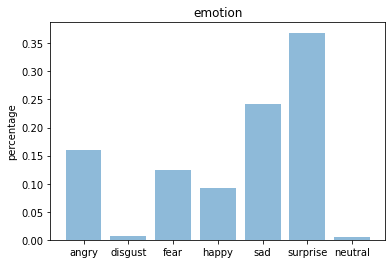

None


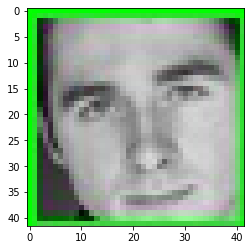

401
Image doesn't exist
402


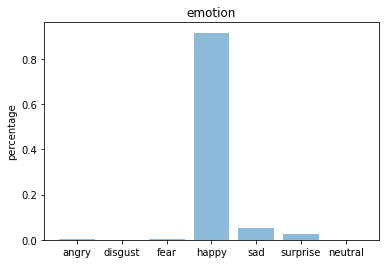

[[3.6100703e-03 1.1737927e-05 1.8408154e-03 9.1658598e-01 5.4187674e-02
  2.3749538e-02 1.4185715e-05]]
0.916586


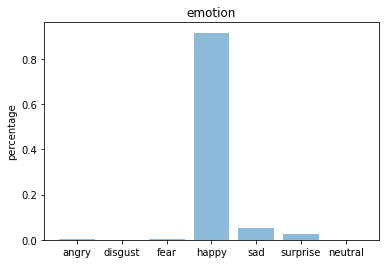

None


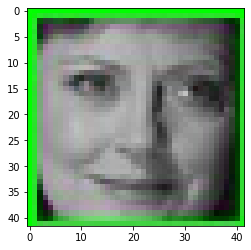

403


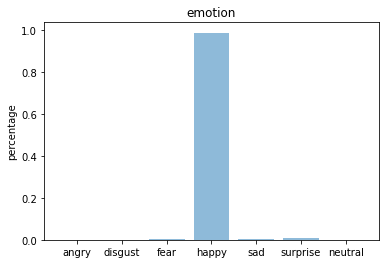

[[1.4638348e-04 3.2612321e-04 2.4162161e-03 9.8768359e-01 2.7926432e-03
  6.4550233e-03 1.8009014e-04]]
0.9876836


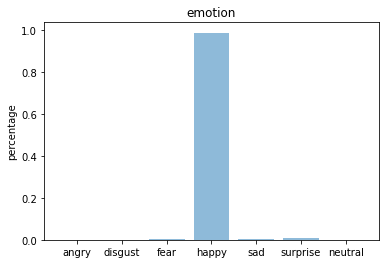

None


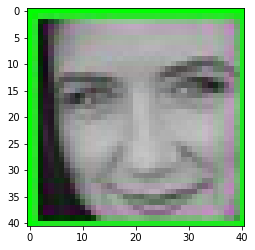

404


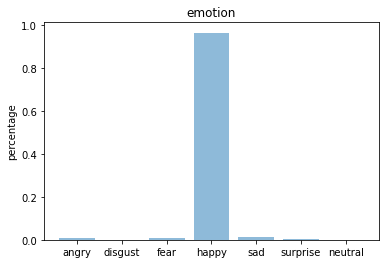

[[7.70168751e-03 1.07249856e-04 7.38384249e-03 9.65950966e-01
  1.37789585e-02 4.08599433e-03 9.91208595e-04]]
0.96595097


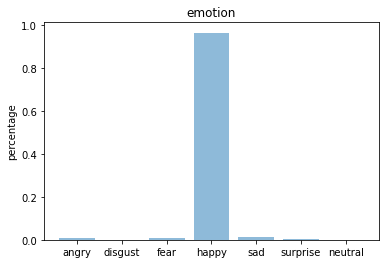

None


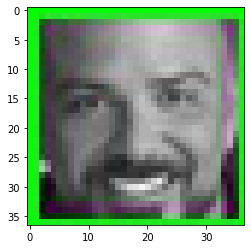

405
Image doesn't exist
406
Image doesn't exist
407


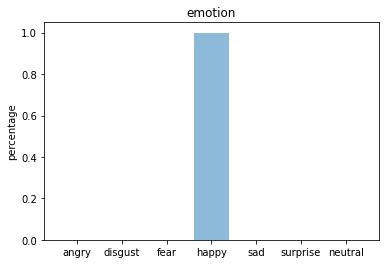

[[1.34553275e-05 1.20094387e-06 1.41930150e-06 9.99688864e-01
  1.33788371e-05 2.44758075e-06 2.79204658e-04]]
0.99968886


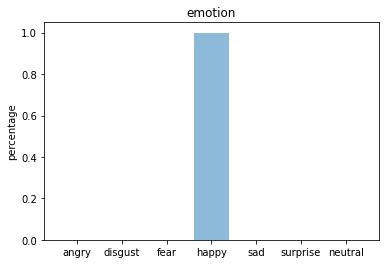

None


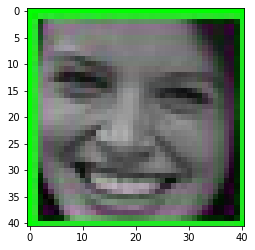

408
Image doesn't exist
409
Image doesn't exist
410


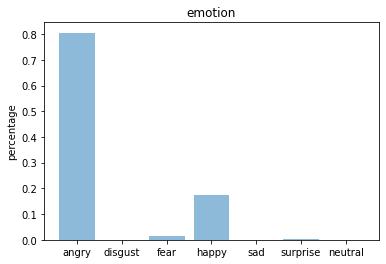

[[8.0533636e-01 7.8747631e-05 1.4209975e-02 1.7541736e-01 2.1074561e-04
  4.7072074e-03 3.9642364e-05]]
0.80533636


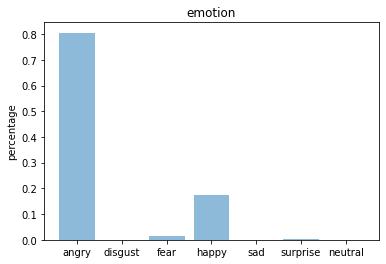

None


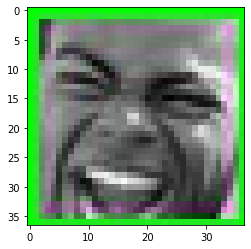

411
Image doesn't exist
412
Image doesn't exist
413
Image doesn't exist
414
Image doesn't exist
415
Image doesn't exist
416


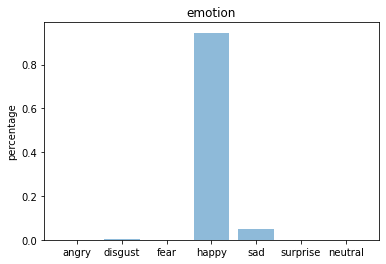

[[6.9129927e-04 2.4706554e-03 9.2445390e-04 9.4550306e-01 4.9385067e-02
  1.0072561e-03 1.8192581e-05]]
0.94550306


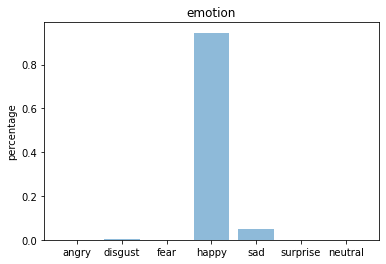

None


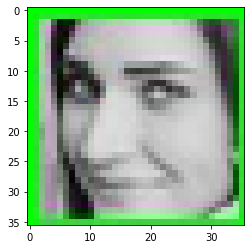

417


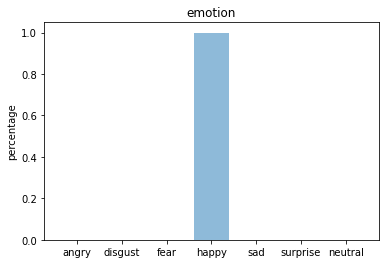

[[1.31160744e-08 5.83160343e-12 1.23798566e-06 9.99609172e-01
  3.13449331e-04 5.55099788e-08 7.61785705e-05]]
0.9996092


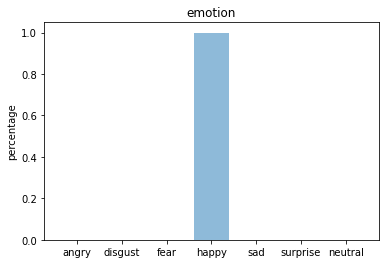

None


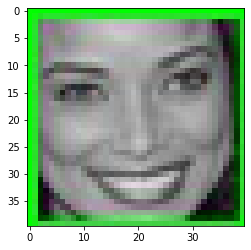

418
Image doesn't exist
419
Image doesn't exist
420
Image doesn't exist
421
Image doesn't exist
422


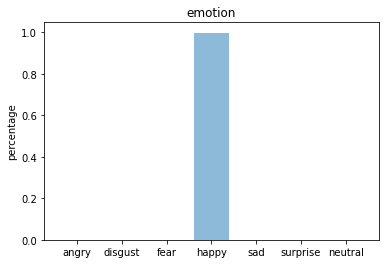

[[1.4174661e-04 7.3167089e-06 5.0309242e-04 9.9864656e-01 1.4229787e-04
  1.1984773e-06 5.5777153e-04]]
0.99864656


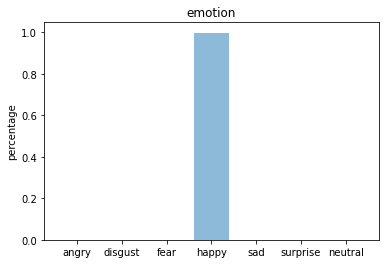

None


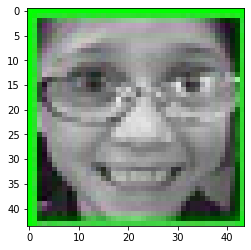

423
Image doesn't exist
424
Image doesn't exist
425


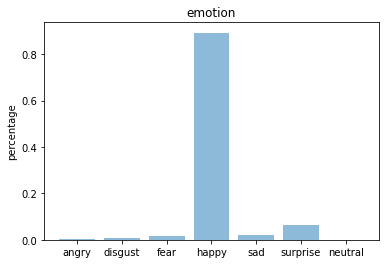

[[2.8558215e-03 5.6855050e-03 1.4528196e-02 8.9198774e-01 2.1637935e-02
  6.2431820e-02 8.7293837e-04]]
0.89198774


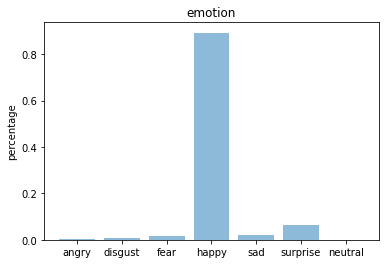

None


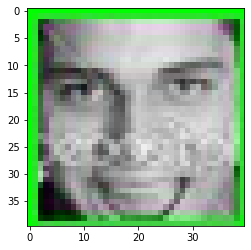

426


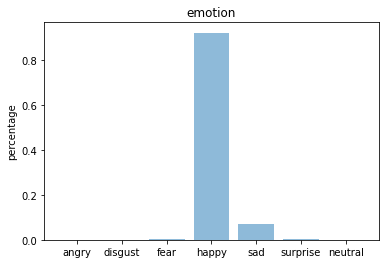

[[1.3387378e-06 3.5805179e-09 4.7276663e-03 9.2290986e-01 7.0148565e-02
  2.2122832e-03 3.2349047e-07]]
0.92290986


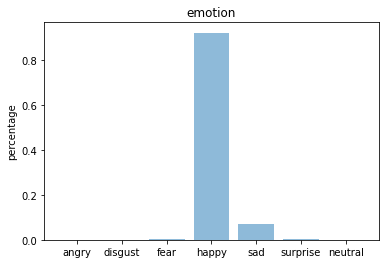

None


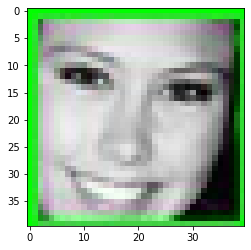

427


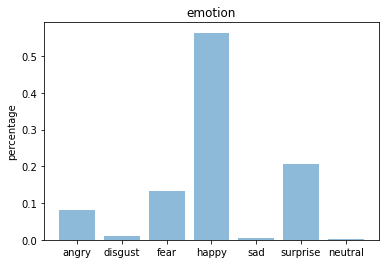

[[0.08066721 0.00972491 0.13219206 0.5633309  0.0060629  0.20563224
  0.00238978]]
0.5633309


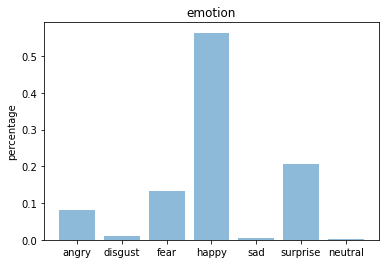

None


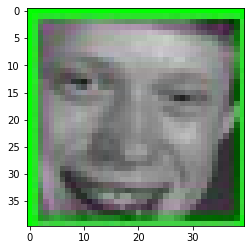

428
Image doesn't exist
429
Image doesn't exist
430
Image doesn't exist
431
Image doesn't exist
432


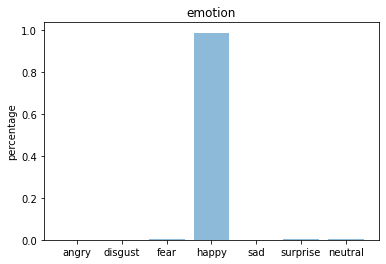

[[8.4847864e-04 6.4715120e-04 3.4637442e-03 9.8655164e-01 3.5896260e-04
  2.6427901e-03 5.4872721e-03]]
0.98655164


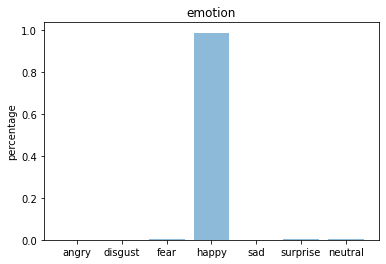

None


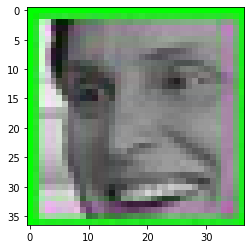

433
Image doesn't exist
434
Image doesn't exist
435
Image doesn't exist
436


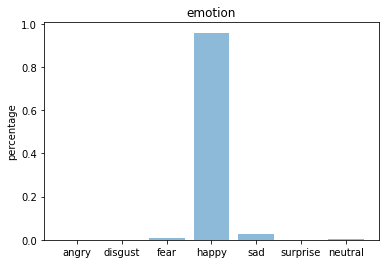

[[8.2121805e-05 5.2872559e-07 8.5687842e-03 9.5833486e-01 2.9017866e-02
  6.5943255e-04 3.3365206e-03]]
0.95833486


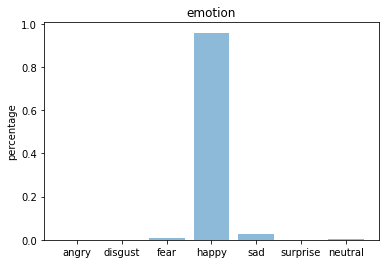

None


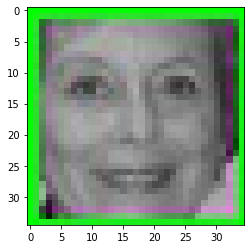

437
Image doesn't exist
438


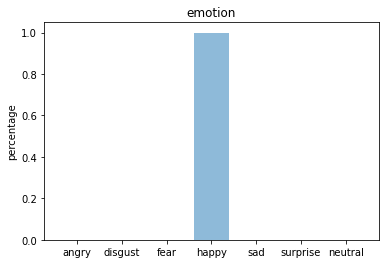

[[1.12763926e-04 1.79811266e-07 8.74192992e-05 9.99308586e-01
  1.59693911e-04 4.87626130e-06 3.26485286e-04]]
0.9993086


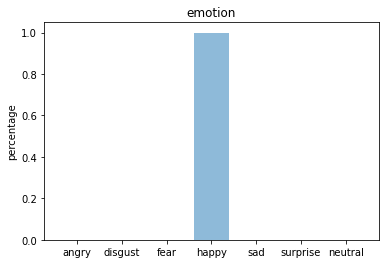

None


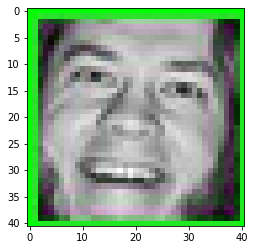

439
Image doesn't exist
440


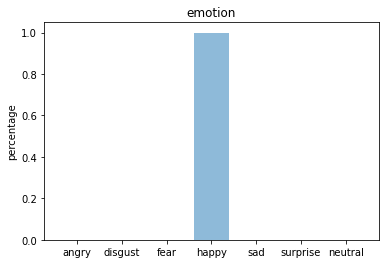

[[2.8887468e-06 1.0757318e-08 9.9855367e-07 9.9929023e-01 7.0472207e-04
  1.2222873e-06 1.4659378e-08]]
0.9992902


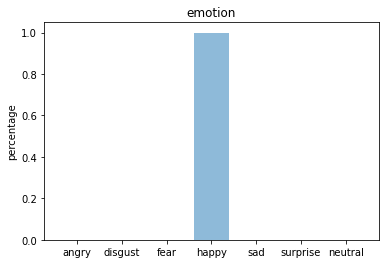

None


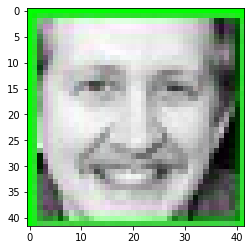

441
Image doesn't exist
442


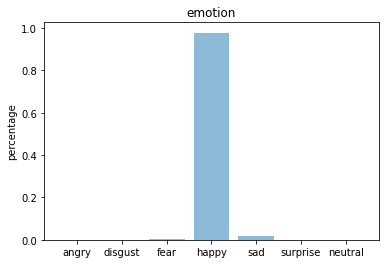

[[8.6677392e-06 1.5183221e-09 3.8643058e-03 9.7834754e-01 1.7217388e-02
  2.6229816e-04 2.9982772e-04]]
0.97834754


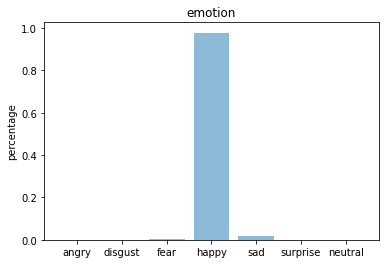

None


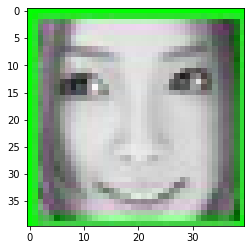

443
Image doesn't exist
444
Image doesn't exist
445


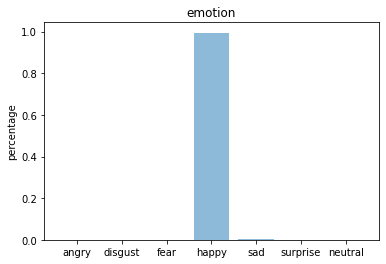

[[1.0925580e-03 9.5553551e-05 1.3242312e-03 9.9452037e-01 2.5994889e-03
  3.5215972e-04 1.5597276e-05]]
0.99452037


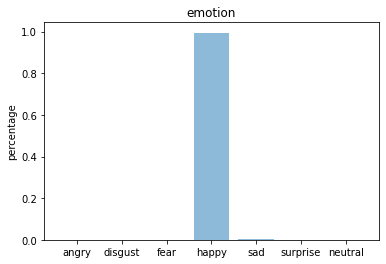

None


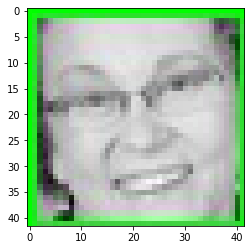

446


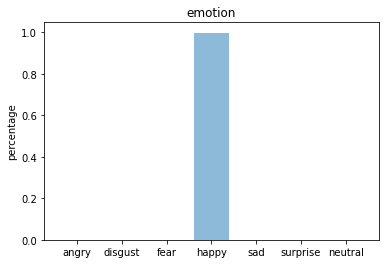

[[1.1382225e-05 1.1717739e-03 5.9421384e-04 9.9740797e-01 3.0249340e-04
  2.5313126e-04 2.5901577e-04]]
0.997408


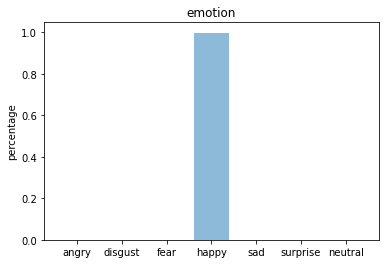

None


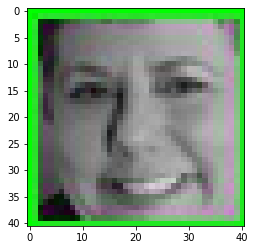

447
Image doesn't exist
448


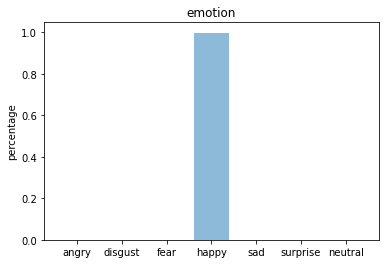

[[4.1730855e-05 2.3113807e-05 1.3007761e-04 9.9768126e-01 1.2026479e-03
  9.0024871e-04 2.0884174e-05]]
0.99768126


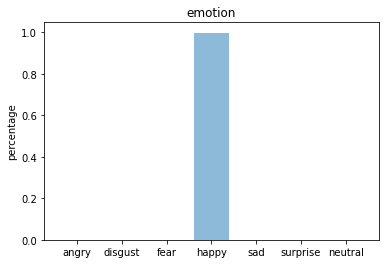

None


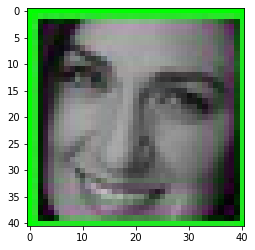

449
Image doesn't exist
450


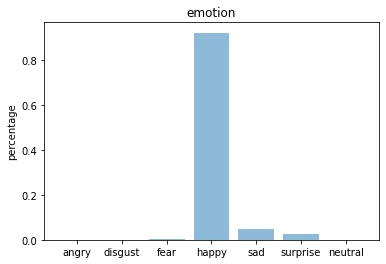

[[2.7771495e-04 2.8900183e-06 2.3779231e-03 9.2126417e-01 4.9196836e-02
  2.6592392e-02 2.8808470e-04]]
0.9212642


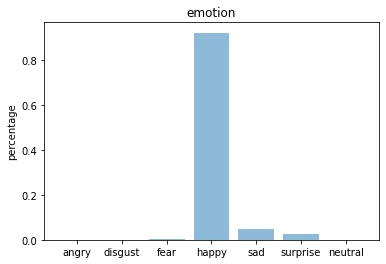

None


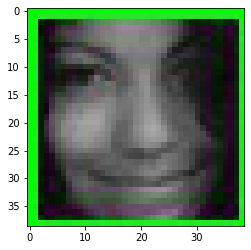

451
Image doesn't exist
452
Image doesn't exist
453


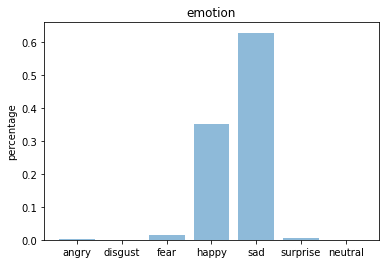

[[2.0273479e-03 8.4895568e-05 1.3341228e-02 3.5072660e-01 6.2763894e-01
  6.0554845e-03 1.2542850e-04]]
0.62763894


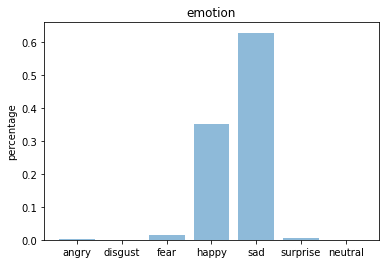

None


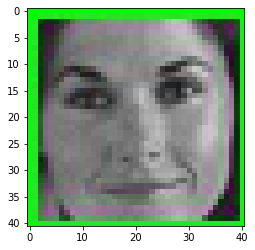

454


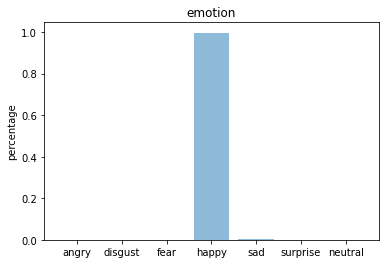

[[7.47341546e-05 1.00460302e-05 8.01711576e-05 9.96824741e-01
  2.98763346e-03 2.25580443e-05 1.07309056e-07]]
0.99682474


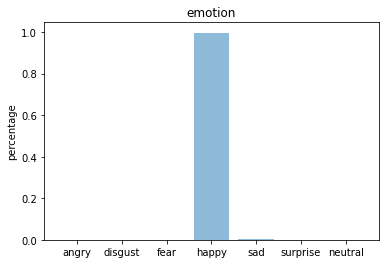

None


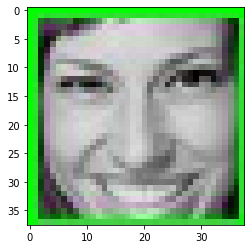

455
Image doesn't exist
456


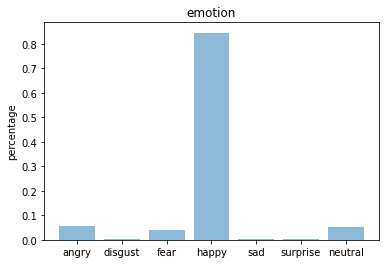

[[0.05579422 0.00433315 0.04006889 0.8454601  0.00122862 0.00244148
  0.0506736 ]]
0.8454601


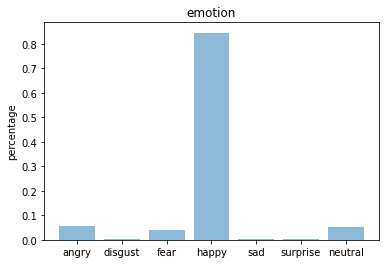

None


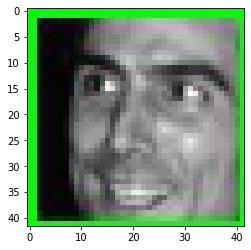

457


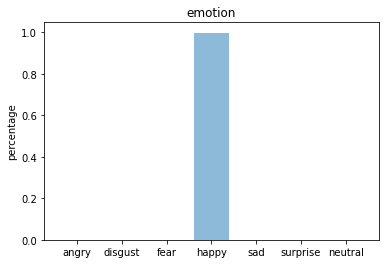

[[2.23055031e-04 4.62154334e-04 1.18792275e-04 9.98656631e-01
  3.75344280e-05 2.85065966e-04 2.16747256e-04]]
0.99865663


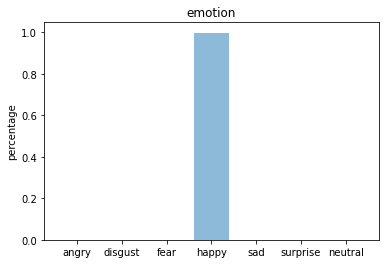

None


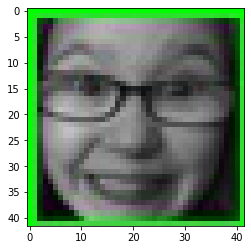

458
Image doesn't exist
459


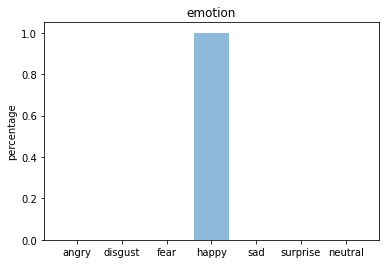

[[1.5026485e-06 3.9843439e-08 2.8533730e-06 9.9980837e-01 1.8252707e-04
  6.0124944e-07 4.0714340e-06]]
0.9998084


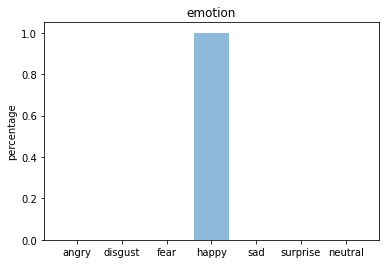

None


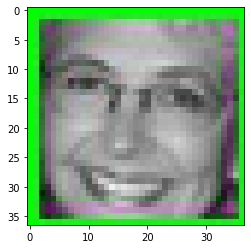

460
Image doesn't exist
461
Image doesn't exist
462
Image doesn't exist
463


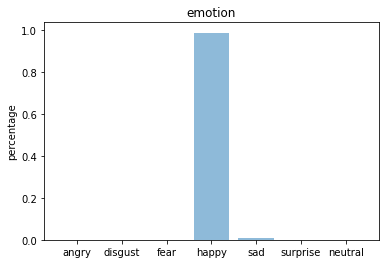

[[7.9167609e-07 8.4009645e-07 3.5360659e-05 9.8827028e-01 1.0872746e-02
  1.2425705e-05 8.0759521e-04]]
0.9882703


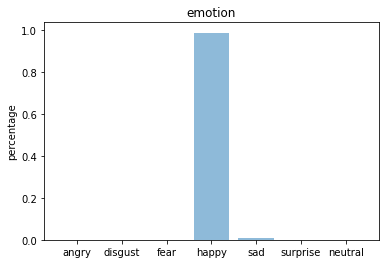

None


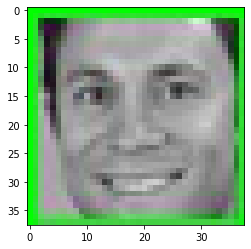

464
Image doesn't exist
465


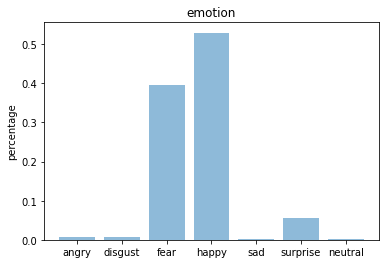

[[0.00768613 0.00755546 0.3965019  0.52921313 0.0015921  0.0565576
  0.00089365]]
0.52921313


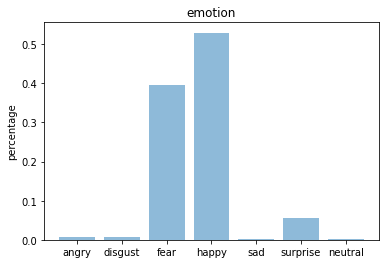

None


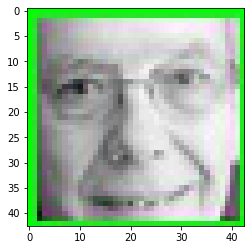

466
Image doesn't exist
467


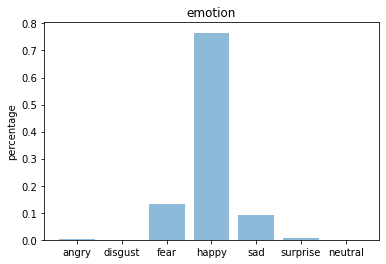

[[3.1336676e-03 3.3009652e-04 1.3309249e-01 7.6563150e-01 9.2215993e-02
  5.3159953e-03 2.8020566e-04]]
0.7656315


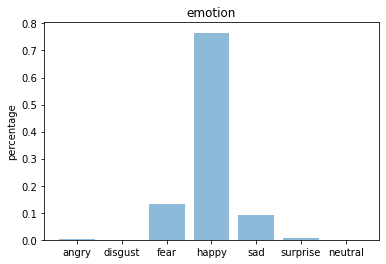

None


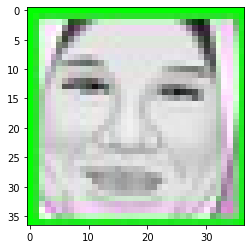

468
Image doesn't exist
469


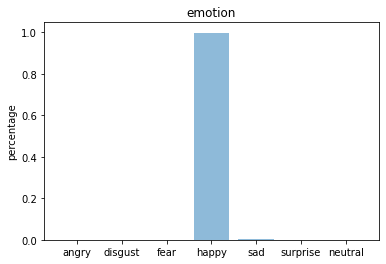

[[1.9815648e-06 1.5168754e-07 5.3890308e-06 9.9764484e-01 2.3286424e-03
  1.8586121e-05 4.0318983e-07]]
0.99764484


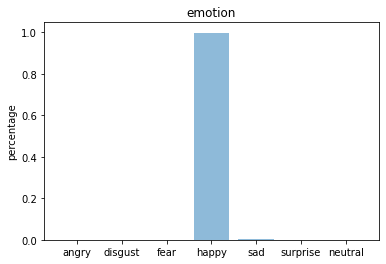

None


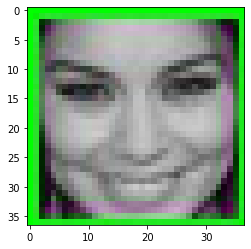

470
Image doesn't exist
471
Image doesn't exist
472
Image doesn't exist
473
Image doesn't exist
474
Image doesn't exist
475
Image doesn't exist
476


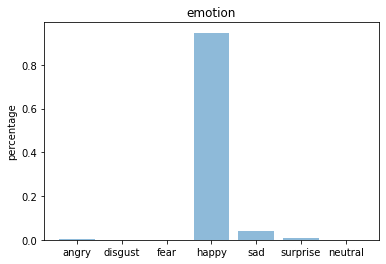

[[2.2580677e-03 3.7357843e-06 3.8931757e-04 9.4744039e-01 4.2491097e-02
  7.1198917e-03 2.9749697e-04]]
0.9474404


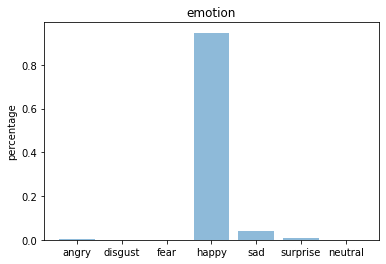

None


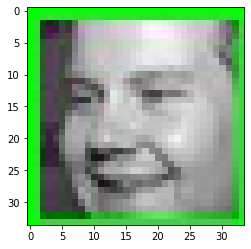

477


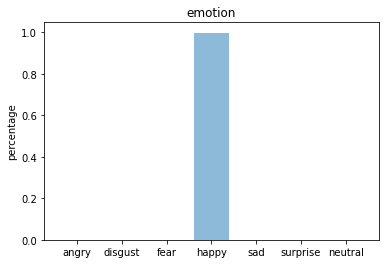

[[5.4361949e-06 1.1592044e-06 2.5324596e-04 9.9851674e-01 1.0850037e-03
  6.5210115e-05 7.3152594e-05]]
0.99851674


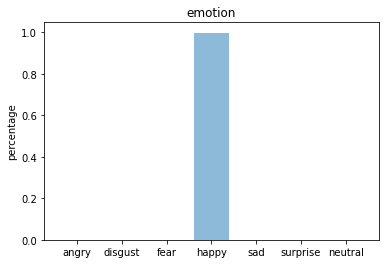

None


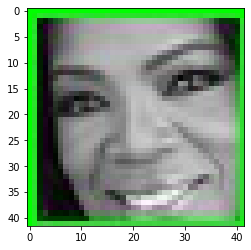

478
Image doesn't exist
479
Image doesn't exist
480
Image doesn't exist
481


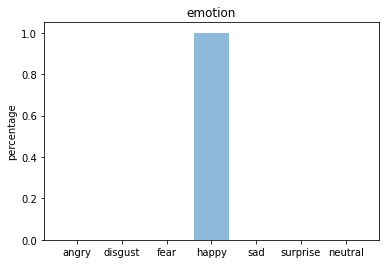

[[3.5389828e-08 5.9563491e-12 8.0076228e-05 9.9983203e-01 8.2471866e-05
  4.9466130e-06 4.6064801e-07]]
0.99983203


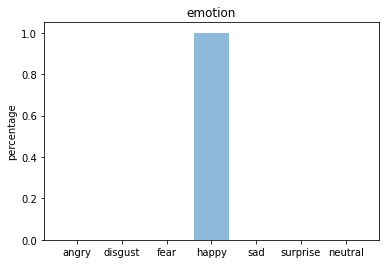

None


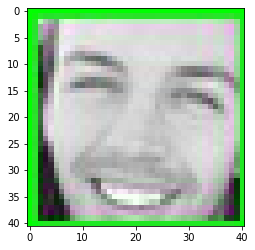

482
Image doesn't exist
483
Image doesn't exist
484


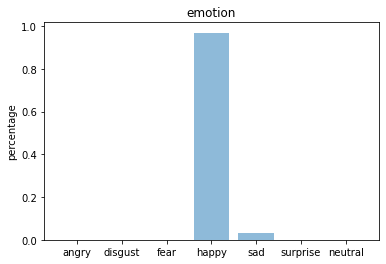

[[3.7622553e-07 1.3385808e-10 8.6600894e-06 9.6921521e-01 3.0646112e-02
  4.2025627e-07 1.2926670e-04]]
0.9692152


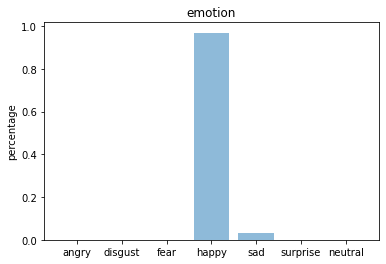

None


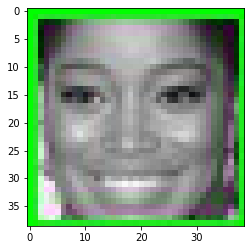

485
Image doesn't exist
486


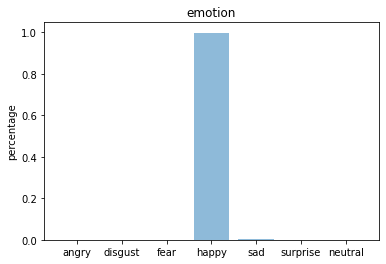

[[5.5320083e-06 7.5536292e-07 8.3491568e-06 9.9732745e-01 2.6472022e-03
  2.0440907e-06 8.7317949e-06]]
0.99732745


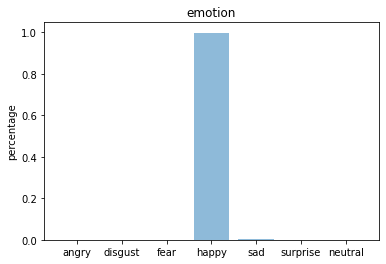

None


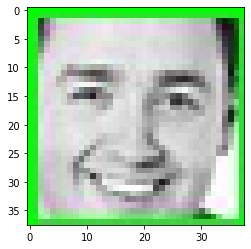

487


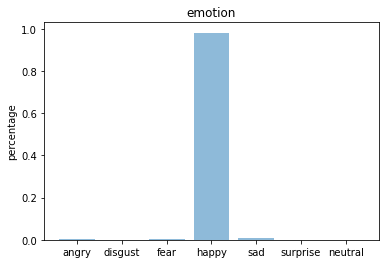

[[1.5795899e-03 6.3521810e-07 5.6889374e-03 9.8126364e-01 1.0383599e-02
  8.8810344e-04 1.9559771e-04]]
0.98126364


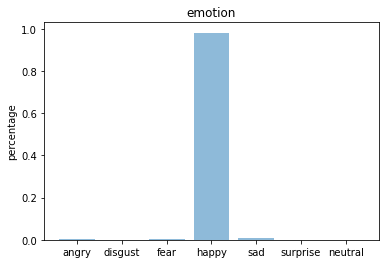

None


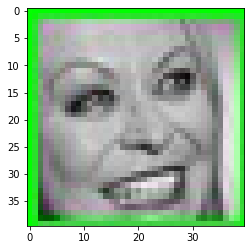

488


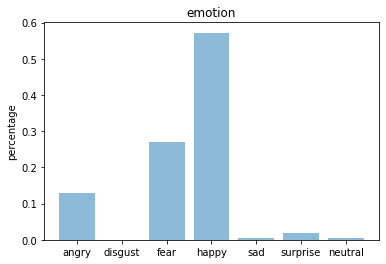

[[1.2933606e-01 4.3134809e-05 2.7055162e-01 5.7192922e-01 4.0785992e-03
  1.8947985e-02 5.1134364e-03]]
0.5719292


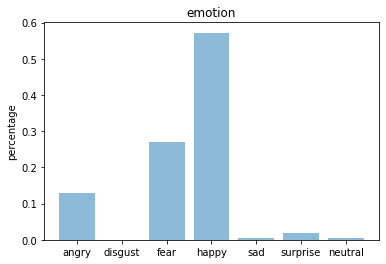

None


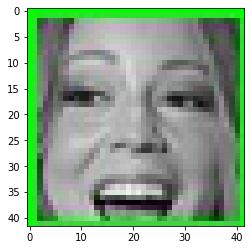

489
Image doesn't exist
490
Image doesn't exist
491


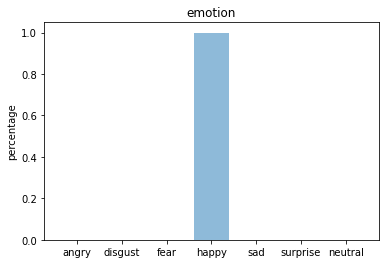

[[4.4093951e-09 1.8884698e-12 1.1741299e-06 9.9937111e-01 6.2490988e-04
  9.3090726e-08 2.6824914e-06]]
0.9993711


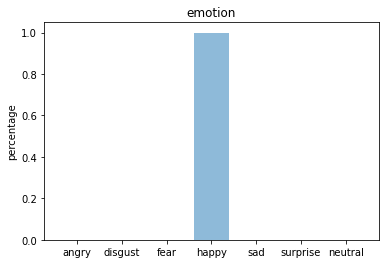

None


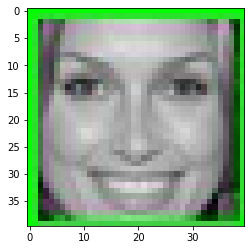

492
Image doesn't exist
493
Image doesn't exist
494
Image doesn't exist
495


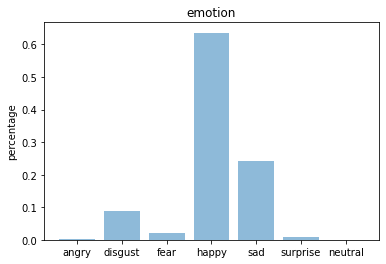

[[0.00258571 0.08896083 0.02050737 0.63618547 0.24122892 0.00984639
  0.00068529]]
0.63618547


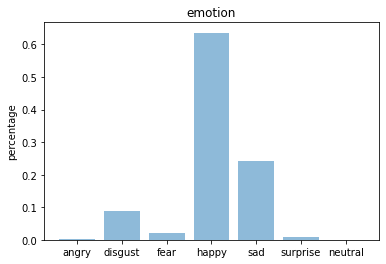

None


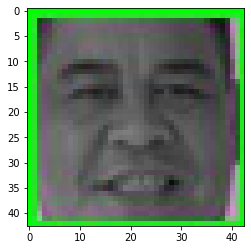

496


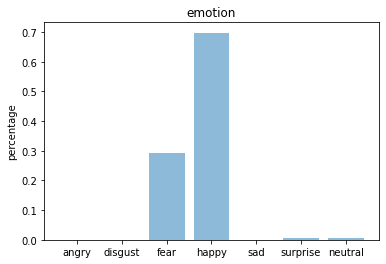

[[2.5007632e-04 9.8111855e-08 2.9235566e-01 6.9753468e-01 3.8890330e-06
  4.7871638e-03 5.0684768e-03]]
0.6975347


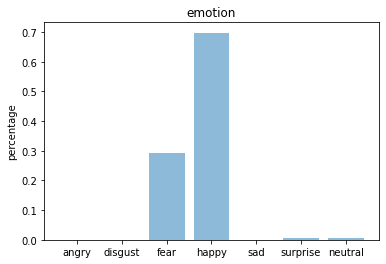

None


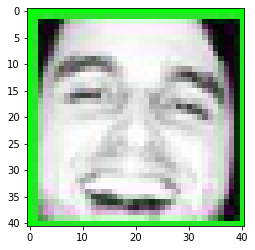

497


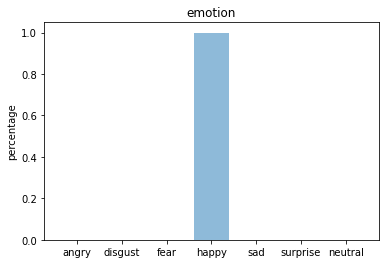

[[5.4896418e-07 5.7331198e-09 1.7184671e-05 9.9905342e-01 4.4851284e-04
  4.7152126e-04 8.8055604e-06]]
0.9990534


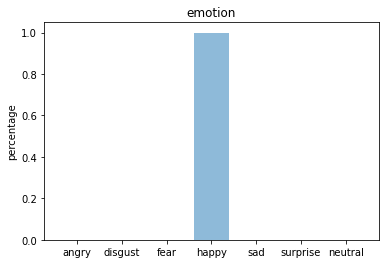

None


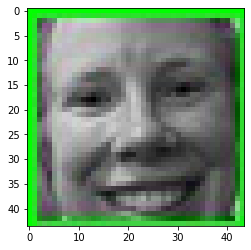

498
Image doesn't exist
499


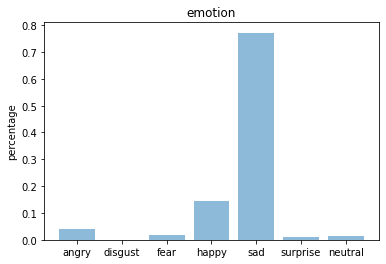

[[4.1814785e-02 1.9355834e-06 1.8495401e-02 1.4323699e-01 7.7190411e-01
  9.3569346e-03 1.5189793e-02]]
0.7719041


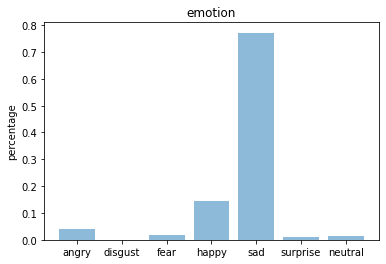

None


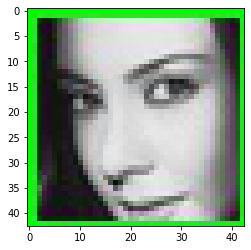

500


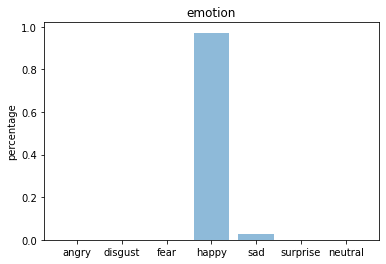

[[2.65495153e-04 4.47318826e-06 1.03371836e-04 9.71918821e-01
  2.71018595e-02 5.64760470e-04 4.12091576e-05]]
0.9719188


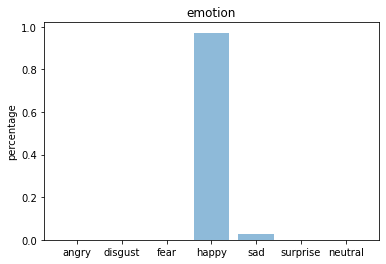

None


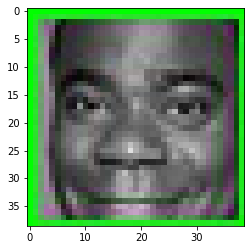

501
Image doesn't exist
502
Image doesn't exist
503


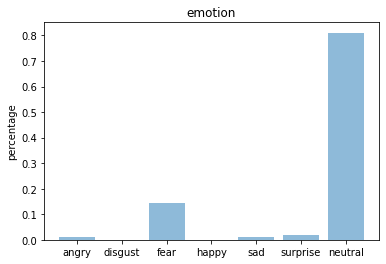

[[1.2732658e-02 3.3865788e-04 1.4591652e-01 6.8336382e-04 1.2600650e-02
  1.6846806e-02 8.1088144e-01]]
0.81088144


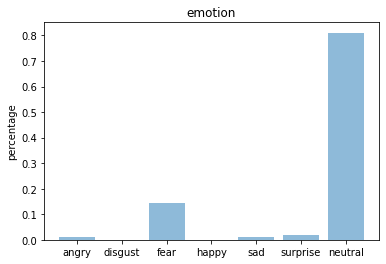

None


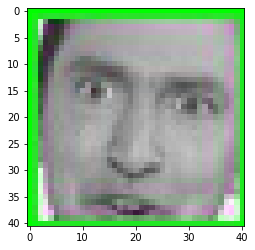

504


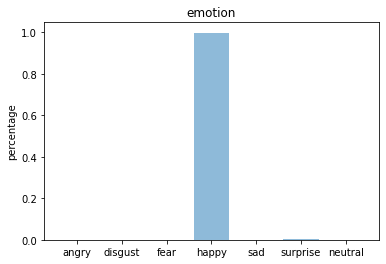

[[1.23425289e-05 2.22997915e-06 3.52612667e-04 9.97578800e-01
  1.16327064e-04 1.93108409e-03 6.58076124e-06]]
0.9975788


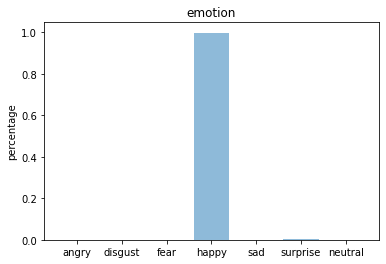

None


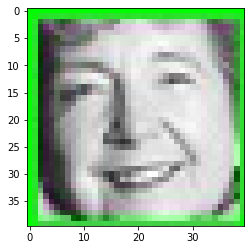

505
Image doesn't exist
506
Image doesn't exist
507
Image doesn't exist
508


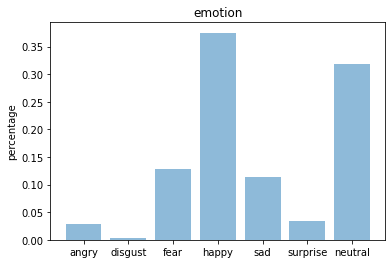

[[0.02803512 0.00262647 0.12742539 0.37521023 0.1134965  0.03446191
  0.31874436]]
0.37521023


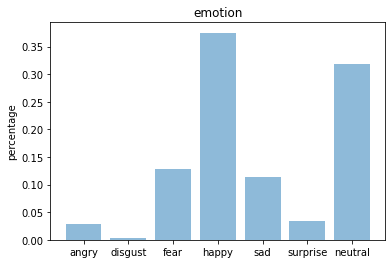

None


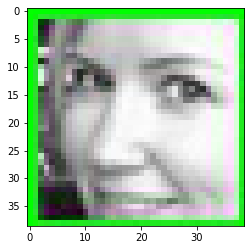

509
Image doesn't exist
510


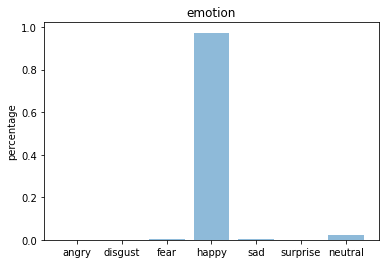

[[6.2491226e-06 4.1225905e-04 1.5749439e-03 9.7364300e-01 1.8115706e-03
  6.5390824e-04 2.1898130e-02]]
0.973643


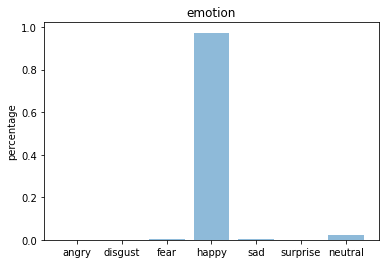

None


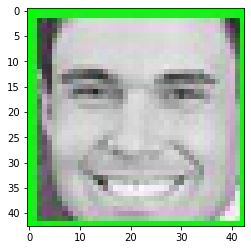

511


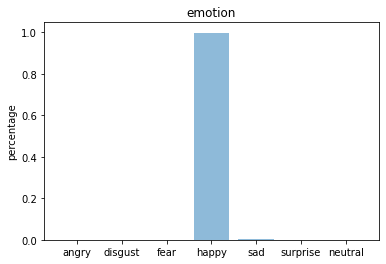

[[1.5915970e-07 2.6148714e-09 2.6405231e-05 9.9765646e-01 2.2969502e-03
  1.2308789e-05 7.6887363e-06]]
0.99765646


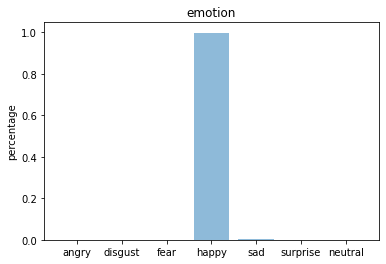

None


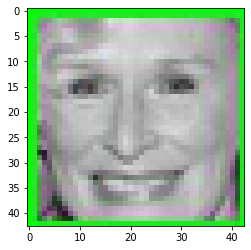

512


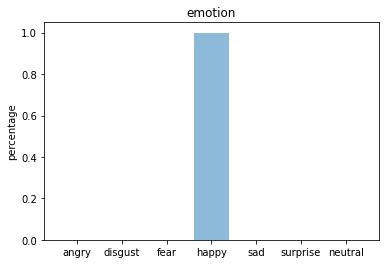

[[2.8616561e-05 2.3587127e-06 1.7937527e-05 9.9971300e-01 2.2065146e-04
  1.7358412e-05 1.1360383e-08]]
0.999713


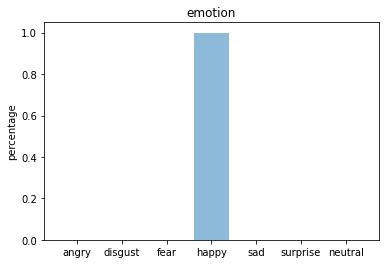

None


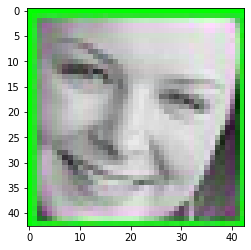

513


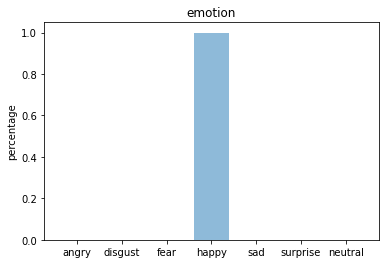

[[3.3261163e-08 5.2248386e-11 7.8942203e-06 9.9947804e-01 1.8000548e-05
  1.6514978e-06 4.9441634e-04]]
0.99947804


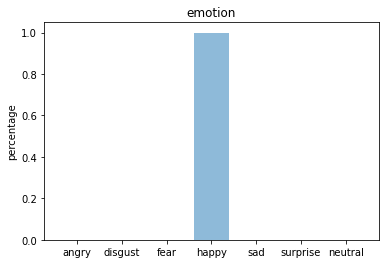

None


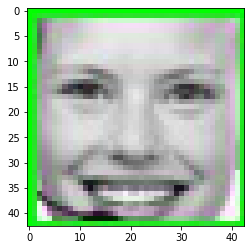

514
Image doesn't exist
515


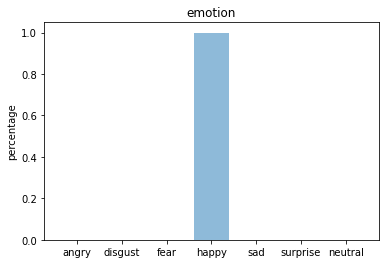

[[3.3241136e-07 2.6043607e-09 8.8846946e-06 9.9901664e-01 8.3947473e-04
  7.9122066e-07 1.3374489e-04]]
0.99901664


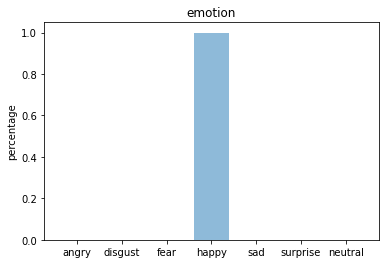

None


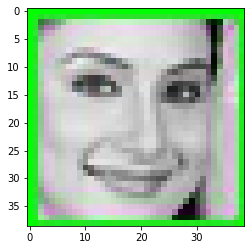

516
Image doesn't exist
517
Image doesn't exist
518


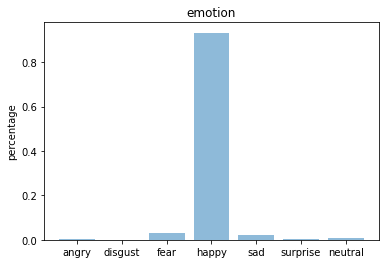

[[3.2778827e-03 7.5891927e-05 3.1107292e-02 9.3272501e-01 2.1405058e-02
  3.2480173e-03 8.1608826e-03]]
0.932725


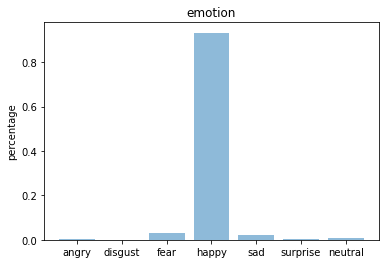

None


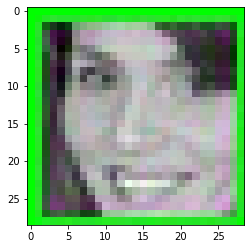

519
Image doesn't exist
520


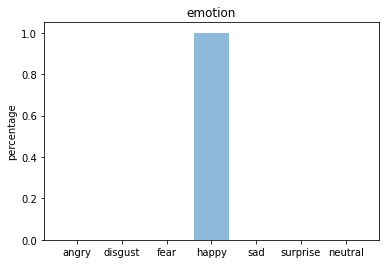

[[1.9000405e-06 1.9617822e-07 6.6341054e-05 9.9986088e-01 1.9173784e-08
  2.5655404e-06 6.7997113e-05]]
0.9998609


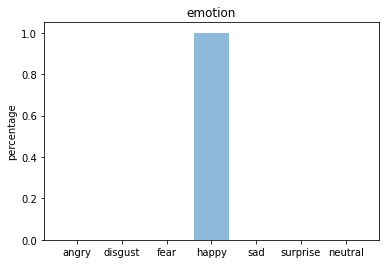

None


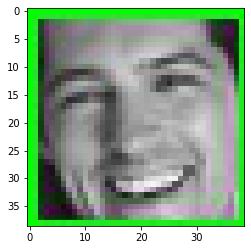

521


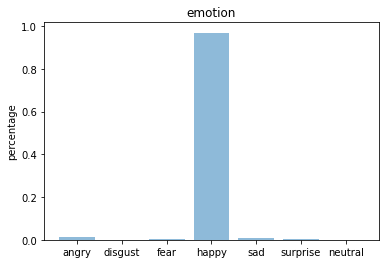

[[1.4758552e-02 8.3088462e-04 3.4807567e-03 9.6949929e-01 6.1955824e-03
  5.2150418e-03 1.9901188e-05]]
0.9694993


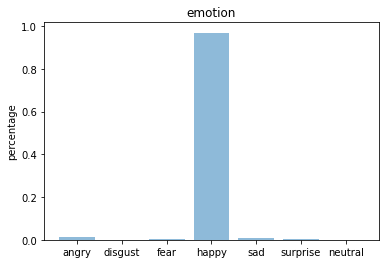

None


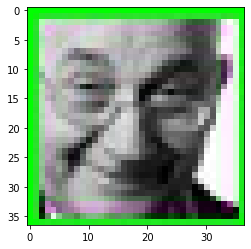

522
Image doesn't exist
523
Image doesn't exist
524


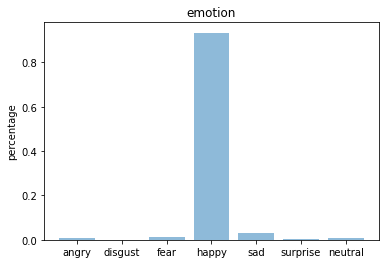

[[9.5523112e-03 3.7033777e-04 1.1970730e-02 9.3342507e-01 2.9719507e-02
  5.4436438e-03 9.5184250e-03]]
0.93342507


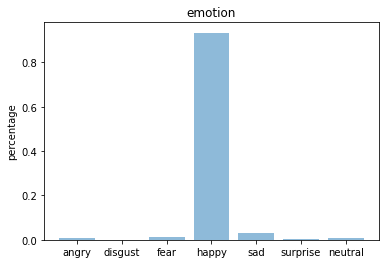

None


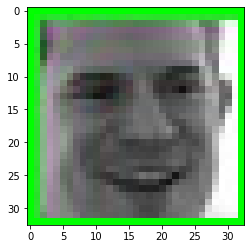

525
Image doesn't exist
526
Image doesn't exist
527


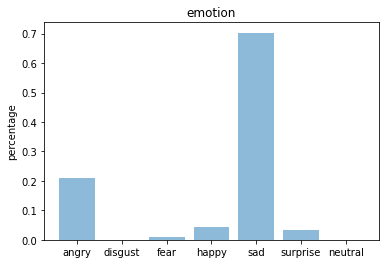

[[2.1103233e-01 3.4358929e-04 9.1786450e-03 4.4702444e-02 7.0311648e-01
  3.1619780e-02 6.7411775e-06]]
0.7031165


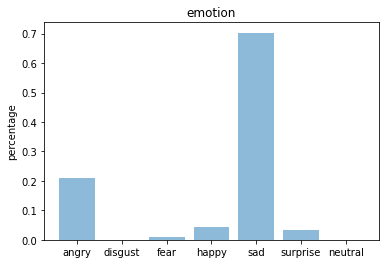

None


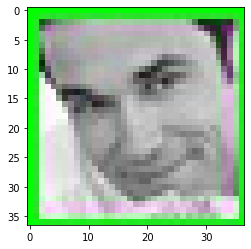

528
Image doesn't exist
529
Image doesn't exist
530


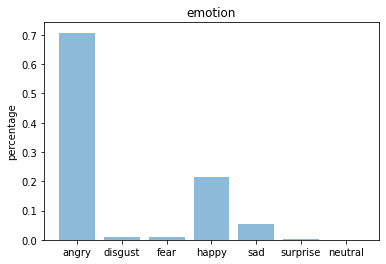

[[0.70757484 0.00789648 0.01020102 0.2159291  0.0541765  0.00340182
  0.0008203 ]]
0.70757484


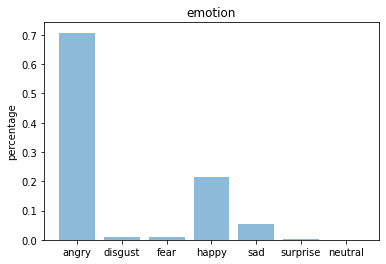

None


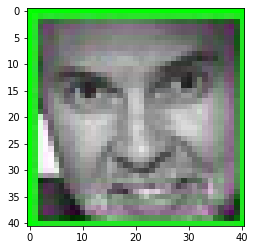

531
Image doesn't exist
532


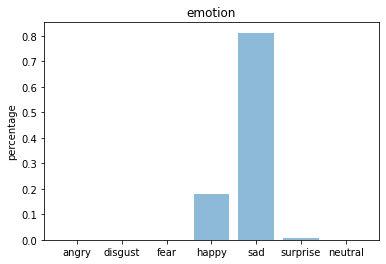

[[8.3613110e-04 5.2698051e-06 4.0221171e-04 1.7897843e-01 8.1233740e-01
  7.4405908e-03 9.4686203e-10]]
0.8123374


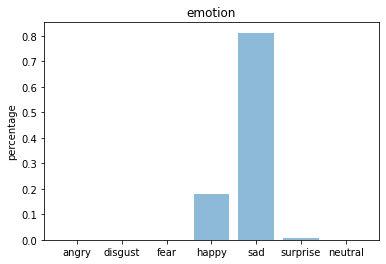

None


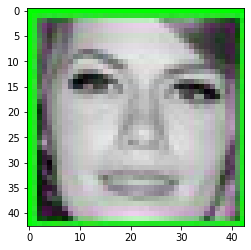

533


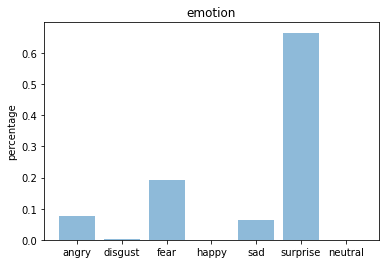

[[7.6194413e-02 1.6859437e-03 1.9205125e-01 2.7262219e-04 6.3726172e-02
  6.6585875e-01 2.1080939e-04]]
0.66585875


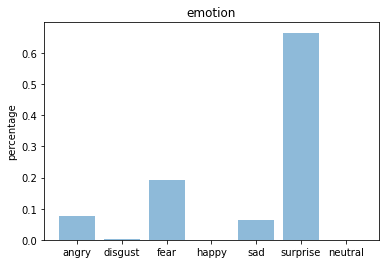

None


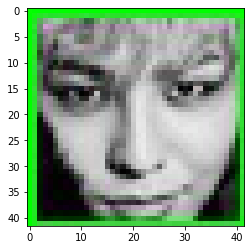

534
Image doesn't exist
535


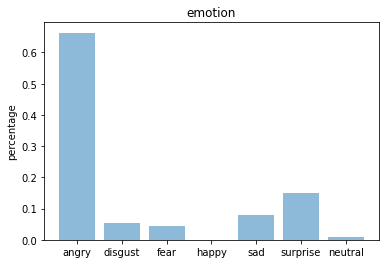

[[6.6324747e-01 5.3274222e-02 4.4799212e-02 5.0677295e-04 7.9395823e-02
  1.5119794e-01 7.5785224e-03]]
0.66324747


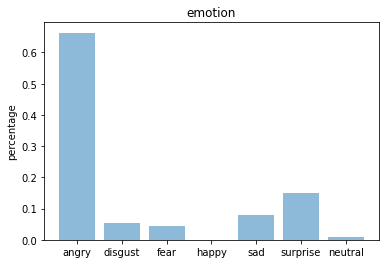

None


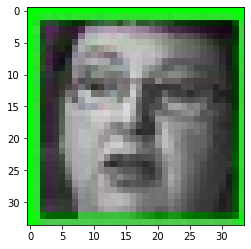

536
Image doesn't exist
537
Image doesn't exist
538
Image doesn't exist
539
Image doesn't exist
540


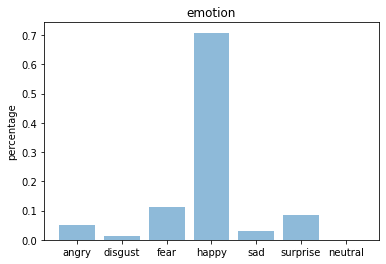

[[5.1507015e-02 1.1661349e-02 1.1264135e-01 7.0819390e-01 3.0754426e-02
  8.5224077e-02 1.7811810e-05]]
0.7081939


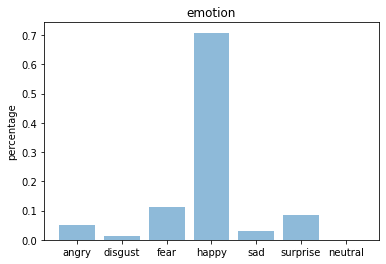

None


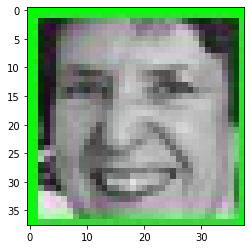

541
Image doesn't exist
542


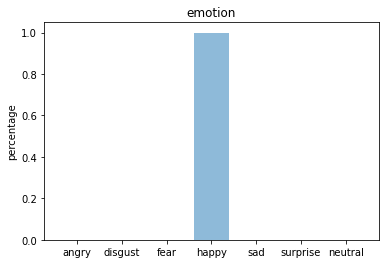

[[7.12111796e-05 3.56112224e-08 1.15018105e-04 9.99362409e-01
  2.37300424e-04 2.84404578e-05 1.85689933e-04]]
0.9993624


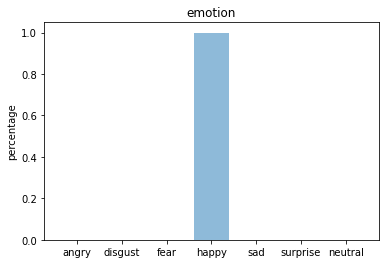

None


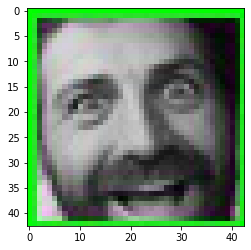

543
Image doesn't exist
544
Image doesn't exist
545


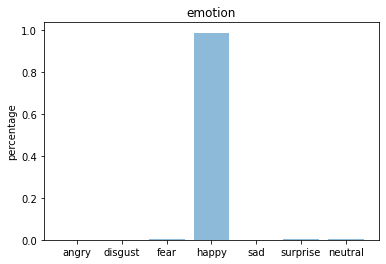

[[4.0728538e-04 1.7723181e-06 2.8799914e-03 9.8927850e-01 8.6815032e-04
  2.9484234e-03 3.6157549e-03]]
0.9892785


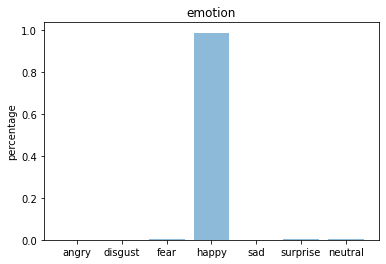

None


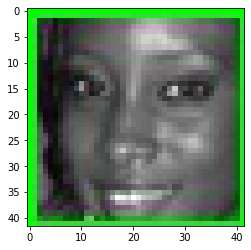

546
Image doesn't exist
547
Image doesn't exist
548
Image doesn't exist
549
Image doesn't exist
550
Image doesn't exist
551


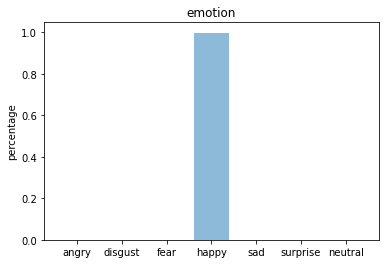

[[7.94378284e-05 2.85379152e-04 1.04354556e-04 9.98251259e-01
  1.07944931e-03 1.57135641e-04 4.29603351e-05]]
0.99825126


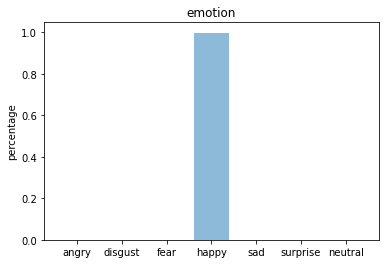

None


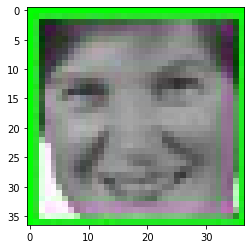

552


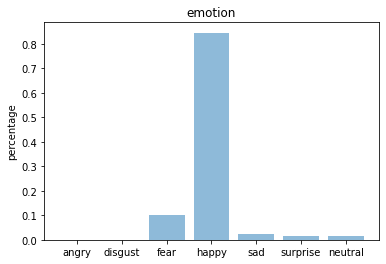

[[1.2015484e-03 4.1623225e-05 1.0043603e-01 8.4556144e-01 2.1969751e-02
  1.5131822e-02 1.5657851e-02]]
0.84556144


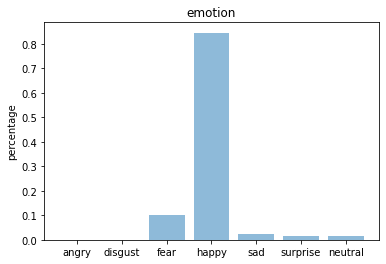

None


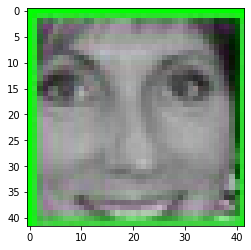

553
Image doesn't exist
554
Image doesn't exist
555
Image doesn't exist
556
Image doesn't exist
557


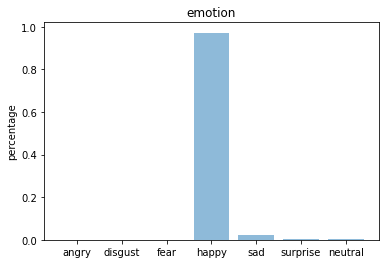

[[2.9887864e-04 1.2699284e-03 9.8563626e-04 9.7185439e-01 2.0573160e-02
  3.0016266e-03 2.0163388e-03]]
0.9718544


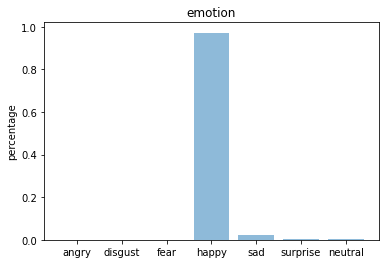

None


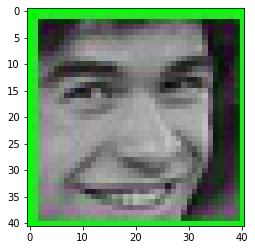

558
Image doesn't exist
559


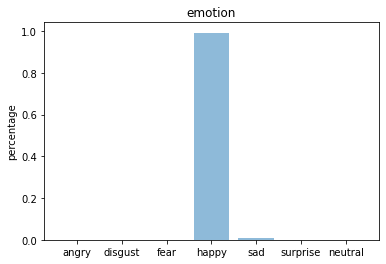

[[7.1191930e-06 1.5861540e-08 5.6159315e-05 9.9248028e-01 7.3126205e-03
  9.0772992e-05 5.3028733e-05]]
0.9924803


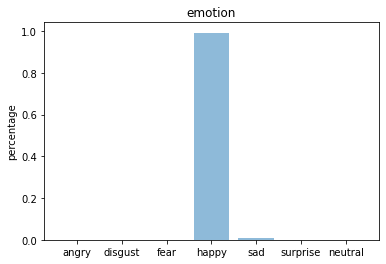

None


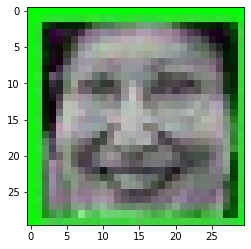

560
Image doesn't exist
561
Image doesn't exist
562


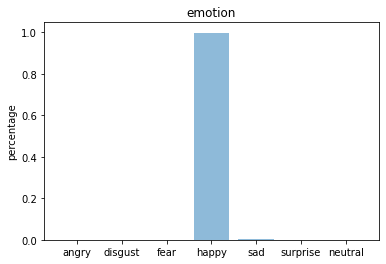

[[1.4649875e-07 8.5805560e-08 1.5769301e-05 9.9816775e-01 1.8133849e-03
  2.6503321e-07 2.4860922e-06]]
0.99816775


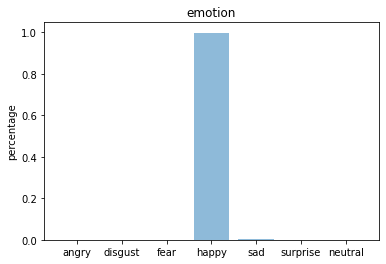

None


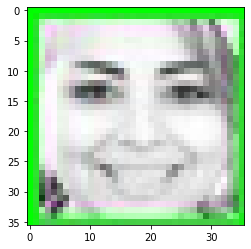

563
Image doesn't exist
564
Image doesn't exist
565
Image doesn't exist
566
Image doesn't exist
567


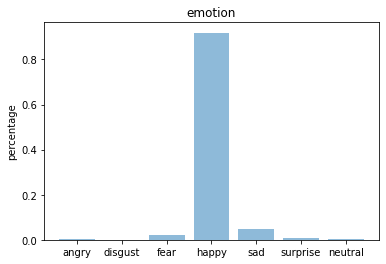

[[4.9527939e-03 2.3899450e-04 1.9503847e-02 9.1874725e-01 4.6788257e-02
  7.0668133e-03 2.7019491e-03]]
0.91874725


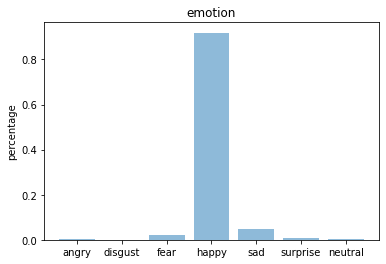

None


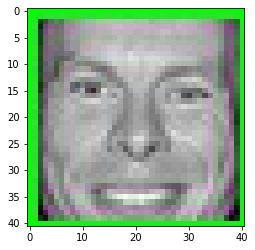

568


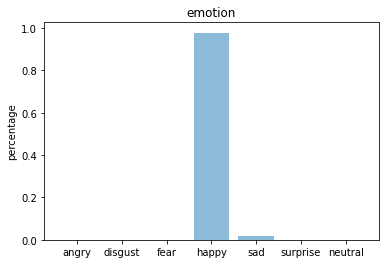

[[3.4129285e-04 1.3149648e-06 8.8715875e-05 9.7763264e-01 2.0089976e-02
  1.3308557e-03 5.1520095e-04]]
0.97763264


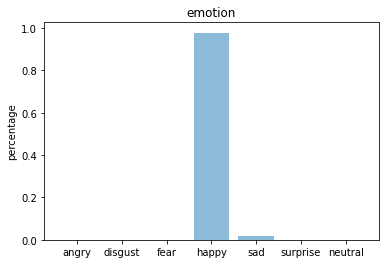

None


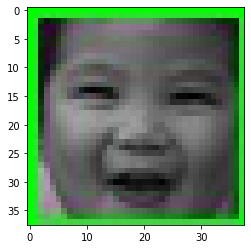

569


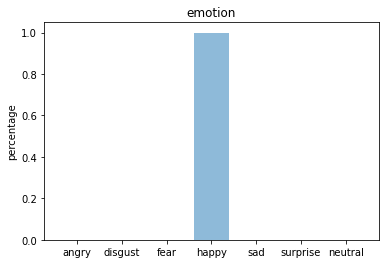

[[4.1829551e-07 7.3369307e-08 3.5358372e-07 9.9926108e-01 3.7276483e-04
  8.5728011e-08 3.6528308e-04]]
0.9992611


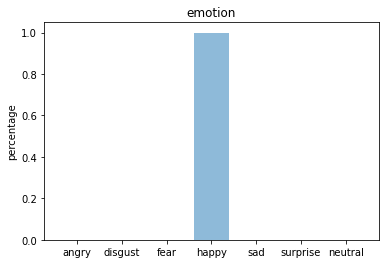

None


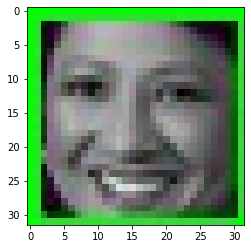

570


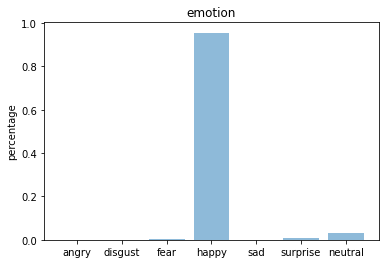

[[7.9816085e-04 2.8515292e-06 3.3634973e-03 9.5497429e-01 6.4934493e-04
  1.0369311e-02 2.9842621e-02]]
0.9549743


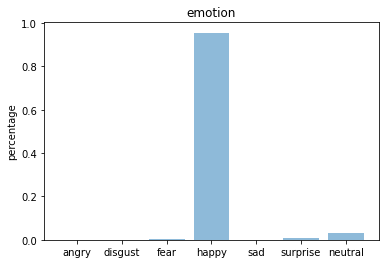

None


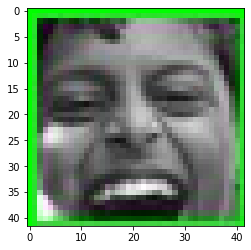

571
Image doesn't exist
572


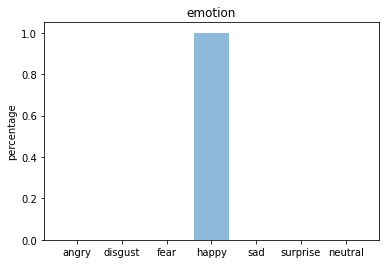

[[5.4183997e-12 1.6291574e-14 4.5915223e-09 9.9999869e-01 1.2817954e-06
  2.5444731e-09 8.1025178e-08]]
0.9999987


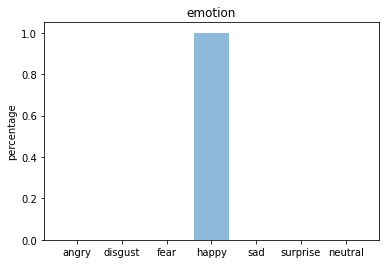

None


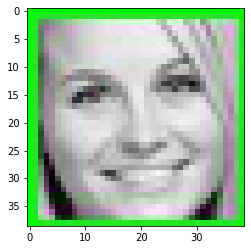

573
Image doesn't exist
574
Image doesn't exist
575


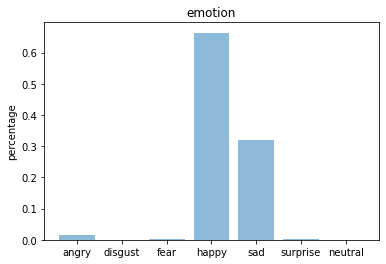

[[1.3841646e-02 8.6712307e-06 1.1110429e-03 6.6392171e-01 3.1877020e-01
  2.3365328e-03 1.0136015e-05]]
0.6639217


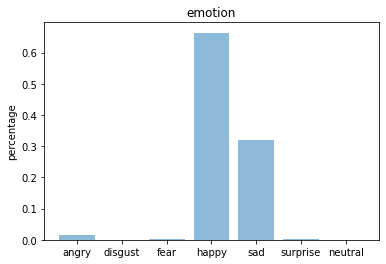

None


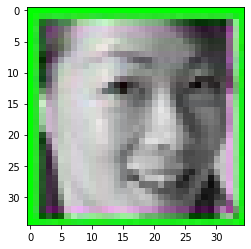

576


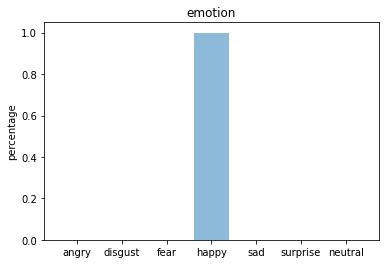

[[1.68431543e-05 1.25562707e-07 1.80550305e-05 9.99664783e-01
  1.12612695e-04 1.84035933e-04 3.49285119e-06]]
0.9996648


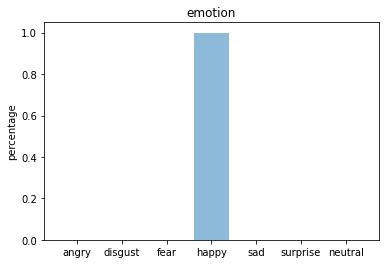

None


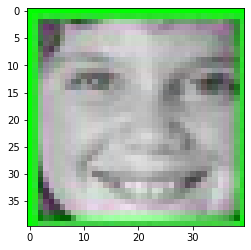

577


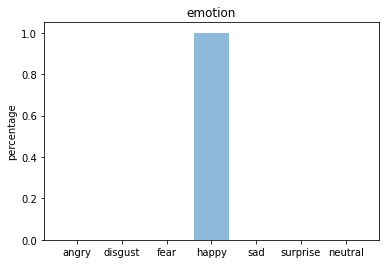

[[5.4715343e-11 1.5620463e-10 6.7697035e-11 9.9999881e-01 1.1456373e-06
  7.6917166e-09 3.1953524e-09]]
0.9999988


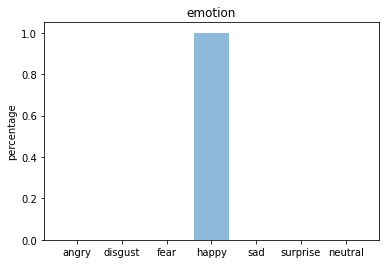

None


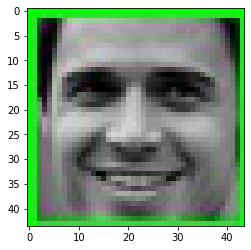

578


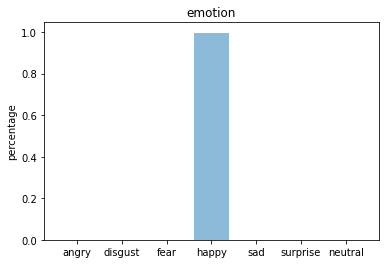

[[1.9328465e-04 3.4557481e-04 7.5453706e-04 9.9688184e-01 5.5878359e-04
  3.6796983e-04 8.9812838e-04]]
0.99688184


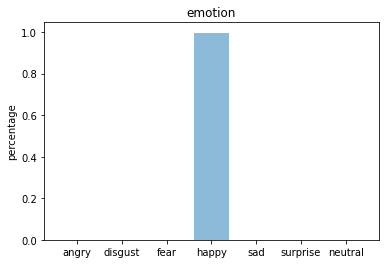

None


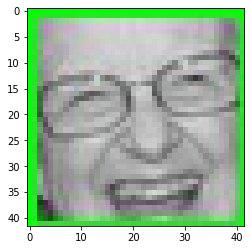

579
Image doesn't exist
580
Image doesn't exist
581


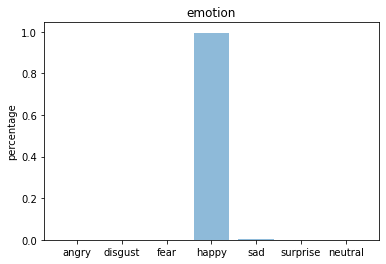

[[1.2407980e-05 4.3607351e-06 7.7699711e-05 9.9567670e-01 4.0456485e-03
  1.7048474e-04 1.2639330e-05]]
0.9956767


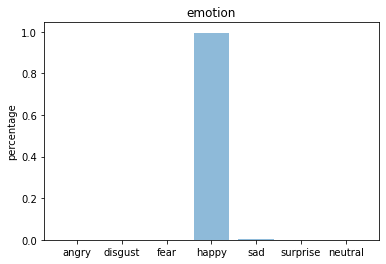

None


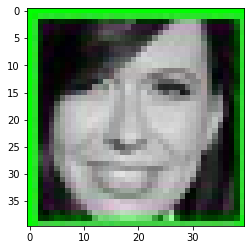

582
Image doesn't exist
583


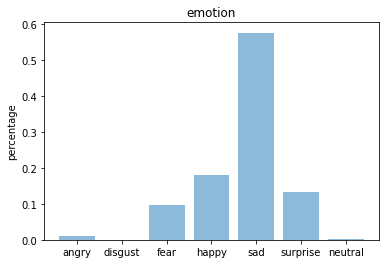

[[1.0356573e-02 1.1763749e-04 9.7655825e-02 1.8121484e-01 5.7616359e-01
  1.3363893e-01 8.5259404e-04]]
0.5761636


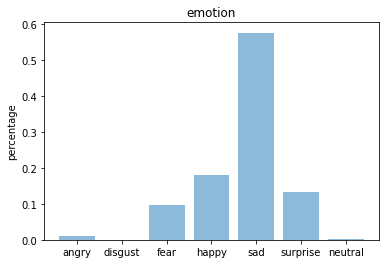

None


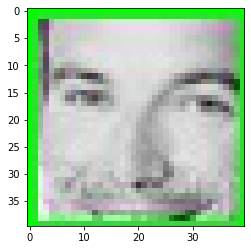

584
Image doesn't exist
585
Image doesn't exist
586
Image doesn't exist
587


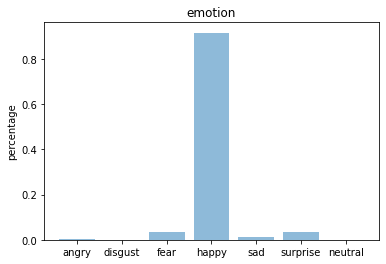

[[1.6545977e-03 4.9566593e-06 3.6092050e-02 9.1631037e-01 1.1666968e-02
  3.4084085e-02 1.8694831e-04]]
0.91631037


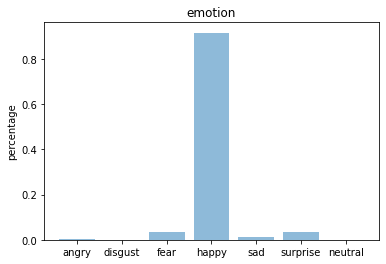

None


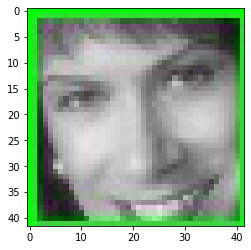

588


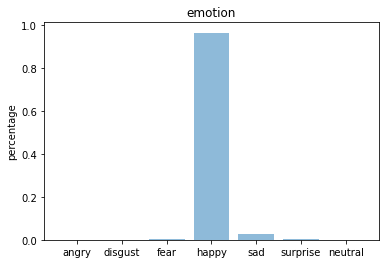

[[7.4209493e-05 6.1748426e-05 4.4775163e-03 9.6466386e-01 2.8019337e-02
  2.7000767e-03 3.2702662e-06]]
0.96466386


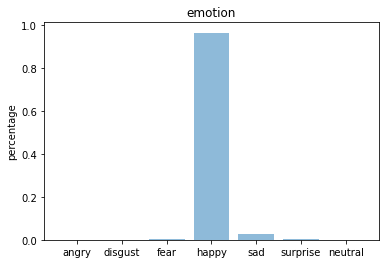

None


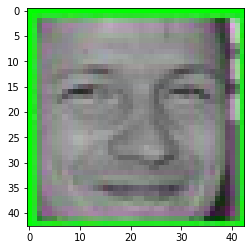

589
Image doesn't exist
590


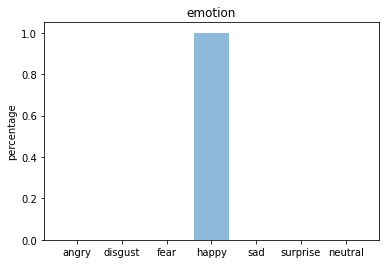

[[1.9261634e-11 6.4762510e-12 8.6735938e-11 9.9996090e-01 3.9098202e-05
  2.0604756e-09 9.3824404e-10]]
0.9999609


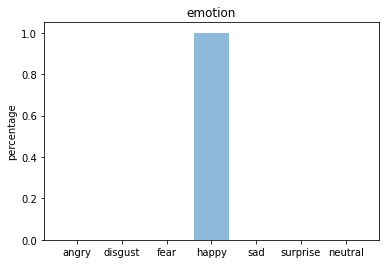

None


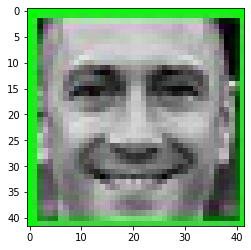

591
Image doesn't exist
592
Image doesn't exist
593
Image doesn't exist
594
Image doesn't exist
595
Image doesn't exist
596
Image doesn't exist
597
Image doesn't exist
598


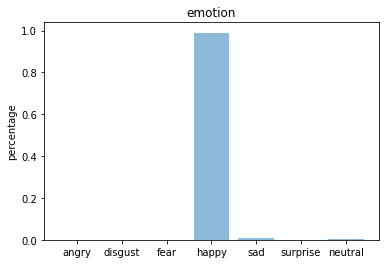

[[9.4592660e-06 6.2531358e-06 3.2065736e-04 9.8986465e-01 7.9617314e-03
  1.4068584e-04 1.6966747e-03]]
0.98986465


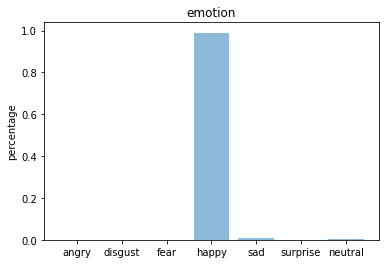

None


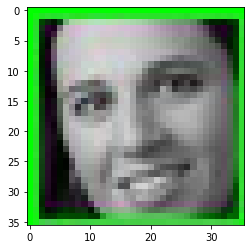

599
Image doesn't exist
600
Image doesn't exist
601
Image doesn't exist
602
Image doesn't exist
603
Image doesn't exist
604
Image doesn't exist
605


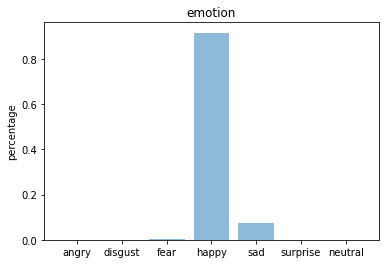

[[5.0058978e-04 3.2379014e-06 5.2712495e-03 9.1705388e-01 7.5969078e-02
  4.8032950e-04 7.2161178e-04]]
0.9170539


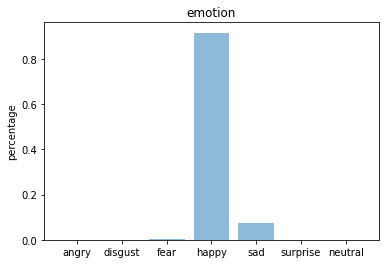

None


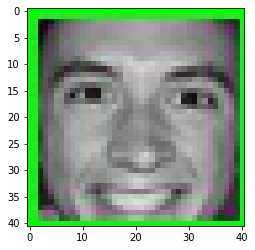

606
Image doesn't exist
607
Image doesn't exist
608


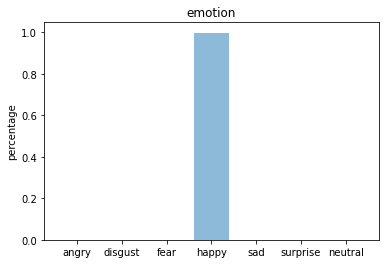

[[2.3661157e-09 1.8476246e-13 7.9443389e-06 9.9849868e-01 5.2145257e-05
  2.3306070e-08 1.4412020e-03]]
0.9984987


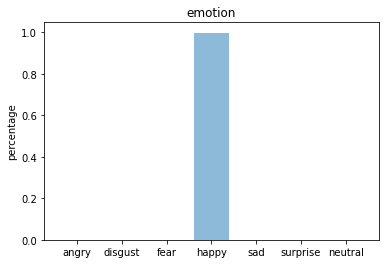

None


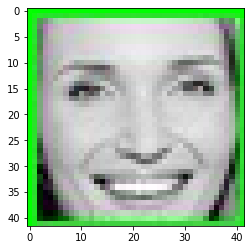

609


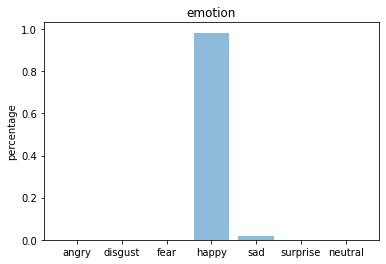

[[5.0935287e-06 1.2750336e-06 2.4881294e-05 9.8263955e-01 1.6562017e-02
  7.5928040e-04 7.9856909e-06]]
0.98263955


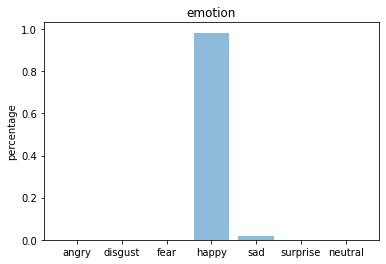

None


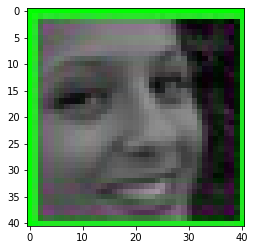

610


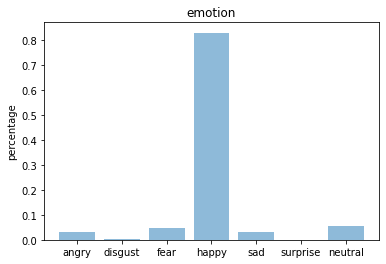

[[3.2780170e-02 2.2956857e-03 4.6508525e-02 8.3038241e-01 3.2709543e-02
  2.4855905e-04 5.5075068e-02]]
0.8303824


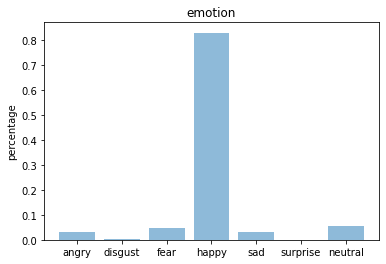

None


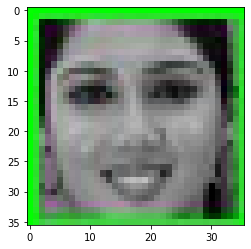

611


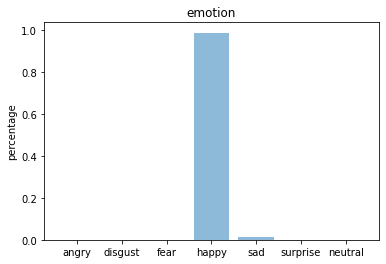

[[5.7457050e-06 6.6267453e-06 3.6215302e-04 9.8824000e-01 1.1021997e-02
  2.4367766e-04 1.1980990e-04]]
0.98824


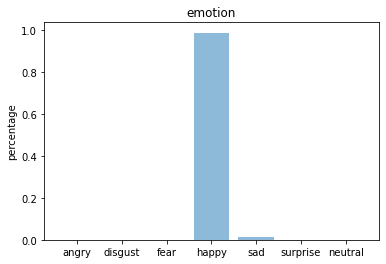

None


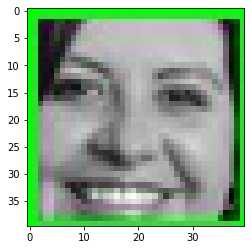

612


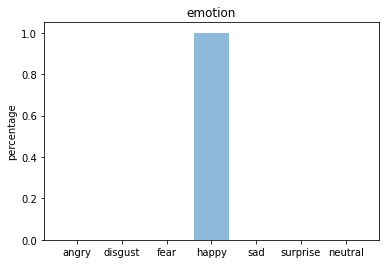

[[8.2583206e-08 3.5057231e-11 1.3399810e-07 9.9998879e-01 1.0605260e-05
  9.1035748e-09 3.8513454e-07]]
0.9999888


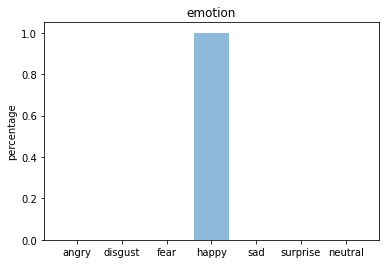

None


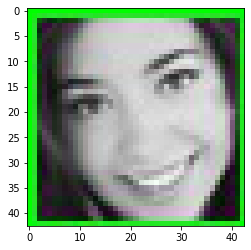

613
Image doesn't exist
614


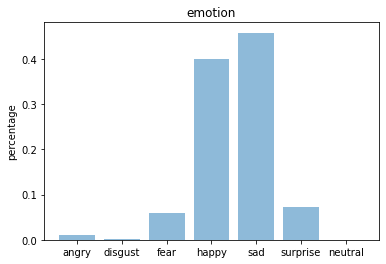

[[1.0155856e-02 1.7414183e-03 6.0258191e-02 3.9856598e-01 4.5734006e-01
  7.1890414e-02 4.8119025e-05]]
0.45734006


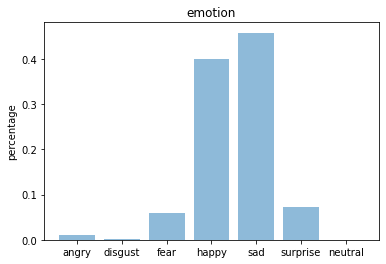

None


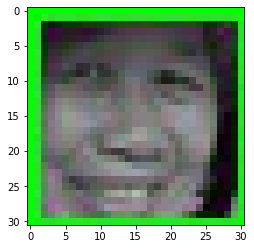

615
Image doesn't exist
616
Image doesn't exist
617


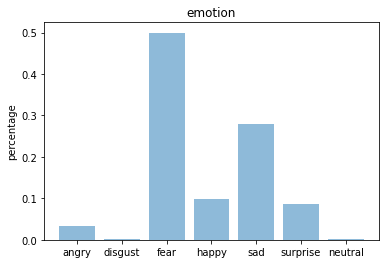

[[0.03344917 0.0007265  0.49973157 0.09959017 0.27886018 0.08553752
  0.00210483]]
0.49973157


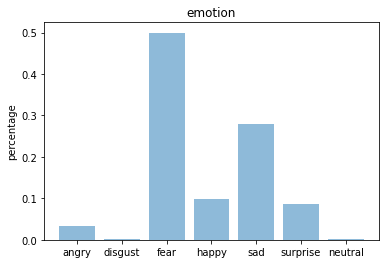

None


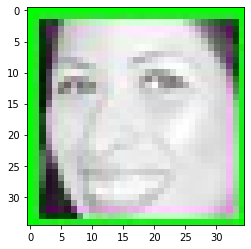

618


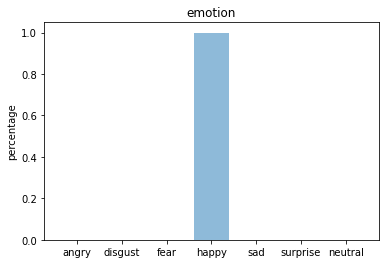

[[4.2583154e-15 3.1922124e-17 8.9710547e-13 9.9932706e-01 2.4286107e-08
  2.3741070e-13 6.7293074e-04]]
0.99932706


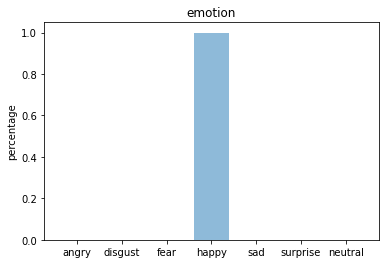

None


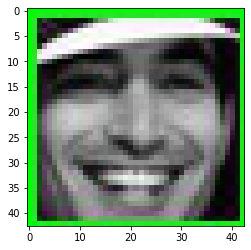

619


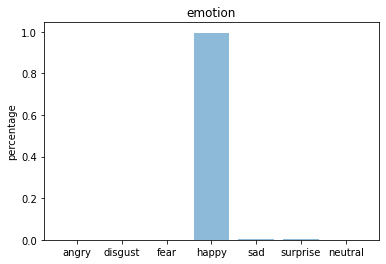

[[6.5642239e-06 8.0671668e-08 9.6395001e-05 9.9551612e-01 2.3190498e-03
  2.0297247e-03 3.2086453e-05]]
0.9955161


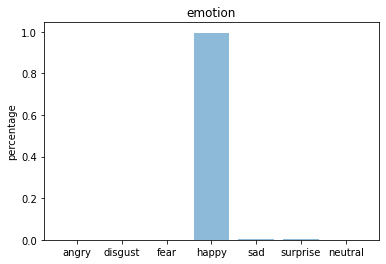

None


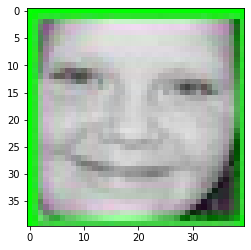

620


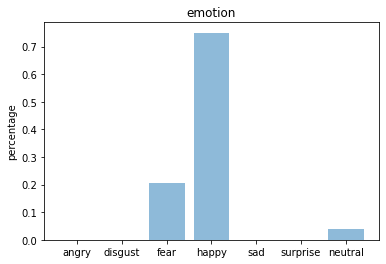

[[7.9569477e-04 5.5597682e-04 2.0678772e-01 7.5054306e-01 1.3929729e-04
  3.3614619e-04 4.0842157e-02]]
0.75054306


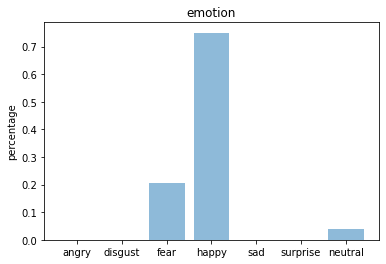

None


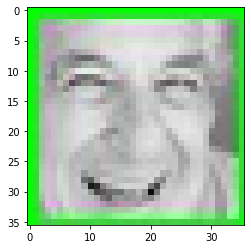

621


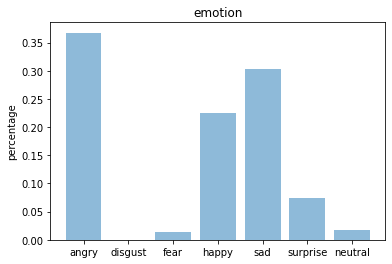

[[3.6741823e-01 4.7820253e-05 1.3014429e-02 2.2514400e-01 3.0225575e-01
  7.4200436e-02 1.7919371e-02]]
0.36741823


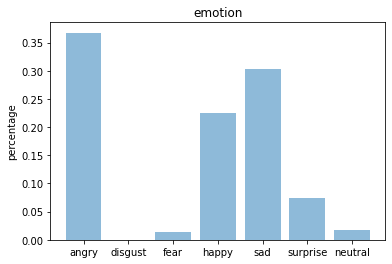

None


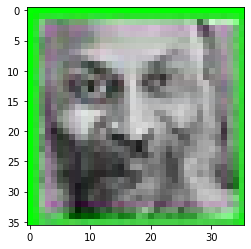

622


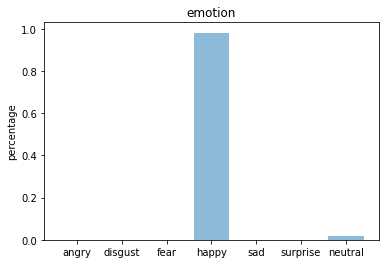

[[4.0587917e-08 1.4573044e-10 5.1698371e-06 9.8181206e-01 1.3996123e-05
  7.1972863e-08 1.8168679e-02]]
0.98181206


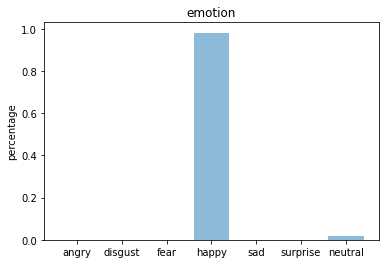

None


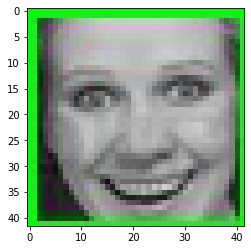

623
Image doesn't exist
624
Image doesn't exist
625


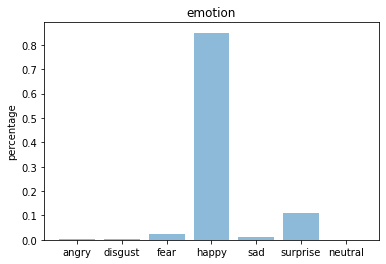

[[2.09632912e-03 4.03389940e-03 2.42488738e-02 8.49621236e-01
  1.07492460e-02 1.09244496e-01 5.82614621e-06]]
0.84962124


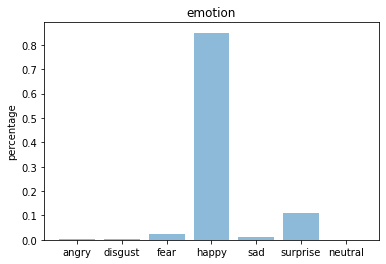

None


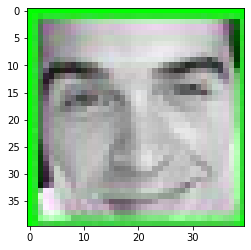

626
Image doesn't exist
627
Image doesn't exist
628
Image doesn't exist
629
Image doesn't exist
630
Image doesn't exist
631


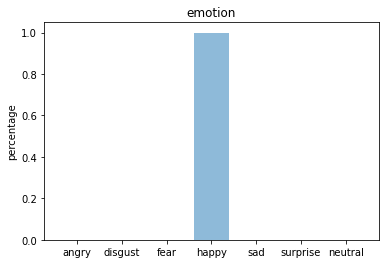

[[1.1196719e-06 4.7980070e-08 1.5702695e-05 9.9952114e-01 4.2991099e-04
  5.0358021e-06 2.7035871e-05]]
0.99952114


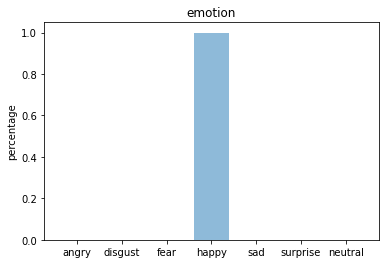

None


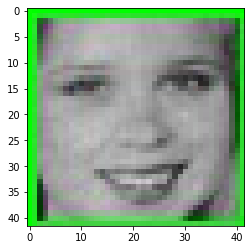

632


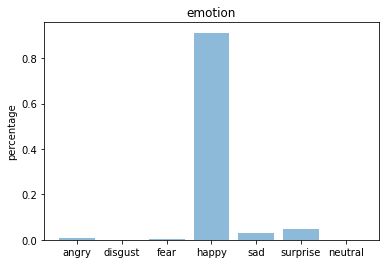

[[8.7959245e-03 4.1291889e-05 4.4653015e-03 9.1207767e-01 2.8680140e-02
  4.5382809e-02 5.5686507e-04]]
0.91207767


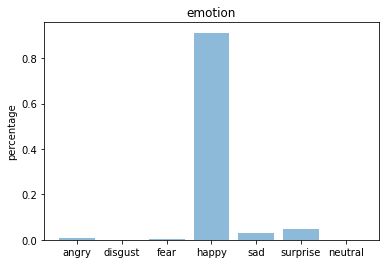

None


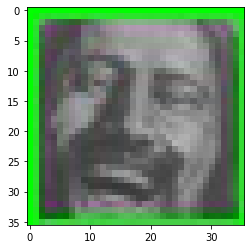

633


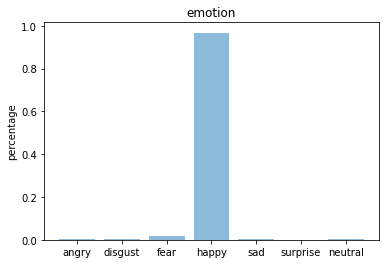

[[0.0030338  0.00265486 0.01697206 0.9680127  0.00560845 0.00101754
  0.0027005 ]]
0.9680127


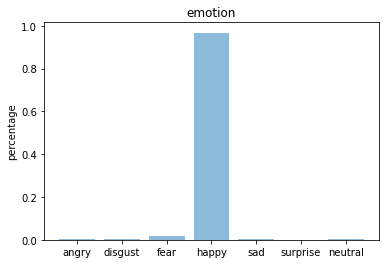

None


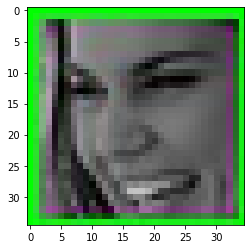

634
Image doesn't exist
635
Image doesn't exist
636
Image doesn't exist
637
Image doesn't exist
638


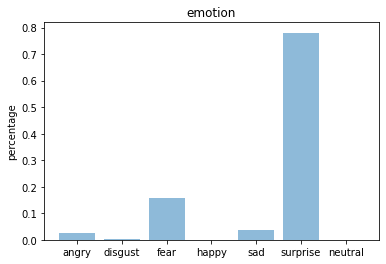

[[2.4397748e-02 1.7973802e-03 1.5576847e-01 3.3095643e-05 3.7305918e-02
  7.8066409e-01 3.3286069e-05]]
0.7806641


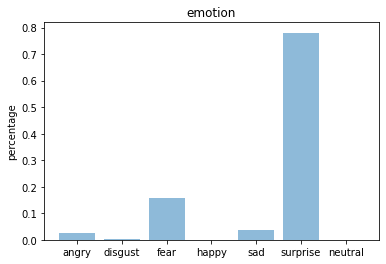

None


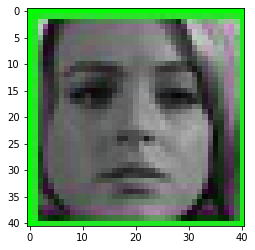

639


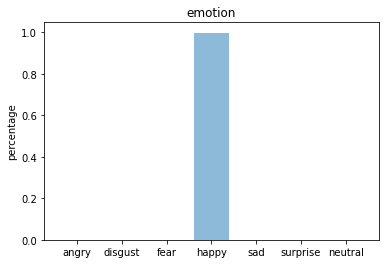

[[8.8769224e-07 2.1977424e-08 1.6708371e-04 9.9855644e-01 8.1759575e-04
  4.5379164e-04 4.1545654e-06]]
0.99855644


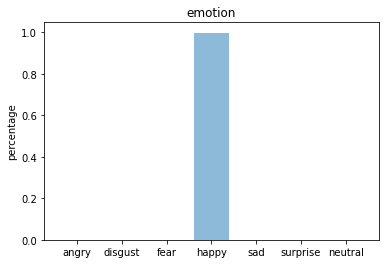

None


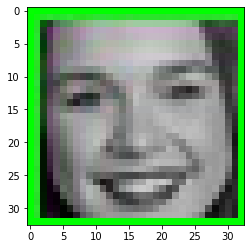

640
Image doesn't exist
641
Image doesn't exist
642
Image doesn't exist
643
Image doesn't exist
644
Image doesn't exist
645
Image doesn't exist
646
Image doesn't exist
647
Image doesn't exist
648


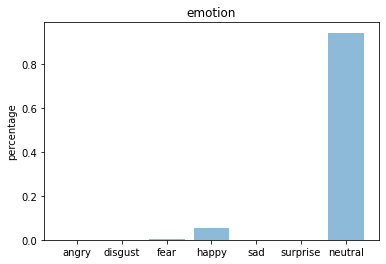

[[1.4248099e-06 9.2304020e-10 4.9941796e-03 5.3700712e-02 4.5187608e-08
  7.5179489e-09 9.4130373e-01]]
0.94130373


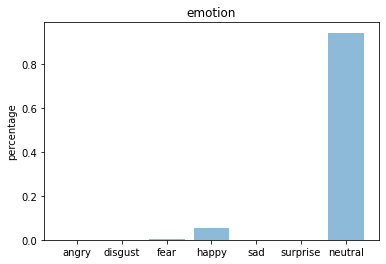

None


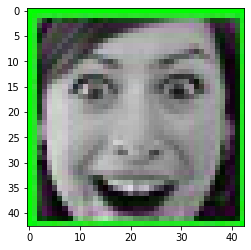

649
Image doesn't exist
650


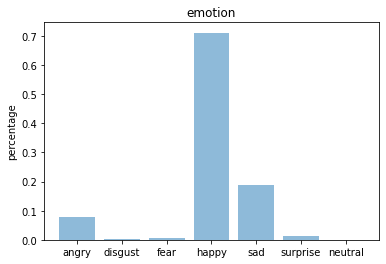

[[7.8520268e-02 2.1950274e-03 5.6000515e-03 7.1155661e-01 1.8863161e-01
  1.3009721e-02 4.8669396e-04]]
0.7115566


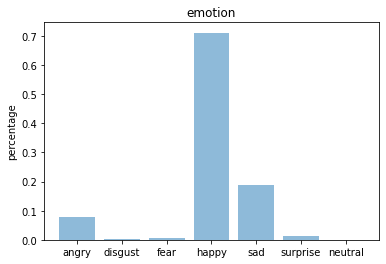

None


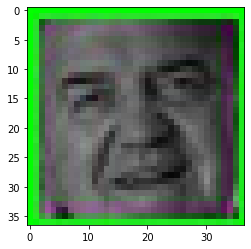

651


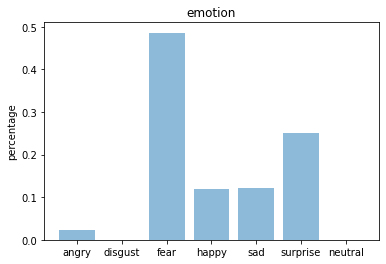

[[2.3128616e-02 2.4312639e-04 4.8624074e-01 1.1868058e-01 1.2133690e-01
  2.5028005e-01 9.0061825e-05]]
0.48624074


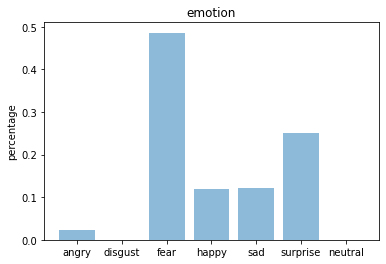

None


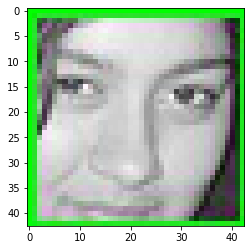

652


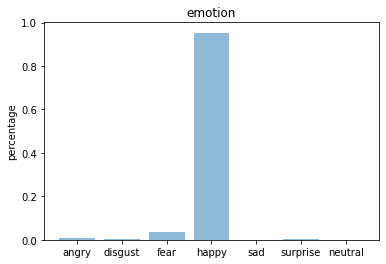

[[7.0938598e-03 1.7106812e-03 3.5109702e-02 9.5347553e-01 4.2916054e-05
  2.4019971e-03 1.6527658e-04]]
0.95347553


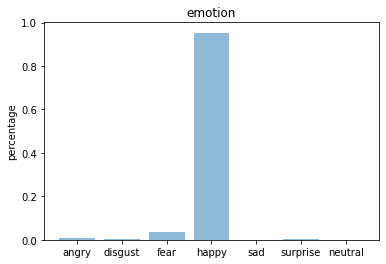

None


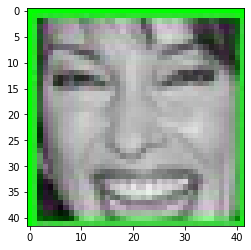

653
Image doesn't exist
654
Image doesn't exist
655
Image doesn't exist
656
Image doesn't exist
657
Image doesn't exist
658


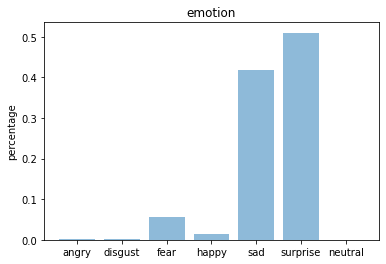

[[3.02549638e-03 1.23908836e-03 5.50532974e-02 1.33178225e-02
  4.17468548e-01 5.09747148e-01 1.48584630e-04]]
0.50974715


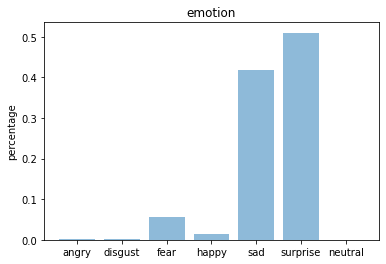

None


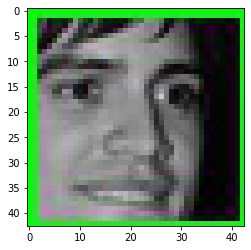

659
Image doesn't exist
660


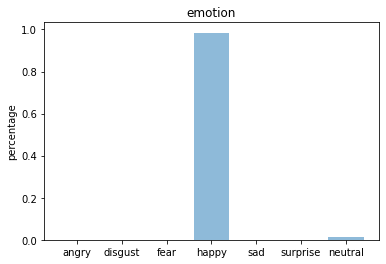

[[1.7819326e-05 2.3000606e-08 9.5711375e-06 9.8440105e-01 3.0061253e-04
  5.2991295e-06 1.5265600e-02]]
0.98440105


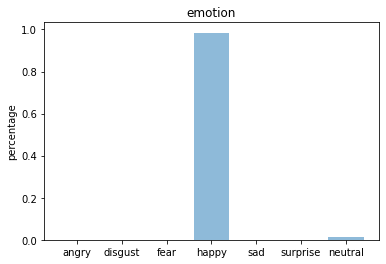

None


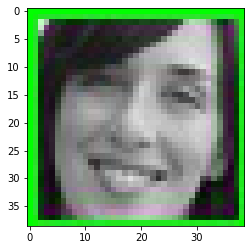

661
Image doesn't exist
662
Image doesn't exist
663
Image doesn't exist
664
Image doesn't exist
665


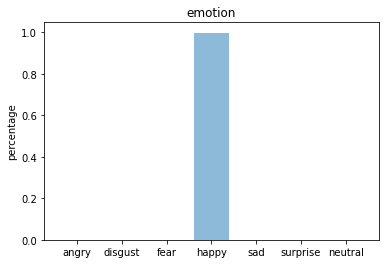

[[3.8947201e-06 3.0995942e-08 1.5189026e-05 9.9887532e-01 1.0880657e-03
  9.0706595e-07 1.6550990e-05]]
0.9988753


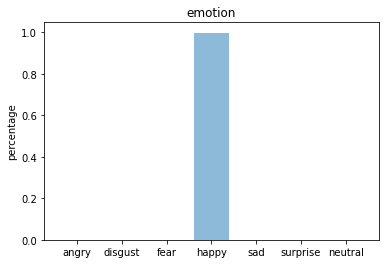

None


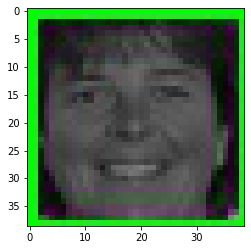

666
Image doesn't exist
667
Image doesn't exist
668


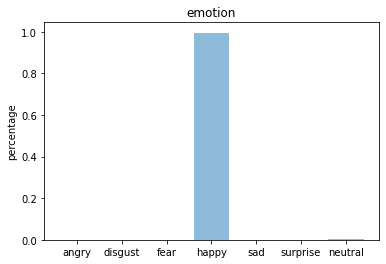

[[9.5883088e-06 1.4712717e-10 3.3524018e-05 9.9501991e-01 5.2267358e-05
  5.6734457e-08 4.8845871e-03]]
0.9950199


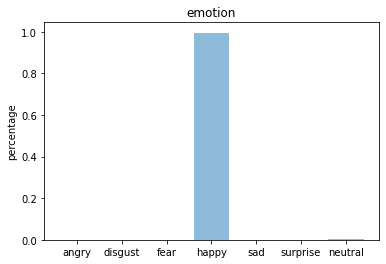

None


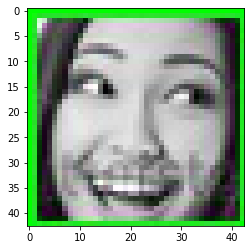

669
Image doesn't exist
670
Image doesn't exist
671


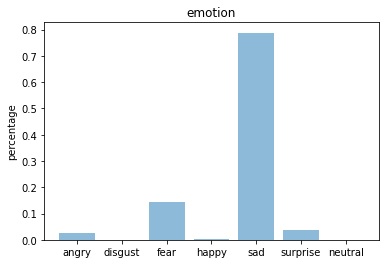

[[2.6056832e-02 1.0186576e-03 1.4502032e-01 1.6162310e-03 7.8830403e-01
  3.7705865e-02 2.7806580e-04]]
0.78830403


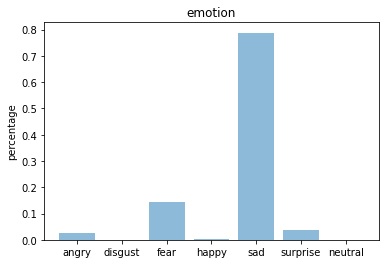

None


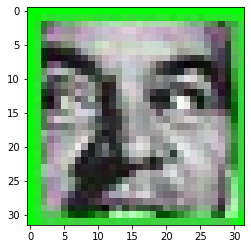

672
Image doesn't exist
673
Image doesn't exist
674
Image doesn't exist
675


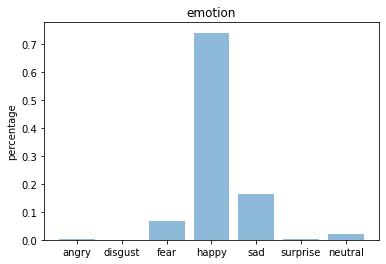

[[3.7571893e-03 1.0760935e-04 6.8489924e-02 7.4096143e-01 1.6249713e-01
  3.4077154e-03 2.0779021e-02]]
0.74096143


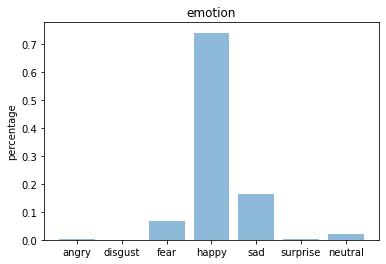

None


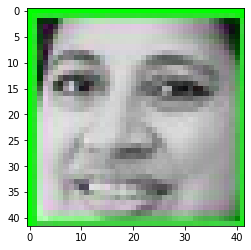

676


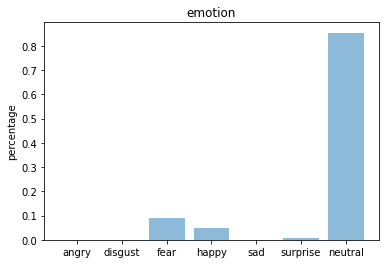

[[3.3640288e-04 3.9708284e-06 8.8736758e-02 4.8657339e-02 1.1382470e-03
  7.1945731e-03 8.5393280e-01]]
0.8539328


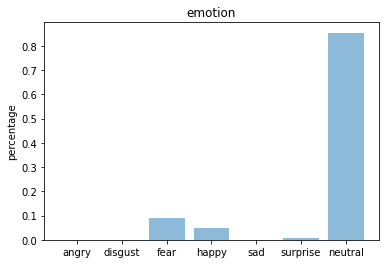

None


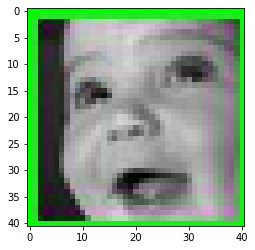

677
Image doesn't exist
678


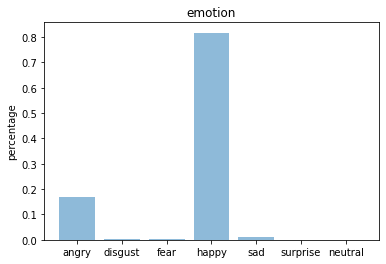

[[1.6801719e-01 2.1934207e-03 2.2490581e-03 8.1691718e-01 1.0228087e-02
  3.9314202e-04 1.9335828e-06]]
0.8169172


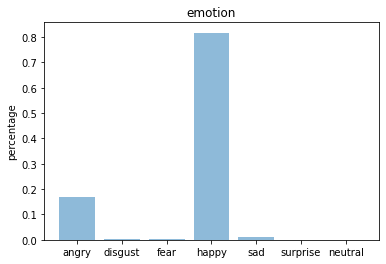

None


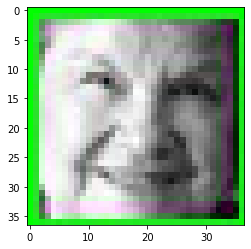

679
Image doesn't exist
680


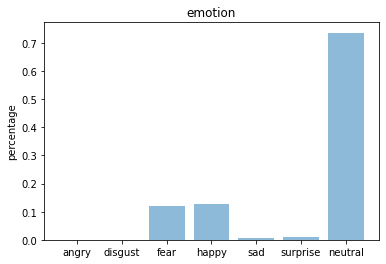

[[5.7757796e-05 7.0445028e-10 1.2135843e-01 1.2588087e-01 6.7522228e-03
  9.3031637e-03 7.3664761e-01]]
0.7366476


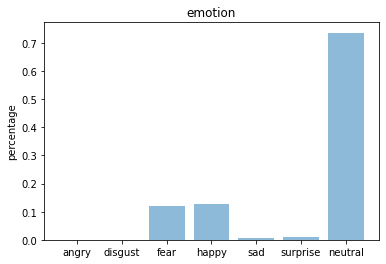

None


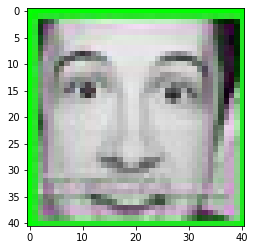

681
Image doesn't exist
682


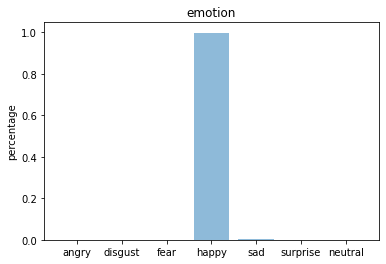

[[9.7550364e-06 2.1953676e-08 4.7710826e-05 9.9738222e-01 2.4925852e-03
  3.2891770e-05 3.4878103e-05]]
0.9973822


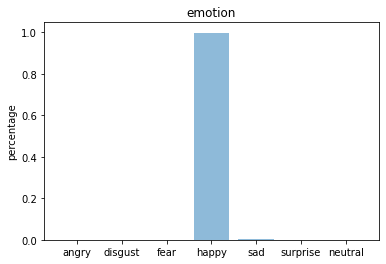

None


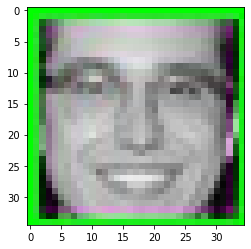

683
Image doesn't exist
684


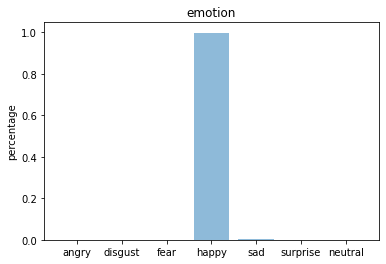

[[6.9825415e-05 1.0363044e-05 1.9086631e-04 9.9739587e-01 1.5706060e-03
  6.1672245e-04 1.4584514e-04]]
0.9973959


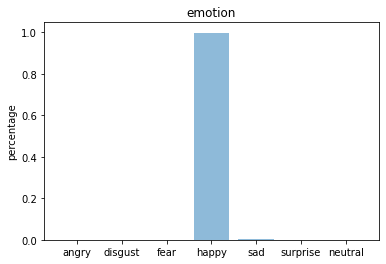

None


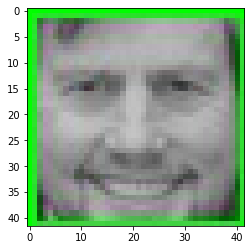

685


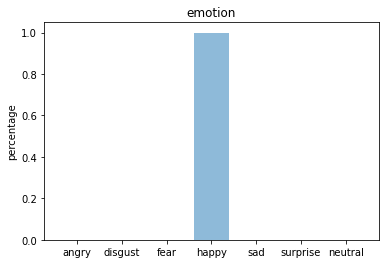

[[9.8353632e-07 1.5082802e-09 2.6168036e-05 9.9940324e-01 5.2812760e-04
  4.1221923e-05 2.9048167e-07]]
0.99940324


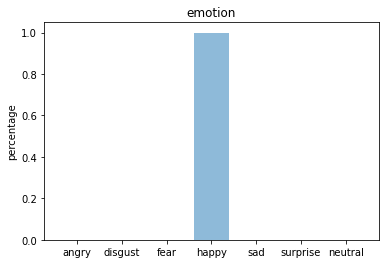

None


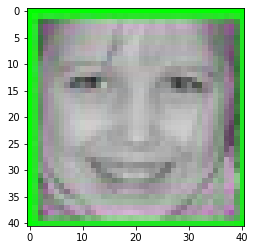

686


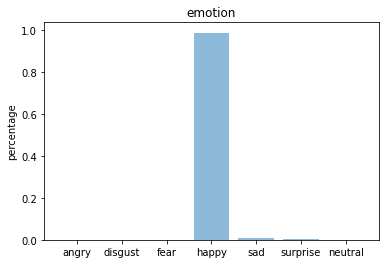

[[1.2038189e-03 3.4163980e-04 5.8253779e-04 9.8747230e-01 7.3698307e-03
  2.5896716e-03 4.4006098e-04]]
0.9874723


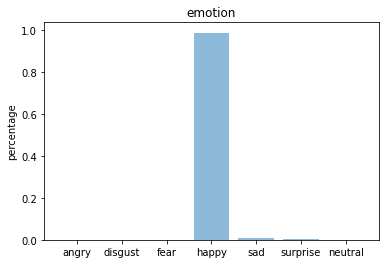

None


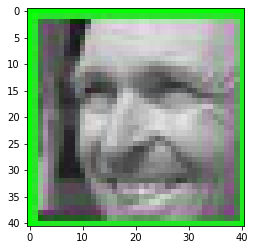

687
Image doesn't exist
688


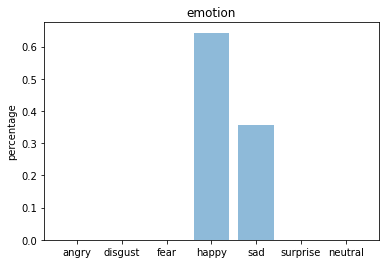

[[9.6835010e-06 1.5845231e-07 4.8815180e-04 6.4294183e-01 3.5633808e-01
  2.2114618e-04 9.5921268e-07]]
0.64294183


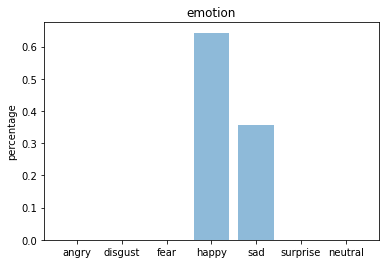

None


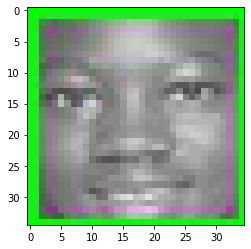

689


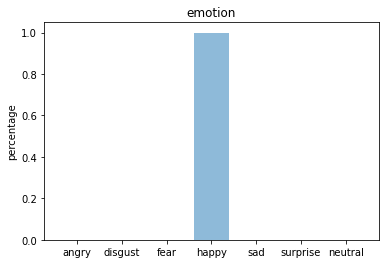

[[1.0331361e-06 6.3236278e-08 2.4922243e-05 9.9940288e-01 3.1042746e-05
  5.3976505e-04 3.8823237e-07]]
0.9994029


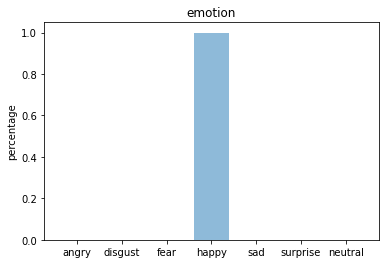

None


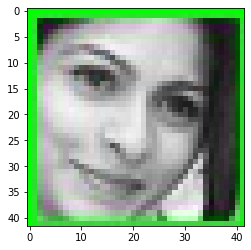

690


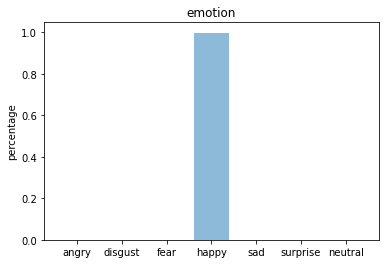

[[1.7135517e-06 1.6663650e-08 4.2095922e-05 9.9858761e-01 1.3433408e-03
  6.9913276e-06 1.8132343e-05]]
0.9985876


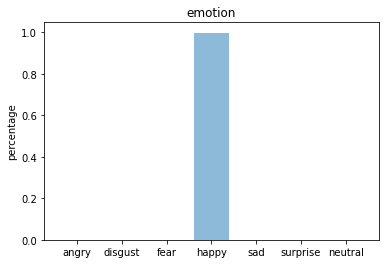

None


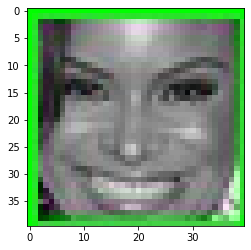

691
Image doesn't exist
692
Image doesn't exist
693


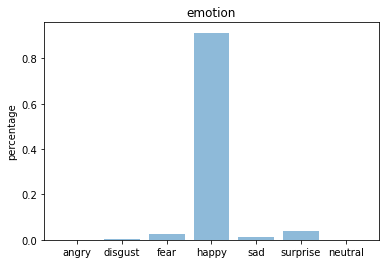

[[5.1807408e-04 3.3398189e-03 2.6977640e-02 9.1303134e-01 1.4531149e-02
  4.0896151e-02 7.0582691e-04]]
0.91303134


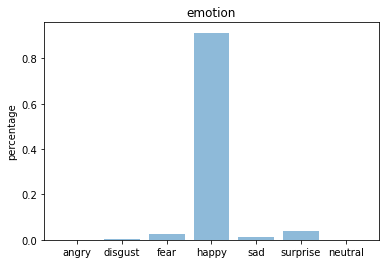

None


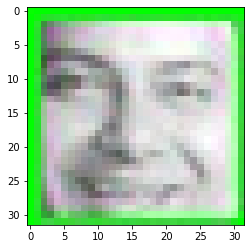

694
Image doesn't exist
695
Image doesn't exist
696
Image doesn't exist
697
Image doesn't exist
698


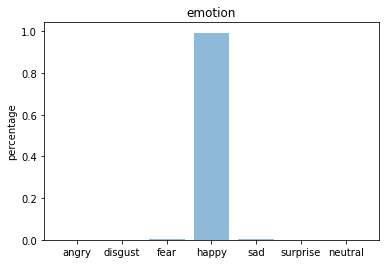

[[4.69757251e-05 1.42897115e-05 2.38298997e-03 9.93657172e-01
  1.71797548e-03 1.20045082e-03 9.80091863e-04]]
0.9936572


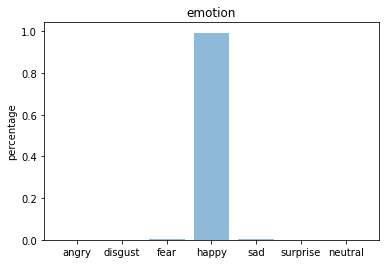

None


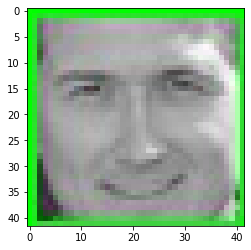

699


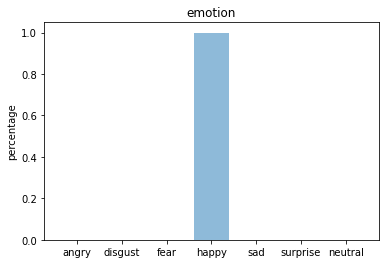

[[1.06895017e-08 4.32392316e-11 2.44005264e-07 9.99126971e-01
  8.72341217e-04 1.11066605e-07 3.05238558e-07]]
0.999127


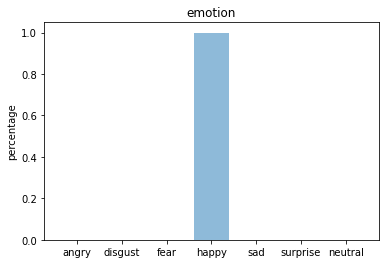

None


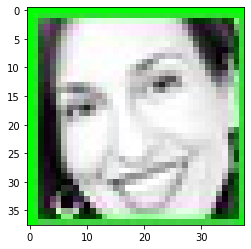

700
Image doesn't exist
701
Image doesn't exist
702


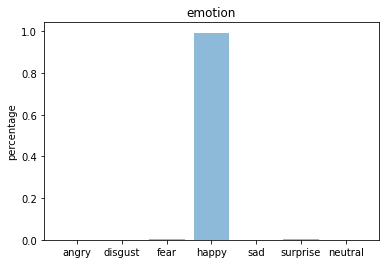

[[3.8476959e-05 9.8448050e-05 4.2256843e-03 9.9341869e-01 3.5129173e-04
  1.5629674e-03 3.0455133e-04]]
0.9934187


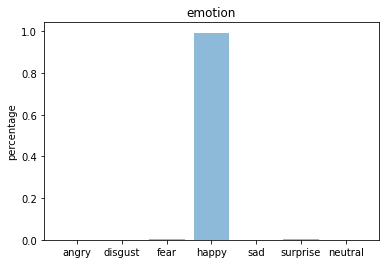

None


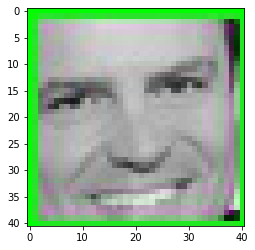

703


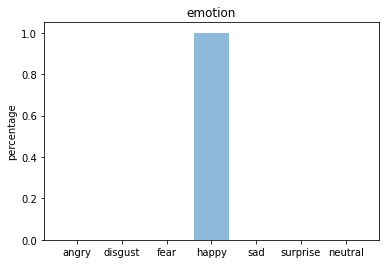

[[3.2610694e-07 2.0390742e-10 1.5394501e-06 9.9980110e-01 3.3191944e-05
  1.9507836e-06 1.6181484e-04]]
0.9998011


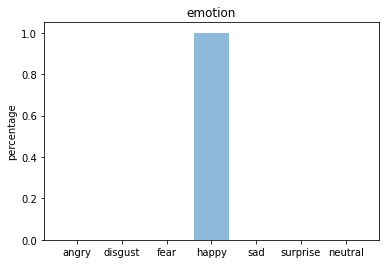

None


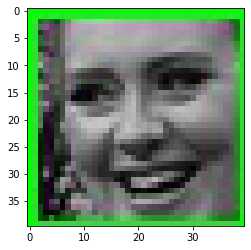

704
Image doesn't exist
705
Image doesn't exist
706
Image doesn't exist
707
Image doesn't exist
708


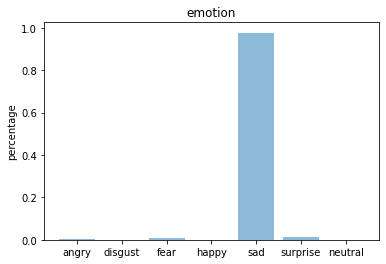

[[1.6844138e-03 1.4123316e-07 7.3688491e-03 1.7632868e-06 9.7705317e-01
  1.3866689e-02 2.4994732e-05]]
0.97705317


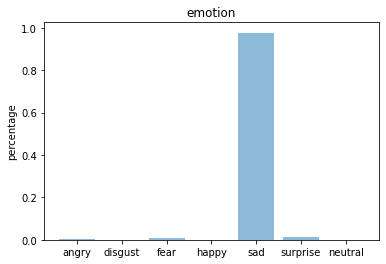

None


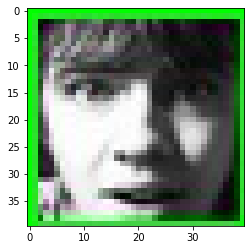

709
Image doesn't exist
710


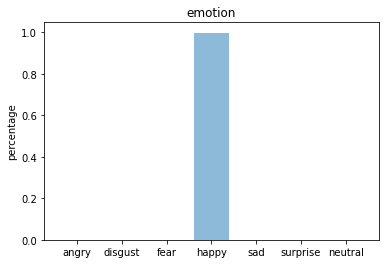

[[1.6696131e-05 1.0145995e-06 2.8516707e-04 9.9883455e-01 9.2243798e-05
  3.0030031e-05 7.4031990e-04]]
0.99883455


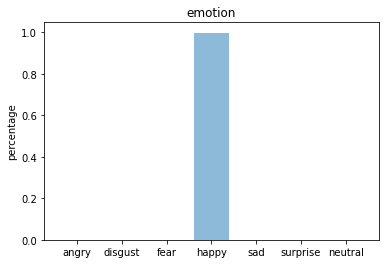

None


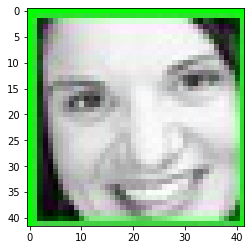

711


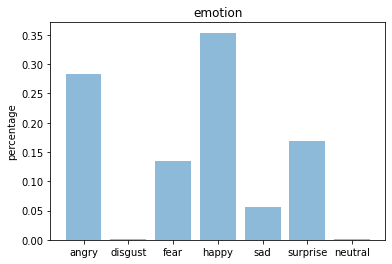

[[0.28356573 0.00188678 0.13407536 0.3538286  0.05631495 0.16840085
  0.00192776]]
0.3538286


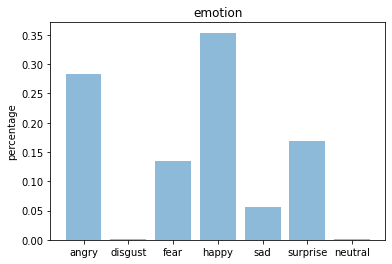

None


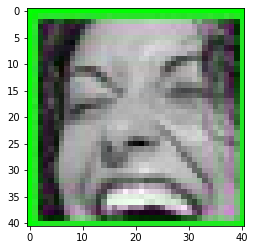

712
Image doesn't exist
713


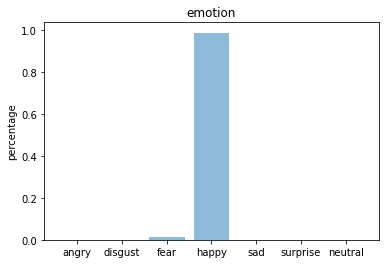

[[3.7094626e-06 5.2032927e-08 1.1582979e-02 9.8640603e-01 1.1716207e-03
  3.2849061e-05 8.0273428e-04]]
0.986406


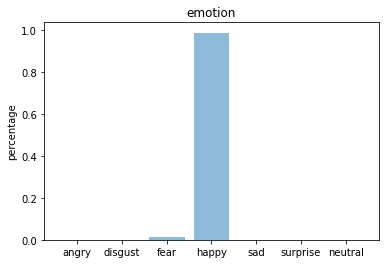

None


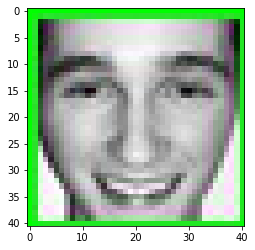

714


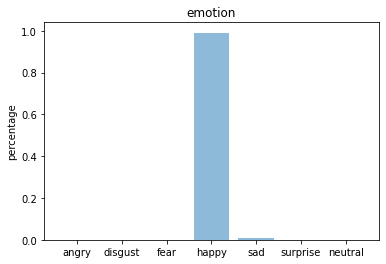

[[7.8001960e-07 1.3829472e-09 1.1198975e-04 9.9042636e-01 9.3476186e-03
  8.4809093e-05 2.8393051e-05]]
0.99042636


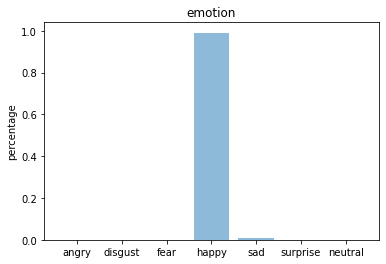

None


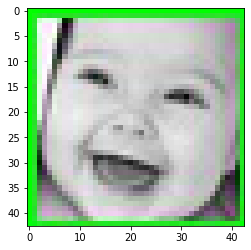

715


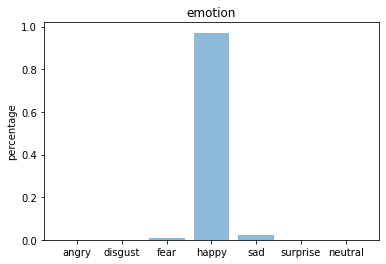

[[1.16284464e-04 1.01008103e-04 6.26452733e-03 9.71335649e-01
  2.14141347e-02 8.35588653e-05 6.84914354e-04]]
0.97133565


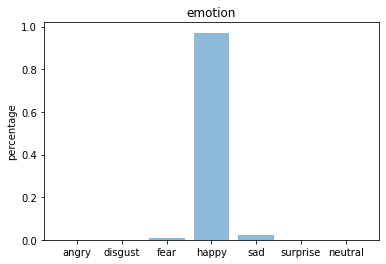

None


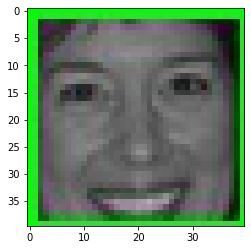

716


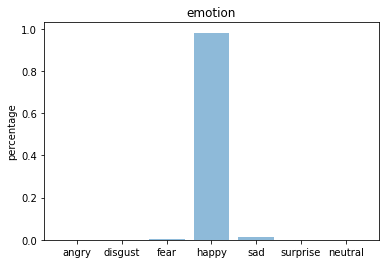

[[1.7906966e-04 1.9687224e-04 4.5804405e-03 9.8187619e-01 1.1744964e-02
  1.2571861e-03 1.6528544e-04]]
0.9818762


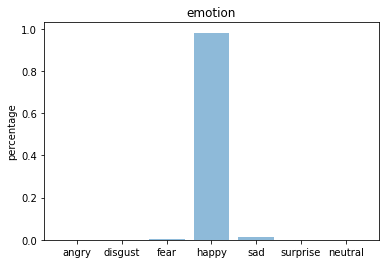

None


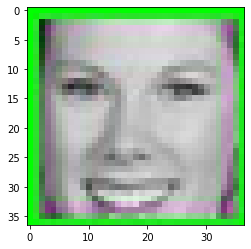

717
Image doesn't exist
718


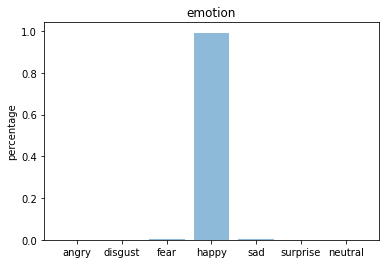

[[6.6999884e-05 1.1037550e-05 4.1991621e-03 9.9215937e-01 2.9802513e-03
  5.0054316e-04 8.2726787e-05]]
0.99215937


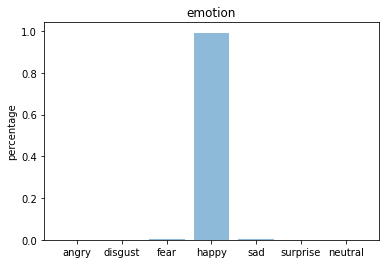

None


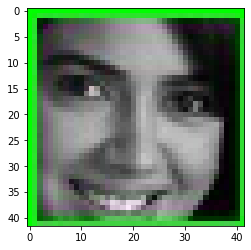

719
Image doesn't exist
720


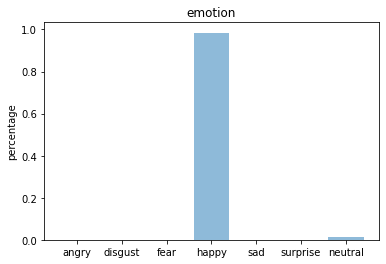

[[2.4015694e-07 4.0946302e-11 1.5096116e-06 9.8456097e-01 2.1666692e-06
  2.1873590e-05 1.5413244e-02]]
0.98456097


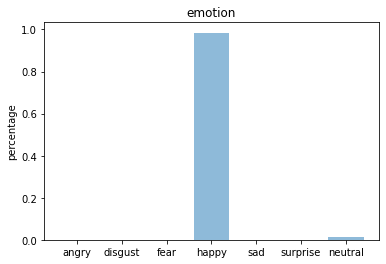

None


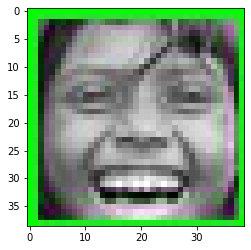

721
Image doesn't exist
722


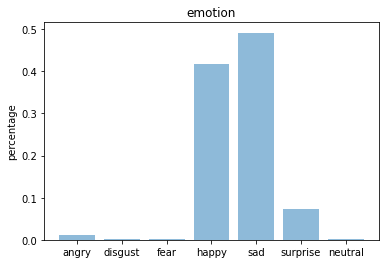

[[0.01128293 0.00130098 0.00219201 0.41837853 0.49175    0.07311255
  0.00198306]]
0.49175


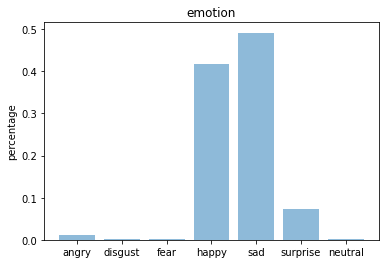

None


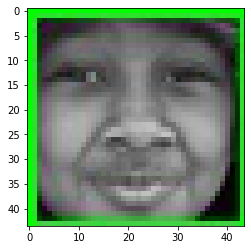

723


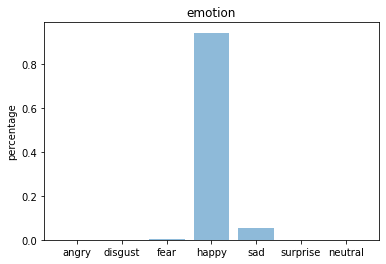

[[2.6119962e-05 2.7225244e-07 2.3884280e-03 9.4397610e-01 5.2920993e-02
  6.7607977e-04 1.1887783e-05]]
0.9439761


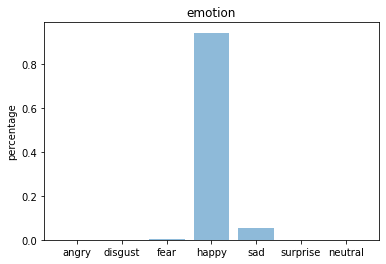

None


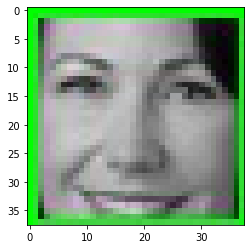

724


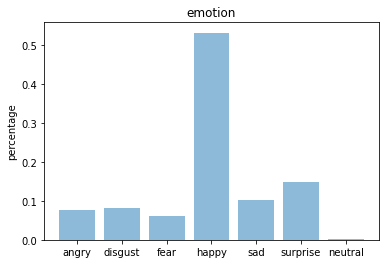

[[0.07611728 0.0811116  0.06060679 0.5324369  0.1013542  0.14733735
  0.00103587]]
0.5324369


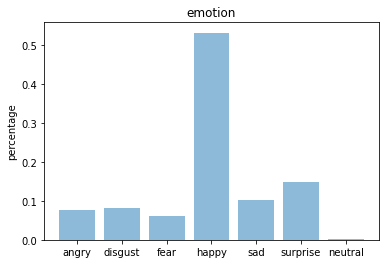

None


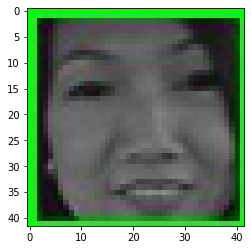

725
Image doesn't exist
726
Image doesn't exist
727


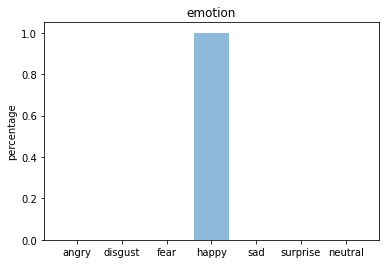

[[7.0555992e-09 4.2581208e-13 5.4147460e-08 9.9993622e-01 6.2634106e-05
  1.1210863e-09 1.0807711e-06]]
0.9999362


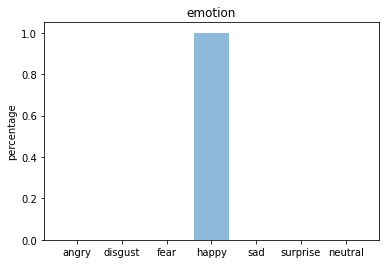

None


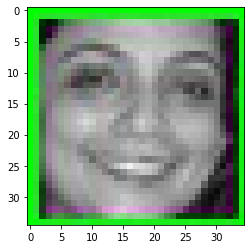

728
Image doesn't exist
729
Image doesn't exist
730
Image doesn't exist
731
Image doesn't exist
732
Image doesn't exist
733
Image doesn't exist
734


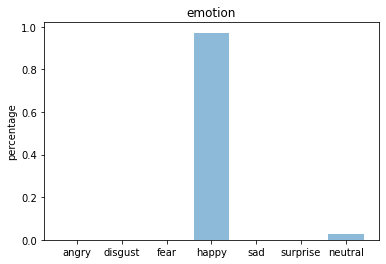

[[4.7943733e-05 1.6476358e-10 1.5966620e-04 9.7202015e-01 6.8129530e-06
  4.4748045e-09 2.7765337e-02]]
0.97202015


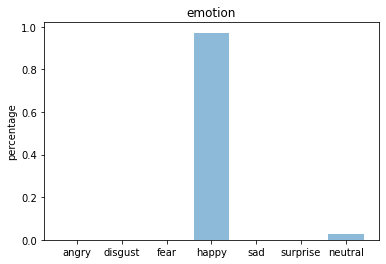

None


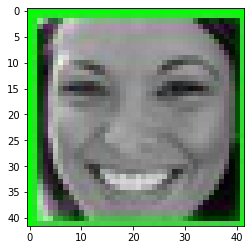

735


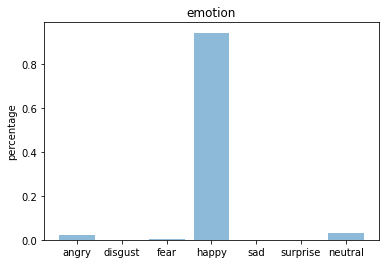

[[2.3056235e-02 1.0269587e-05 1.7533782e-03 9.4349420e-01 2.2656139e-04
  7.4125896e-06 3.1452041e-02]]
0.9434942


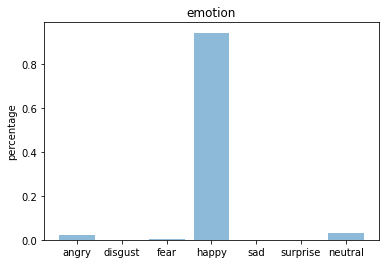

None


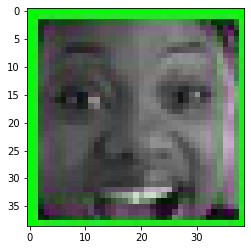

736
Image doesn't exist
737
Image doesn't exist
738
Image doesn't exist
739
Image doesn't exist
740


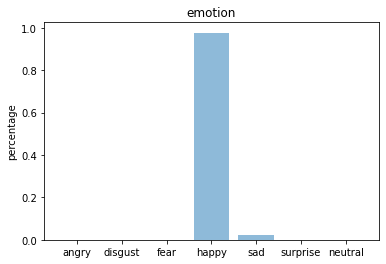

[[1.8641300e-05 8.3285485e-09 1.1819099e-05 9.7670835e-01 2.3162158e-02
  9.5671872e-05 3.2936910e-06]]
0.97670835


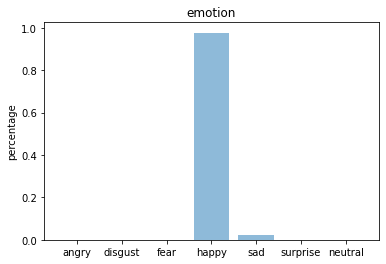

None


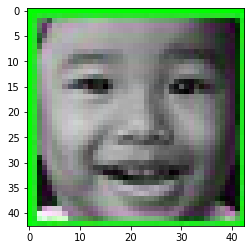

741


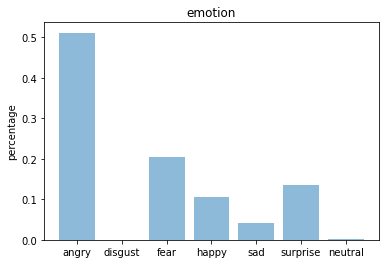

[[5.10903120e-01 4.16029652e-04 2.03486040e-01 1.04363464e-01
  4.23614122e-02 1.35581046e-01 2.88893236e-03]]
0.5109031


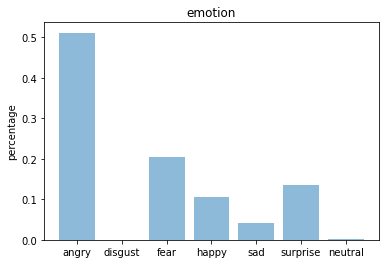

None


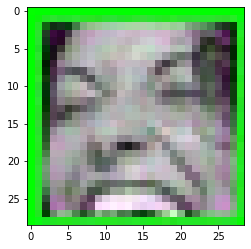

742
Image doesn't exist
743
Image doesn't exist
744


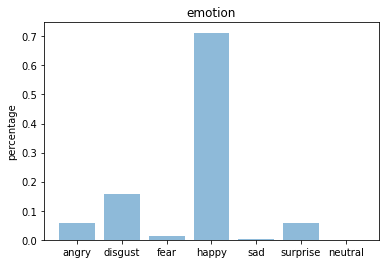

[[5.7164781e-02 1.5695113e-01 1.2823453e-02 7.1230847e-01 3.0824370e-03
  5.7129443e-02 5.4027769e-04]]
0.71230847


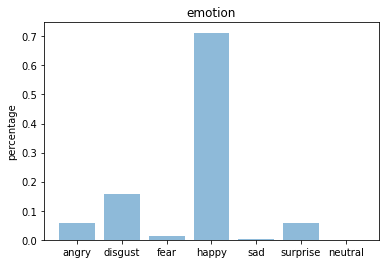

None


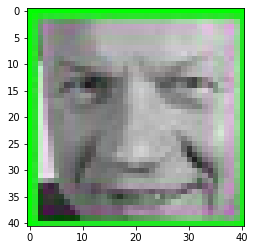

745


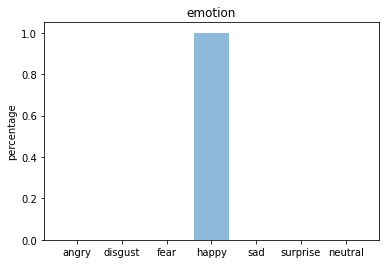

[[4.2509350e-11 2.2743669e-12 5.7532581e-08 9.9999726e-01 2.6770754e-06
  1.5536260e-10 4.6828550e-08]]
0.99999726


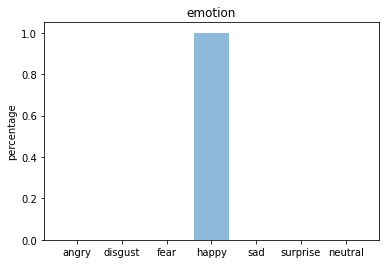

None


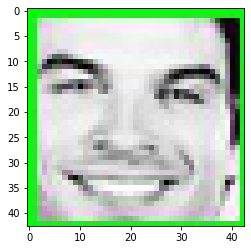

746


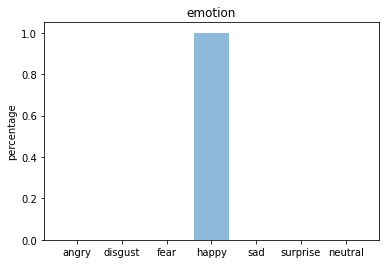

[[5.2092315e-07 2.0812982e-09 1.3587248e-04 9.9980408e-01 5.2454739e-05
  1.8563951e-06 5.3372096e-06]]
0.9998041


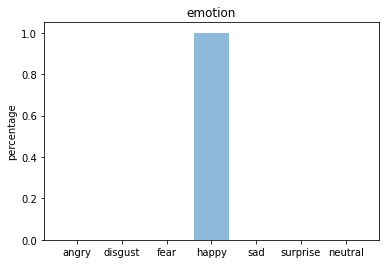

None


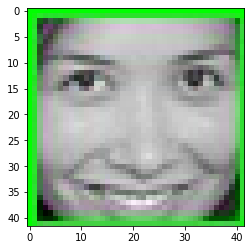

747
Image doesn't exist
748
Image doesn't exist
749
Image doesn't exist
750


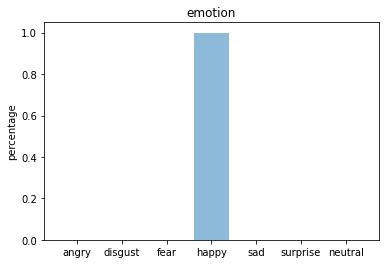

[[6.3151987e-08 1.5458100e-07 1.6416826e-04 9.9969971e-01 9.2643953e-05
  1.9920192e-06 4.1228290e-05]]
0.9996997


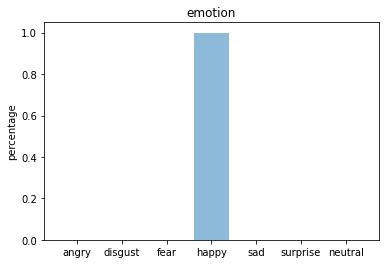

None


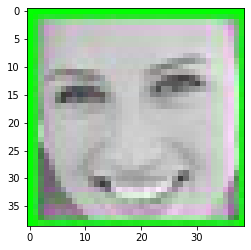

751
Image doesn't exist
752


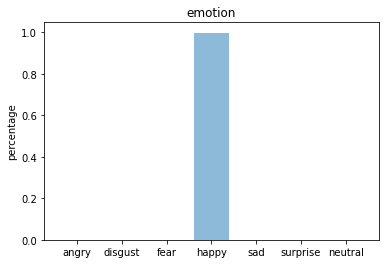

[[1.0308868e-06 4.9439710e-09 1.5707959e-05 9.9838030e-01 1.4072686e-03
  1.2258370e-06 1.9436693e-04]]
0.9983803


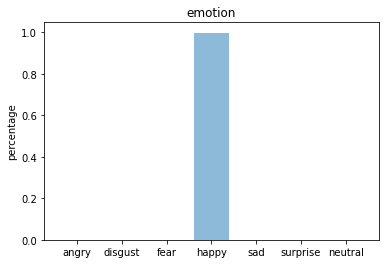

None


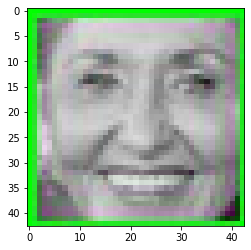

753
Image doesn't exist
754


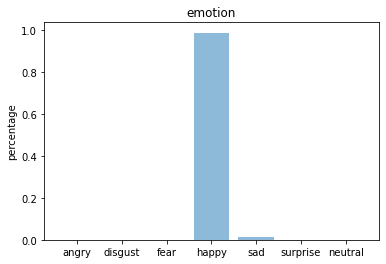

[[9.12916294e-05 9.87817756e-08 3.16582737e-06 9.86683905e-01
  1.31922765e-02 2.21065711e-05 7.14659973e-06]]
0.9866839


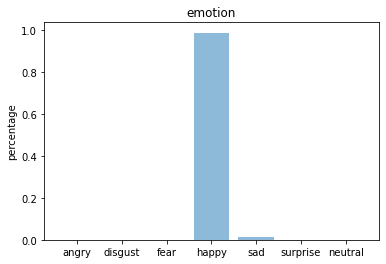

None


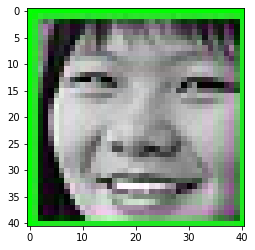

755
Image doesn't exist
756


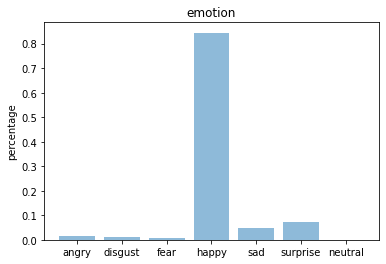

[[0.01464373 0.01288784 0.00682028 0.8445908  0.04740918 0.07277499
  0.00087318]]
0.8445908


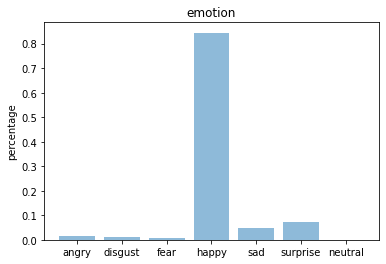

None


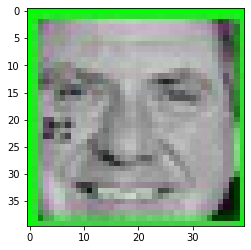

757


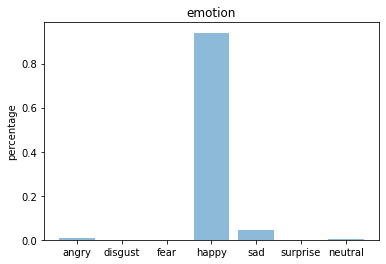

[[9.1432622e-03 8.6818909e-06 1.1384418e-03 9.4029588e-01 4.4126958e-02
  6.0712114e-06 5.2806693e-03]]
0.9402959


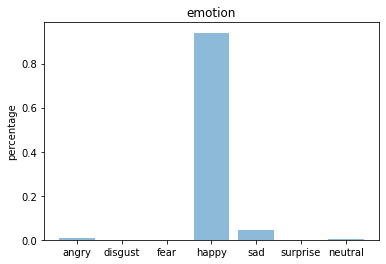

None


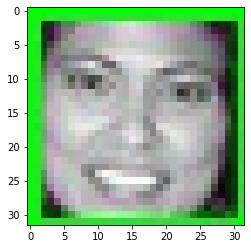

758


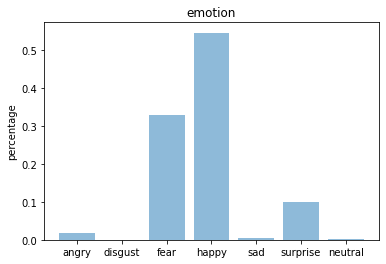

[[1.6834294e-02 1.2103224e-04 3.2926157e-01 5.4692024e-01 5.2157314e-03
  1.0069771e-01 9.4944640e-04]]
0.54692024


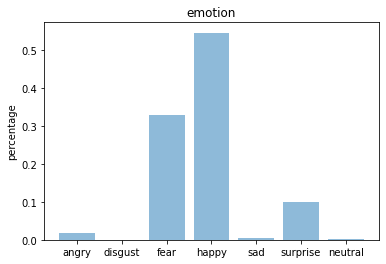

None


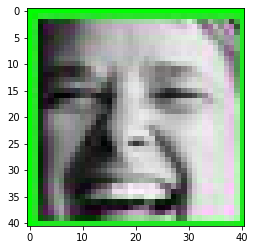

759


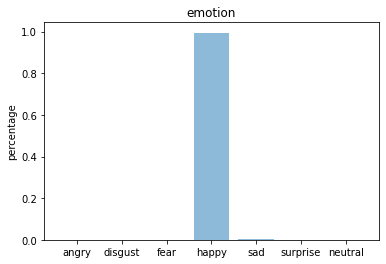

[[3.7785873e-04 1.0399209e-04 6.5267808e-04 9.9461609e-01 4.1119806e-03
  1.3673049e-04 5.9110283e-07]]
0.9946161


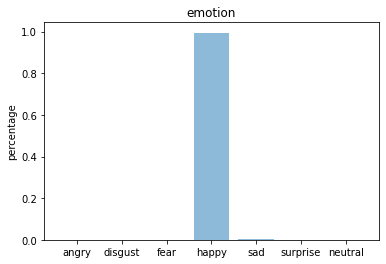

None


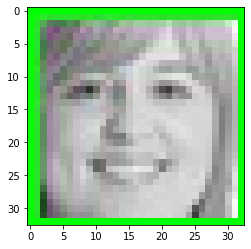

760


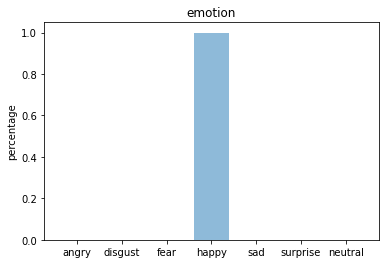

[[3.3213448e-06 3.9429647e-06 3.7316917e-05 9.9948525e-01 3.3766180e-04
  9.2705513e-06 1.2321098e-04]]
0.99948525


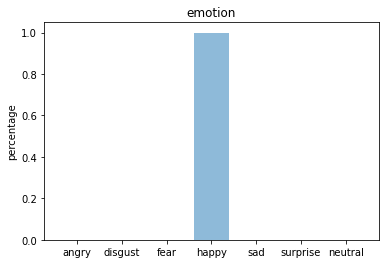

None


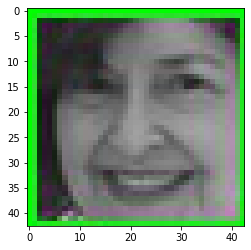

761
Image doesn't exist
762
Image doesn't exist
763
Image doesn't exist
764
Image doesn't exist


In [9]:
# from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator

# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image
# import spicy as sc
# from scipy import misc


folder_valid = 'C:/Users/User/Desktop/test/happy_valid'
# 'C:/Users/User/Desktop/test/angry_valid/capture  {0}.jpg'
all_vald_img = []
photo_count = 0
angry = 0
disgust = 0
fear = 0
happy = 0
sad = 0
surprise = 0
neutral = 0
    
for filename_valid in os.listdir(folder_valid):
    photo_count += 1
    img_valid = cv2.imread(os.path.join(folder_valid,filename_valid))
    if img_valid is not None:
        all_vald_img.append(img_valid)

# print(all_vald_img)

# print(len(all_vald_img))
#     if photo_count == len(all_vald_img):
#         pass
    try:
        file  = 'C:/Users/User/Desktop/test/happy_valid/capture{0}.jpg'.format(photo_count)
        print(photo_count)
        true_image = image.load_img(file)
        img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))


        #  --------------------------------------------------------------------------------
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)

        x /= 255

        custom = model.predict(x)
        emotion_analysis(custom[0])
        emo_reff = {'angry': custom[0][0], 'disgust': custom[0][1], 'fear': custom[0][2], 'happy': custom[0][3],
                    'sad': custom[0][4], 'surprise': custom[0][5], 'neutral': custom[0][6]}
        print(custom)
        print(max(custom[0]))
        print(emotion_analysis(custom[0]))
        if max(custom[0]) == emo_reff['angry']:
            angry += 1
        elif max(custom[0]) == emo_reff['disgust']:
            disgust += 1
        elif max(custom[0]) == emo_reff['fear']:
            fear += 1
        elif max(custom[0]) == emo_reff['happy']:
            happy += 1
        elif max(custom[0]) == emo_reff['sad']:
            sad += 1
        elif max(custom[0]) == emo_reff['surprise']:
            surprise += 1
        else:
            neutral += 1
            

        x = np.array(x, 'float32')
        x = x.reshape([48, 48]);

        plt.imshow(true_image)
        plt.show()
    except:
        print("Image doesn't exist")
        continue
        
#     ----------------------------------------------------------------------------------
#     file  = 'C:/Users/User/Desktop/test/angry_valid/capture355.jpg'
# #     print(photo_count)
#     true_image = image.load_img(file)
#     img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))


#     #  --------------------------------------------------------------------------------
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis = 0)

#     x /= 255

#     custom = model.predict(x)
#     emotion_analysis(custom[0])
#     print(custom)
#     print(max(custom[0]))
#     print(emotion_analysis(custom[0]))

#     x = np.array(x, 'float32')
#     x = x.reshape([48, 48]);

#     plt.imshow(true_image)
#     plt.show()

In [10]:
print("angry =", angry)
print("disgust =", disgust)
print("fear =", fear)
print("happy =", happy)
print("sad =", sad)
print("surprise =", surprise)
print("neutral =", neutral)
print("\n")

total = angry + disgust + fear + happy + sad + surprise + neutral
print("Total =", total)

print("happy precentage % =", (happy/total) *100)


angry = 7
disgust = 0
fear = 9
happy = 277
sad = 16
surprise = 9
neutral = 7


Total = 325
happy precentage % = 85.23076923076923
